# Imports

In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from itertools import product

from KDEpy import FFTKDE

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KernelDensity

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stdfont = 14
stdyfrac = 0.06

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [1]:
starttime = pytime.time()
   
#Opsin data
if True:
    #Trim Sessions
    #ilep.trimSessions('S:\\Sorts\DualRecording',replace=False)
    #endtime1 = pytime.time()
    #Calculate Responsiveness
    ilep.calculateResponsiveness('S:\\Sorts\DualRecording',cachedDirectory='D:\\Analysis_Cache',replace=True)
    endtime2 = pytime.time()
    #
    ilep.calculateResponsiveness('S:\\Sorts\Opsin',cachedDirectory='D:\\Opsin_Cache',replace=True)
    endtime25 = pytime.time()
    #Calculate Tuning Responsiveness
    #ilep.calculateTuningResponsiveness('S:\\Sorts\DualRecording',cachedDirectory='D:\\Analysis_Cache',replace=False)
    #endtime3 = pytime.time()
    #Finish
    ilep.loadSessionsComplete('S:\\Sorts\DualRecording',destination='D:\\Analysis_Cache',verbose=False)
    endtime4 = pytime.time()
    
    ilep.loadSessionsComplete('S:\\Sorts\Opsin',destination='D:\\Opsin_Cache',verbose=False)
    endtime45 = pytime.time()
    #print('Trimming       : ' + str((endtime1-starttime)/60)+' minutes elapsed');
    #print('Responsiveness : ' + str((endtime2-starttime)/60)+' minutes elapsed');
    #print('Responsiveness : ' + str((endtime3-starttime)/60)+' minutes elapsed');
    print('Finished       : ' + str((endtime4-starttime)/60)+' minutes elapsed');
    

  3%|▎         | 23/740 [00:00<00:22, 31.64it/s]C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
  0%|          | 0/58 [00:00<?, ?it/s]

[Errno 2] No such file or directory: 'S:\\Sorts\\DualRecording\\AE_235\\AE_235 1\\AC\\condition_metadata.json'
Depth mismatch on cluster 0
Depth mismatch on cluster 1
Depth mismatch on cluster 2
Depth mismatch on cluster 3
Depth mismatch on cluster 4
Depth mismatch on cluster 5
Depth mismatch on cluster 7
Depth mismatch on cluster 8
Depth mismatch on cluster 9
Depth mismatch on cluster 10
Depth mismatch on cluster 11
Depth mismatch on cluster 18
Depth mismatch on cluster 20
Depth mismatch on cluster 21
Depth mismatch on cluster 25
Depth mismatch on cluster 26
Depth mismatch on cluster 27
Depth mismatch on cluster 28
Depth mismatch on cluster 30
Depth mismatch on cluster 31
Depth mismatch on cluster 32
Depth mismatch on cluster 33
Depth mismatch on cluster 34
Depth mismatch on cluster 35
Depth mismatch on cluster 36
Depth mismatch on cluster 37
Depth mismatch on cluster 38
Depth mismatch on cluster 39
Depth mismatch on cluster 40
Depth mismatch on cluster 41
Depth mismatch on cluster 42

../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)


S:\Sorts\DualRecording\AE_235\AE_235 1\AC\session_metadata.json complete
S:\Sorts\DualRecording\AE_235\AE_235 1\M2\session_metadata.json missing. Skipping
[Errno 2] No such file or directory: 'S:\\Sorts\\DualRecording\\AE_235\\AE_235 2\\AC\\condition_metadata.json'
S:\Sorts\DualRecording\AE_235\AE_235 2\AC\session_metadata.json complete
S:\Sorts\DualRecording\AE_235\AE_235 2\M2\session_metadata.json missing. Skipping
[Errno 2] No such file or directory: 'S:\\Sorts\\DualRecording\\AE_235\\AE_235 3\\AC\\condition_metadata.json'
Depth mismatch on cluster 0
Depth mismatch on cluster 1
Depth mismatch on cluster 2
Depth mismatch on cluster 3
Depth mismatch on cluster 4
Depth mismatch on cluster 6
Depth mismatch on cluster 8
Depth mismatch on cluster 9
Depth mismatch on cluster 10
Depth mismatch on cluster 11
Depth mismatch on cluster 12
Depth mismatch on cluster 13
Depth mismatch on cluster 14
Depth mismatch on cluster 15
Depth mismatch on cluster 16
Depth mismatch on cluster 17
Depth mismat

  3%|▎         | 2/58 [04:33<2:07:29, 136.60s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-6816e80670e8>", line 9, in <module>
    ilep.calculateResponsiveness('S:\\Sorts\DualRecording',cachedDirectory='D:\\Analysis_Cache',replace=True)
  File "../..\InsanallyLabEphysTools\responsiveness.py", line 494, in calculateResponsiveness
    responsiveness = calculateResponsivenessInternal(sessionfile,populationAvgLickResponseInSamples,verbose=verbose)
  File "../..\InsanallyLabEphysTools\responsiveness.py", line 35, in calculateResponsivenessInternal
    responsiveness[clust] = calculateResponsivenessClusterInternal(sessionfile,clust,verbose=verbose)
  File "../..\InsanallyLabEphysTools\responsiveness.py", line 164, in calculateResponsivenessClusterInternal
    modulationspikeidxs = np.logical_and(      np.greater(trialtimes,windowstart) , np.le

TypeError: object of type 'NoneType' has no len()

In [ ]:
directory = 'D:\\Analysis_Cache'

numbersessions = 0
numberdisqlen = 0
numberdisqISI = 0
numberdisqFR = 0
numAC = 0
numM2 = 0
numTrim = 0

sessions = os.listdir(directory)
for session in sessions:
    sessionfile = ilep.loadSessionCached(directory,session)
    numbersessions += 1
    if hasattr(sessionfile.disqualified,'NumTrials'):
        numberdisqlen += len(sessionfile.disqualified.NumTrials)
    if hasattr(sessionfile.disqualified,'ISI'):
        numberdisqISI += len(sessionfile.disqualified.ISI)
    if hasattr(sessionfile.disqualified,'FRthresh'):
        numberdisqFR += len(sessionfile.disqualified.FRthresh)

    if sessionfile.meta.region == 'AC':
        numAC += len(sessionfile.clusters.good)
    elif sessionfile.meta.region == 'M2':
        numM2 += len(sessionfile.clusters.good)
    else:
        pass
    
    if hasattr(sessionfile,'trim'):
        numTrim += 1

print(str(numbersessions)+' sessions')
print('AC       : ' + str(numAC))
print('M2       : ' + str(numM2))
print('Trim     : ' + str(numTrim))
print('Disq Len : ' + str(numberdisqlen))
print('Disq ISI : ' + str(numberdisqISI))
print('Disq FR  : ' + str(numberdisqFR))
print(sessionfile.meta)

In [ ]:
#sessionfile = ilep.loadSessionCached(directory,'BS_108_6_AC.pickle')
sessionfile = ilep.loadSessionCached(act_directory,'BS_213_1_tuning_AC.pickle')
#sessionfile = ilep.loadSessionCached(act_directory,'BS_108_1_m2.pickle')

In [ ]:
sessionfile.clusters.good

In [ ]:
#results = odt.calculate_artificial_informativity_unmodified()

In [ ]:
#print(results)

In [30]:
#sessionstotest = range(5)

#for session in [sessions[s] for s in sessionstotest]:
if True:
    #sessionfile = ilep.loadSessionCached(directory,session)
    results = odt.calculate_informativity_unmodified(sessionfile,onecell=169)
    
    print('Printing Results')
    print(results)

[  2.   3.   3. ... 467. 470. 476.]


Loading activity: 100%|██████████| 1/1 [00:00<00:00, 501.95it/s]

155
starting informativity calculation: temporary_filename
test
[1]
Is it here?
Or here?
Decoding test A
Decoding test A.5
Decoding test B
[2022-08-29 15:43:04] *** Starting new run ***

1


ValueError: Cannot have number of splits n_splits=4 greater than the number of samples: n_samples=2.

In [5]:
np.sum(sessionfile.spikes.clusters==8) / sessionfile.meta.length_in_seconds

8.102156025399518

In [ ]:
3 spikes per trial in 80% trials

In [29]:
def check_decoding_criteria(sessionfile,clust):
    clust_spikes = sessionfile.spikes.times[np.equal(sessionfile.spikes.clusters,clust)]
    
    all_trials_spike_counts = []
    for trial in sessionfile.trim[clust].trimmed_trials:
        #print(trial)
        #print(ilep.getTrialSpikes(sessionfile,trial,cachedtimes=clust_spikes))
        all_trials_spike_counts.append( len(ilep.getTrialSpikes(sessionfile,trial,cachedtimes=clust_spikes)) )
        
    criterion = np.mean(np.greater(all_trials_spike_counts,3))
    return criterion>=0.8

In [30]:
check_decoding_criteria(sessionfile,2)

False

In [5]:
sessionfile.clusters.good

array([ 2,  8,  9, 14, 34, 35], dtype=int64)

(array([193., 100.,  55.,   0.,  24.,  12.,   0.,  13.,   7.,   0.,   3.,
          3.,   0.,   0.,   3.,   0.,   2.,   2.,   0.,   2.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.68,  1.36,  2.04,  2.72,  3.4 ,  4.08,  4.76,  5.44,
         6.12,  6.8 ,  7.48,  8.16,  8.84,  9.52, 10.2 , 10.88, 11.56,
        12.24, 12.92, 13.6 , 14.28, 14.96, 15.64, 16.32, 17.  , 17.68,
        18.36, 19.04, 19.72, 20.4 , 21.08, 21.76, 22.44, 23.12, 23.8 ,
        24.48, 25.16, 25.84, 26.52

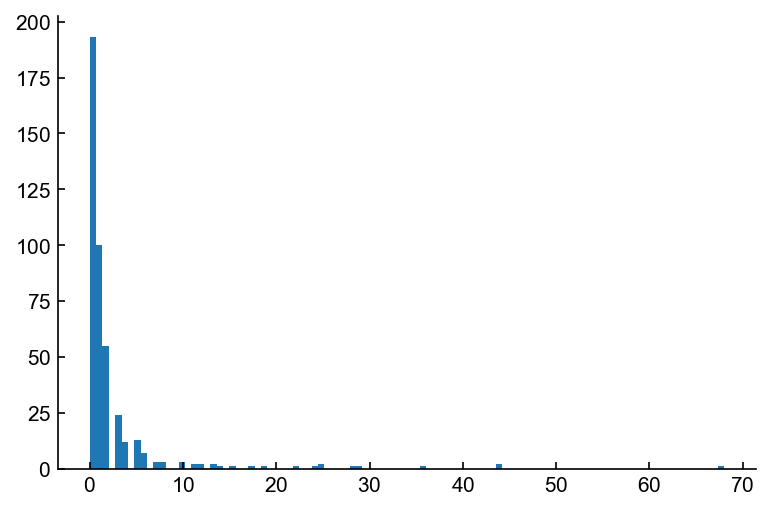

In [6]:
spikes = [len(ilep.getTrialSpikes(sessionfile,trial,clust=2)) for trial in sessionfile.trim[2].trimmed_trials]
plt.hist(spikes,bins=100)

In [9]:
sessionfile.responsiveness

{0: {'all_trials': namespace(trials=array([211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
                          224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
                          237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
                          250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
                          263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
                          276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
                          289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
                          302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314,
                          315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
                          328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340,
                          341, 342, 343, 344, 345, 346, 347, 348, 349, 35

In [18]:
np.sum(np.equal(total_spikes,27))

12831

In [40]:
trials = []
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(directory,session)
    trials.append(len(sessionfile.trials.starts))
print(np.sum(trials))

100%|██████████| 344/344 [00:00<00:00, 438.00it/s]

148384


In [6]:
total_spikes = []
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(directory,session)
    for clust in sessionfile.clusters.good:
        spikes = [len(ilep.getTrialSpikes(sessionfile,trial,clust=clust)) for trial in sessionfile.trim[clust].trimmed_trials]
        total_spikes = np.concatenate((total_spikes,spikes))

100%|██████████| 344/344 [11:08<00:00,  1.94s/it]


<BarContainer object of 100 artists>

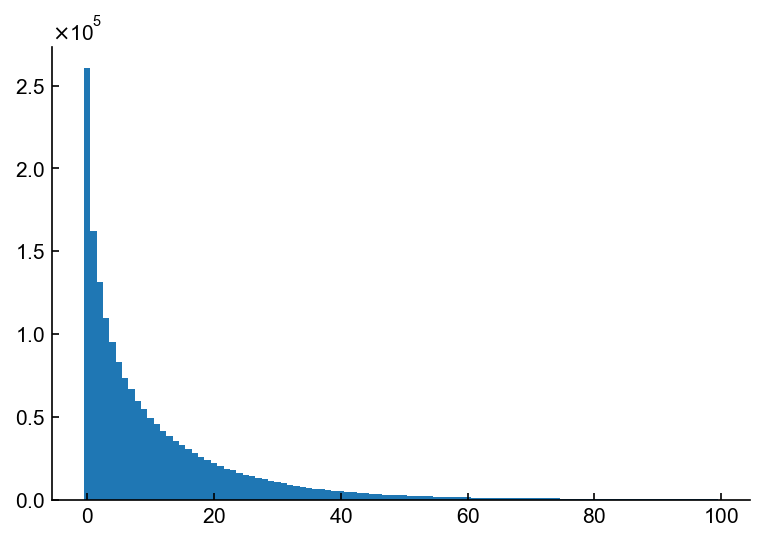

In [28]:
spikes_per = np.zeros(100)
for idx in range(100):
    spikes_per[idx] = np.sum(np.equal(total_spikes,idx))
plt.bar(range(100),spikes_per,width=1)

In [16]:
#27

In [34]:
len(total_spikes)/2

889059.5

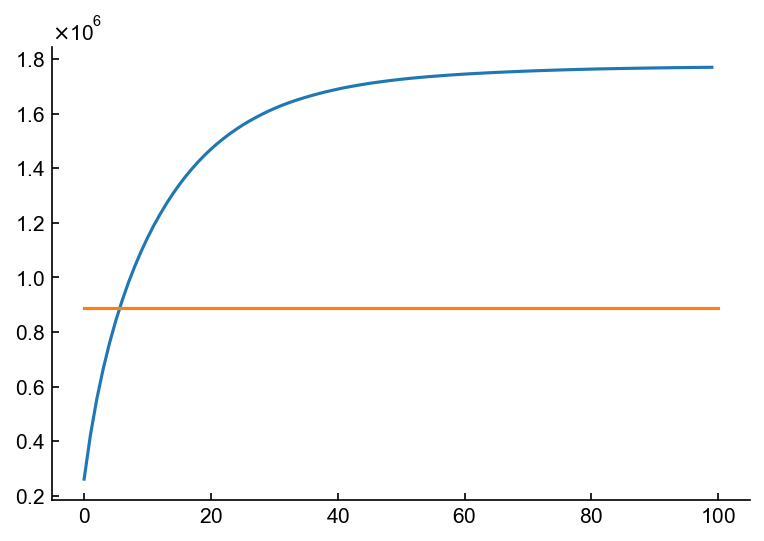

In [35]:
plt.plot(np.cumsum(spikes_per))
plt.plot([0,100],[889059,889059])

trials = 175 : [0.4367816091954023, 0.5632183908045977]


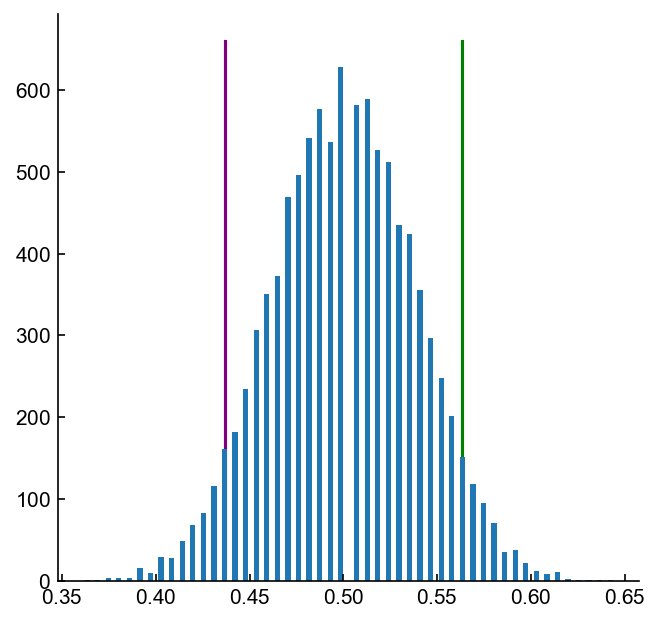

In [56]:
p_TNt = 0.5
#behavior = chance

trials = 175
repetitions = 10000

results = []
for rep in range(repetitions):
    tones = np.concatenate(( [0] * int(trials*p_TNt),[1] * int(trials*(1-p_TNt)) ))
    tones = np.random.permutation(tones)
    tones_hat = np.array([1 if t>=0.5 else 0 for t in np.random.uniform(size=len(tones))])
    #print(tones)
    #print(tones_hat)
    
    PC = np.mean(np.equal(tones,tones_hat))
    results.append(PC)

results = np.sort(results)
perseveration_cutoff = results[int(len(results)*0.05)]
refinement_cutoff = results[int(len(results)*0.95)]
print('trials = ' + str(trials) + ' : ' + str([perseveration_cutoff,  refinement_cutoff]))

fig,ax = plt.subplots(figsize=(5,5))
ax.hist(results,bins=100)
ylims = ax.get_ylim()
ax.plot([perseveration_cutoff]*2,ylims,color='purple',zorder=-10)
ax.plot([refinement_cutoff]*2,ylims,color='green',zorder=-10)

In [63]:
p_TNt = 0.5
#behavior = chance

perseveration = []
refinement = []
repetitions = 10000

xrange = list(range(50,401))
for trials in tqdm(xrange):
    results = []
    for rep in range(repetitions):
        tones = np.concatenate(( [0] * int(trials*p_TNt),[1] * int(trials*(1-p_TNt)) ))
        tones = np.random.permutation(tones)
        tones_hat = np.array([1 if t>=0.5 else 0 for t in np.random.uniform(size=len(tones))])
        #print(tones)
        #print(tones_hat)

        PC = np.mean(np.equal(tones,tones_hat))
        results.append(PC)

    results = np.sort(results)
    perseveration_cutoff = results[int(len(results)*0.05)]
    refinement_cutoff = results[int(len(results)*0.95)]
    
    perseveration.append(perseveration_cutoff)
    refinement.append(refinement_cutoff)

100%|██████████| 351/351 [03:38<00:00,  1.61it/s]


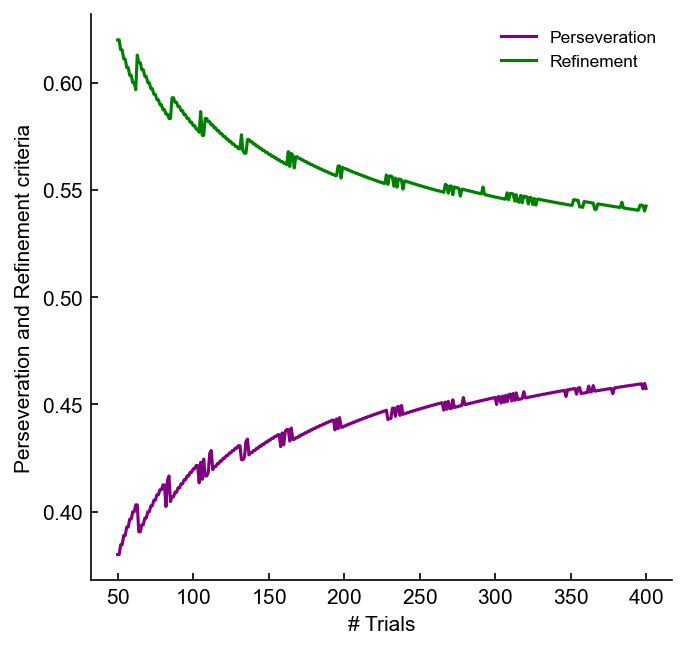

In [67]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(xrange,perseveration,color='purple',label='Perseveration')
ax.plot(xrange,refinement,color='green',label='Refinement')
ax.set_xlabel('# Trials')
ax.set_ylabel('Perseveration and Refinement criteria')
ax.legend(frameon=False)

In [41]:
def getBWs_elife2019():
    #return [0.00001,0.001,0.2,0.5]
    return np.linspace(.005, 0.305, 11)

def sklearn_grid_search_bw(sessionfile,clust,folds = 10,log=True):
    conditions = ilep.getAllConditions(sessionfile,clust)
    LogISIs,_ = getLogISIs(sessionfile,clust,conditions['all_trials'].trials,log=log)
    LogISIs = LogISIs.reshape(-1, 1)#Required to make GridSearchCV work
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': getBWs_elife2019()},
                    cv=folds) # 20-fold cross-validation
    grid.fit(LogISIs)
    return grid.best_params_['bandwidth']

def getLogISIs(sessionfile,clust,trials,log=True):#Include conditions
    ISIs = []
    times = []
    for trial in trials:
        spiketimes = ilep.getTrialSpikes(sessionfile,clust=clust,trial=trial,outunits='ms')
        ISIs.append(np.diff(spiketimes))
        times.append(spiketimes[1:])
    
    ISIs = np.concatenate(ISIs)

    if log:
        LogISIs = np.log10(ISIs)
    else:
        LogISIs = ISIs
    
    times = np.concatenate(times)
    
    return LogISIs, times
    
def LogISIsToLikelihoods(LogISIs, bw):
    #minLogISI = 0 #Set minimum to 1ms. This is shorter than the refractory period so we can guarantee we won't get any ISIs less than this
    #maxLogISI = np.max(LogISIs) +1 #Set this to 10x the maximum ISI. This nearly guarantees that there won't be any ISIs outside this range
    KDE = gaussian_kde(LogISIs,bw_method=bw)
    return KDE

def splitByConditions(sessionfile,clust,trials,condition_names,control=False):    
    all_conditions = ilep.getAllConditions(sessionfile,clust)
    
    decoding_conditions = dict()
    for cond in condition_names:
        decoding_conditions[cond] = SimpleNamespace()
    
    for cond in decoding_conditions:
        condition_trials = trials[np.isin(trials, all_conditions[cond].trials )]
        decoding_conditions[cond].trials = condition_trials
        
    if control:
        all_trials = np.concatenate(([decoding_conditions[cond].trials for cond in decoding_conditions]))
        shuffled_trials = np.random.permutation(all_trials)
        
        offset = 0
        for cond in decoding_conditions:
            idxs = np.array(range(offset,offset+len(decoding_conditions[cond].trials)))
            decoding_conditions[cond].trials = shuffled_trials[idxs]
        
    return decoding_conditions

def trainDecodingAlgorithm(sessionfile,clust,bw,Train_X,condition_names,control=False):
    model = dict()
    for cond in condition_names:
        model[cond] = SimpleNamespace()
    
    #Determine trials to use for each condition. Uses the conditions structures from
    #ilep to increase modularity and to ensure that all code is always using the same
    #conditions
    decoding_conditions = splitByConditions(sessionfile,clust,Train_X,condition_names,control=control)
    
    for cond in decoding_conditions:        
        
        LogISIs,_ = getLogISIs(sessionfile,clust,decoding_conditions[cond].trials,log=False)
        cond_KDE = LogISIsToLikelihoods(LogISIs,bw) #This is a gaussian KDE
        
        model[cond].Likelihood = cond_KDE
        model[cond].Prior_0 = 1.0 / len(condition_names)
        
    return model

In [35]:
sessionfile.clusters.good

array([ 9, 12, 13, 14, 16, 17, 21, 32, 59, 66, 71], dtype=int64)

In [36]:
for clust in sessionfile.clusters.good:
    best_bw = sklearn_grid_search_bw(sessionfile,clust,folds = 10,log=True)
    print(best_bw)

0.125
0.095
0.034999999999999996
0.065
0.095
0.034999999999999996
0.065
0.155
0.095
0.095
0.034999999999999996


In [37]:
for clust in sessionfile.clusters.good:
    best_bw = sklearn_grid_search_bw(sessionfile,clust,folds = 10,log=False)
    print(best_bw)

0.305
0.305
0.305
0.305
0.305
0.305
0.305
0.305
0.305
0.305
0.305


100%|██████████| 11/11 [00:15<00:00,  1.40s/it]


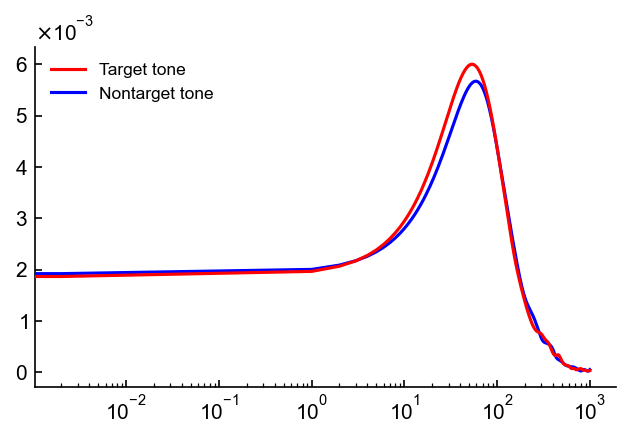

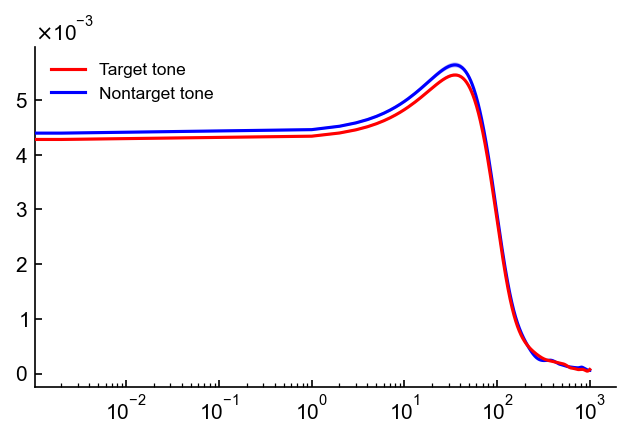

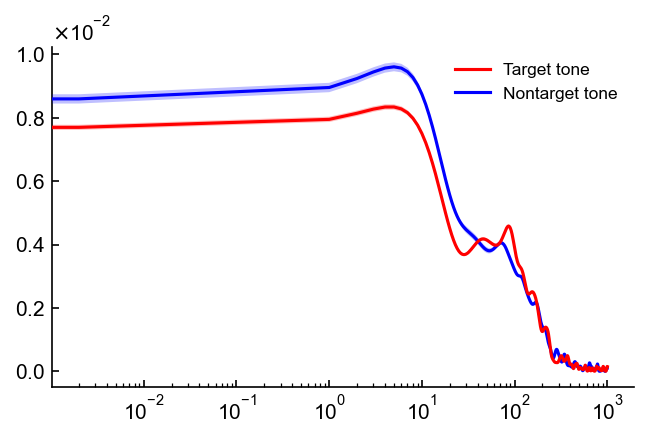

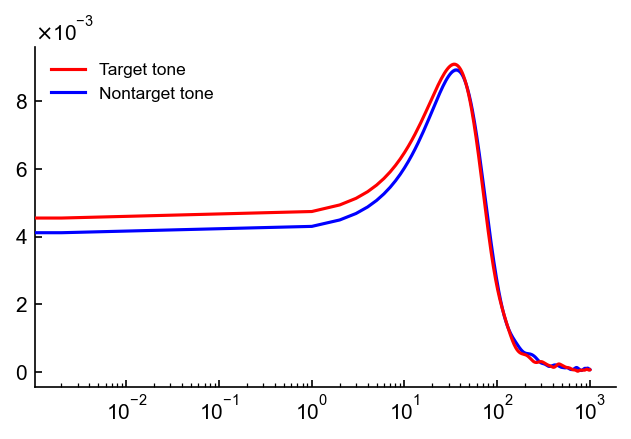

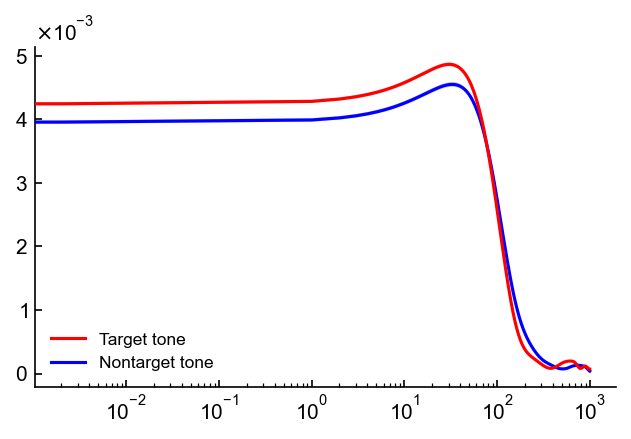

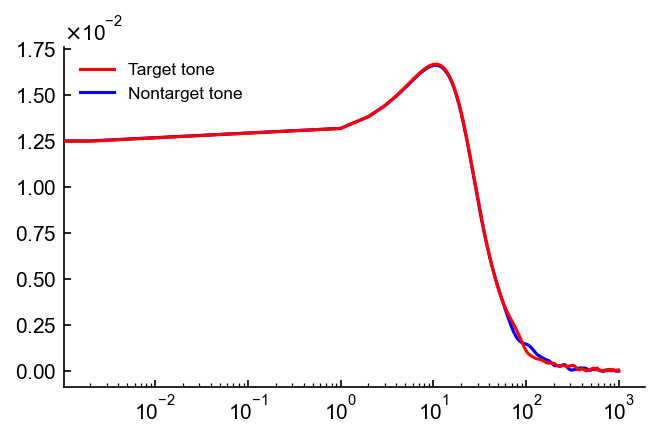

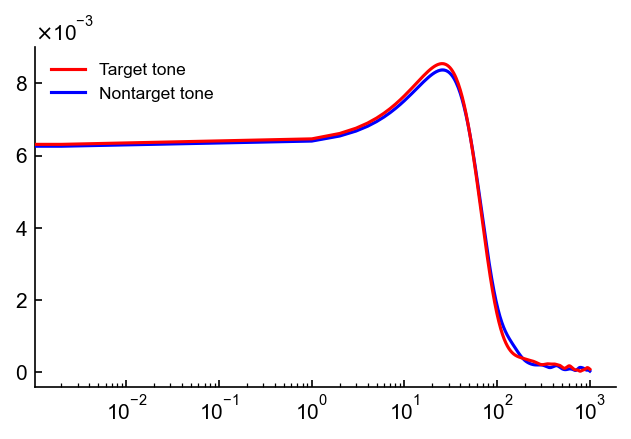

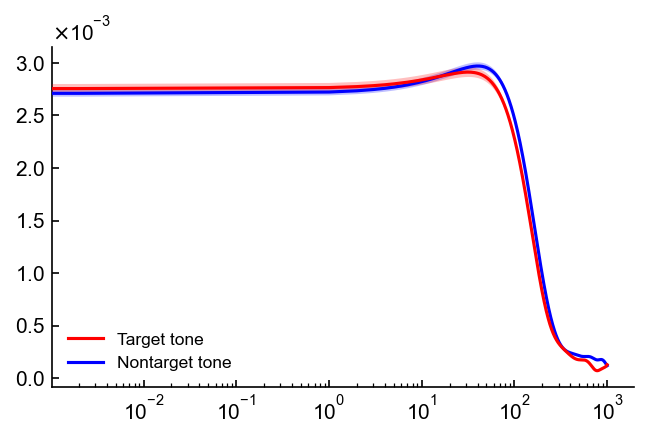

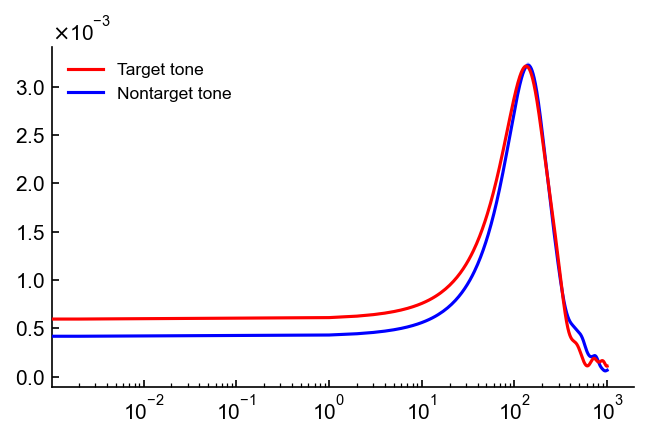

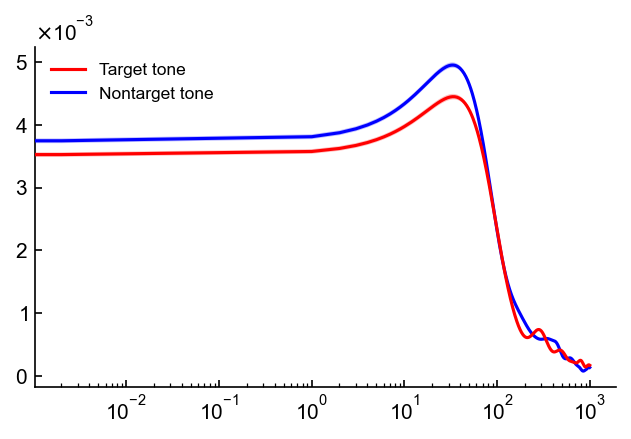

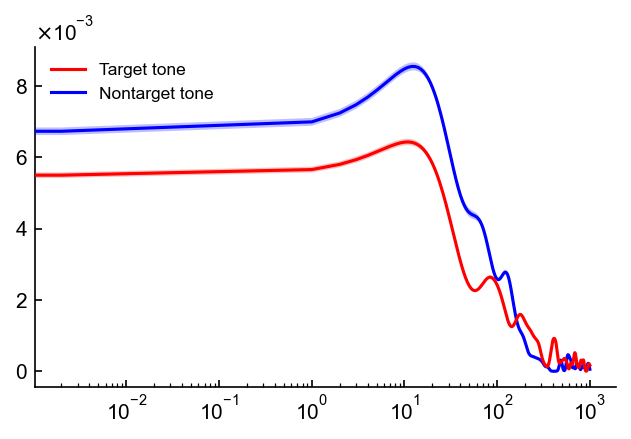

In [43]:
for clust in tqdm(sessionfile.clusters.good):
    best_bw = sklearn_grid_search_bw(sessionfile,clust)
    folds = ilep.K_fold_strat(sessionfile,sessionfile.trim[clust].trimmed_trials,10)
    
    xmin = -1
    xmax = 1000
    xrange = np.linspace(xmin,xmax,num=1000)
    
    TargISILibraries = np.zeros((len(xrange),len(folds)))
    NontargISILibraries = np.zeros((len(xrange),len(folds)))
    
    for K, (Train_X, Test_X) in enumerate(folds):
        model = trainDecodingAlgorithm(sessionfile,clust,best_bw,Train_X,['target_tone','nontarget_tone'],control=False)
        
        TargISILibraries[:,K] = model['target_tone'].Likelihood.evaluate(xrange)
        NontargISILibraries[:,K] = model['nontarget_tone'].Likelihood.evaluate(xrange)

    TargISILibrariesSTD = np.std(TargISILibraries,axis=1)
    TargISILibrariesSEM = sem(TargISILibraries,axis=1)
    TargISILibrariesMEAN = np.mean(TargISILibraries,axis=1)
    NontargISILibrariesSTD = np.std(NontargISILibraries,axis=1)
    NontargISILibrariesSEM = sem(NontargISILibraries,axis=1)
    NontargISILibrariesMEAN = np.mean(NontargISILibraries,axis=1)

    fig,ax = plt.subplots(figsize=(5,3))
    
    ax.plot(xrange,TargISILibrariesMEAN,color='blue',zorder=10)
    ax.fill_between(xrange,TargISILibrariesMEAN+TargISILibrariesSEM,TargISILibrariesMEAN-TargISILibrariesSEM,color='blue',alpha=0.25,lw=0,zorder=9)
    
    ax.plot(xrange,NontargISILibrariesMEAN,color='red',zorder=10)
    ax.fill_between(xrange,NontargISILibrariesMEAN+NontargISILibrariesSEM,NontargISILibrariesMEAN-NontargISILibrariesSEM,color='red',alpha=0.25,lw=0,zorder=9)
    
    ax.plot([],[],color='red',label='Target tone')
    ax.plot([],[],color='blue',label='Nontarget tone')
    
    ax.set_xscale('log',base=10)
    ax.legend(frameon=False)

#     fig.savefig(os.path.join('D:\\Figures','Decoding Schematics','ISI Libraries',ilep.generateDateString(sessionfile)+' cluster '+str(clust)))

In [63]:
data = np.concatenate((np.random.normal(size=100000),np.random.normal(loc=4,size=500000)))

In [64]:
gKDE = gaussian_kde(data, bw_method='scott')
fKDE = FFTKDE(bw='scott', kernel='gaussian').fit(data, weights=None)

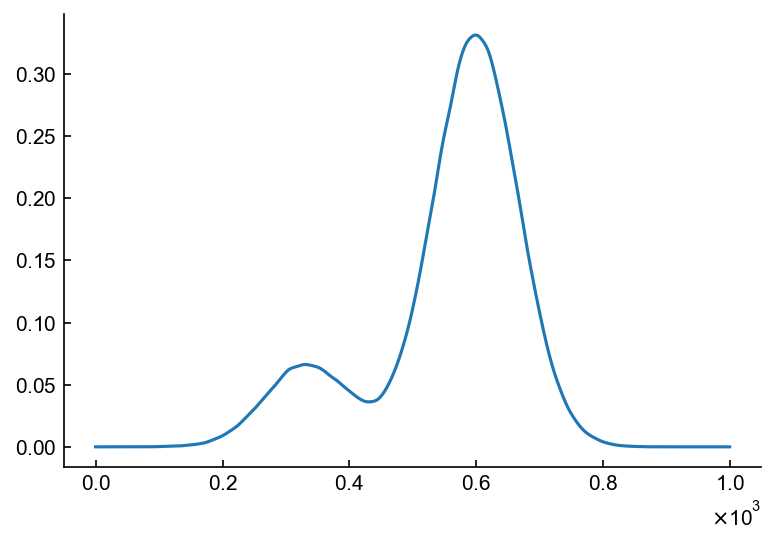

In [65]:
plt.plot(fKDE.evaluate(np.linspace(-5,10,1000)))

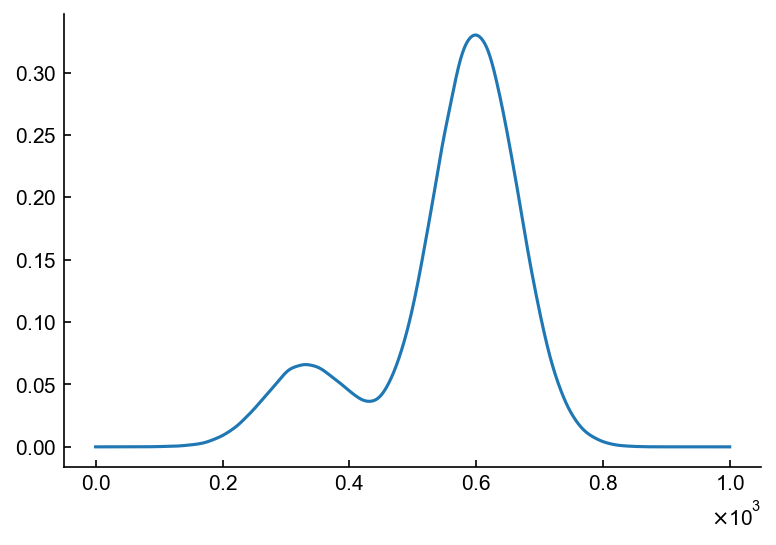

In [66]:
plt.plot(gKDE.evaluate(np.linspace(-5,10,1000)))

In [31]:
criteria = []
numTrialsThatPass = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        
        cachedTimes = ilep.getSpikeTimes(sessionfile,clust=clust)
        numTrials = 0
        numPassedTrials = 0
        
        #for idx in range(len(sessionfile.trials.starts)):
        for idx in sessionfile.trim[clust].trimmed_trials:
            numTrials += 1
            spikes = ilep.getTrialSpikes(sessionfile,idx,cachedtimes=cachedTimes)
            if len(spikes) >= 3:
                numPassedTrials += 1
                
        criterion = numPassedTrials / numTrials
        criteria.append(criterion)
        numTrialsThatPass.append(numPassedTrials)

100%|██████████| 390/390 [00:56<00:00,  6.89it/s]


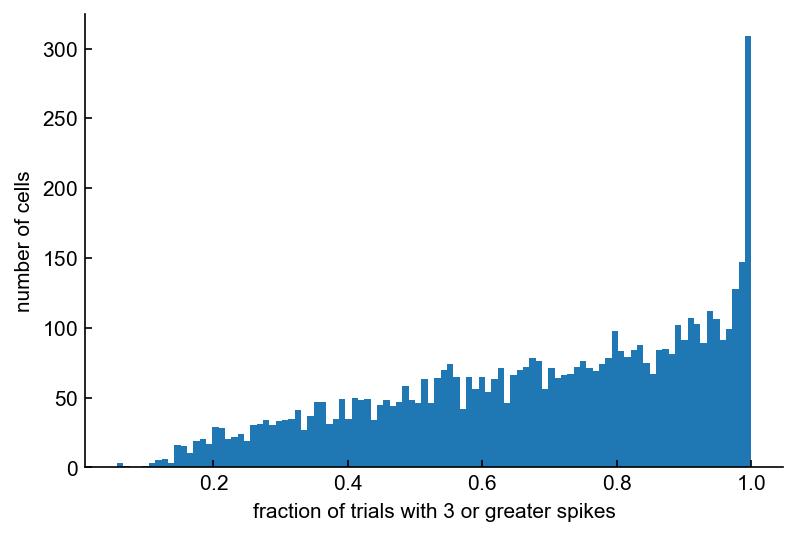

In [32]:
plt.hist(criteria,bins=100)
plt.xlabel('fraction of trials with 3 or greater spikes')
plt.ylabel('number of cells')
plt.savefig(os.path.join('D:\\\\TempFigures','eLife criterion histogram.png'),transparent=False,facecolor="white")

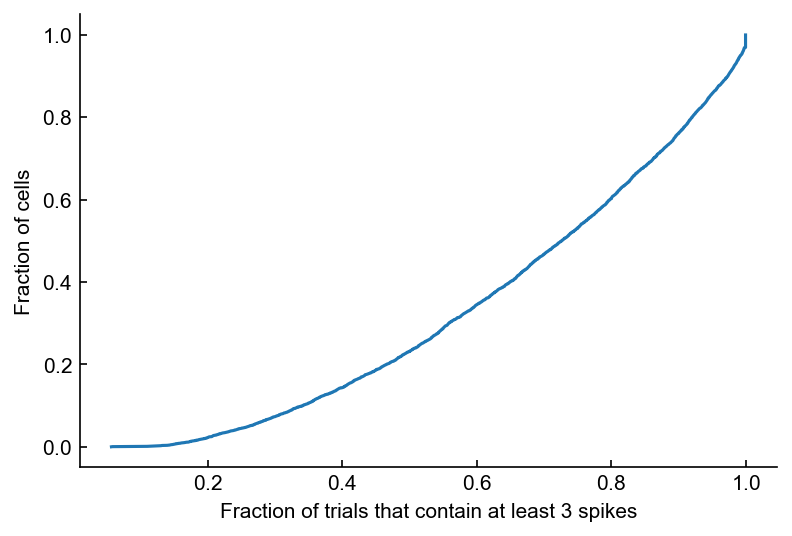

In [33]:
sortedNums = np.sort(criteria)
frac = np.linspace(0,1,len(sortedNums))
plt.plot(sortedNums,frac)
#plt.xlabel('Number of trials that pass criteria')
plt.xlabel('Fraction of trials that contain at least 3 spikes')
plt.ylabel('Fraction of cells')
plt.savefig(os.path.join('D:\\\\TempFigures','eLife criterion cumulative by fraction.png'),transparent=False,facecolor="white")

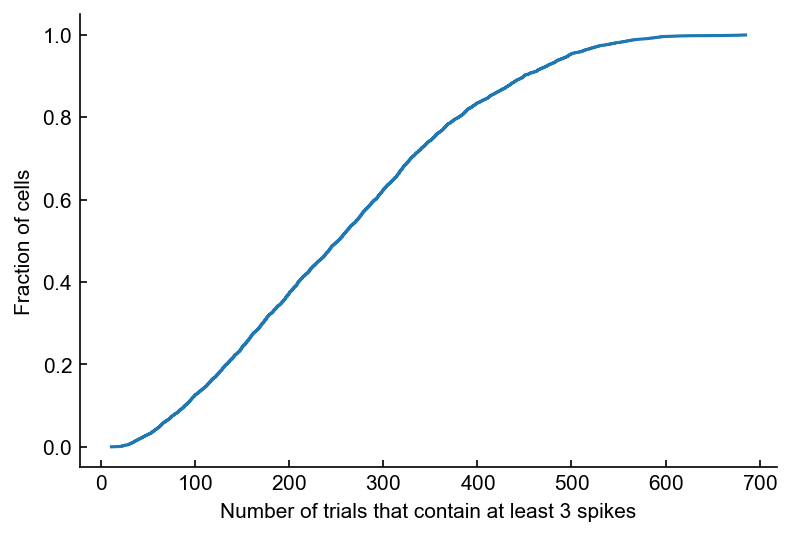

In [35]:
sortedNums = np.sort(numTrialsThatPass)
frac = np.linspace(0,1,len(sortedNums))
plt.plot(sortedNums,frac)
plt.xlabel('Number of trials that contain at least 3 spikes')
#plt.xlabel('Fraction of trials that contain at least 3 spikes')
plt.ylabel('Fraction of cells')
plt.savefig(os.path.join('D:\\\\TempFigures','eLife criterion cumulative by number.png'),transparent=False,facecolor="white")

In [43]:
FR = []
FRmod = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        
        trimtrials = sessionfile.trim[clust].trimmed_trials
        trimstart = trimtrials[0]
        trimend = trimtrials[len(trimtrials)-1]
        
        starttime = sessionfile.trials.starts[trimstart]
        endtime = sessionfile.trials.ends[trimend]
        spiketimes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        
        thisFR = len(spiketimes) / ((endtime-starttime)/sessionfile.meta.fs)
        
        FR.append(thisFR)
        FRmod.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)

100%|██████████| 396/396 [00:03<00:00, 106.29it/s]


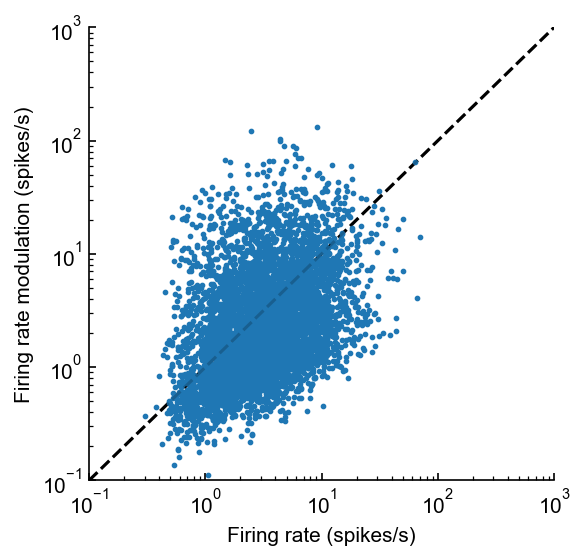

In [58]:
fig,ax = plt.subplots(figsize=(4,4))
ax.scatter(FR,FRmod,s=3)
ax.set_xlim([0.1,1000])
ax.set_ylim([0.1,1000])
ax.plot([0.1,1000],[0.1,1000],linestyle='--',color='k',zorder=-10)
ax.plot([0.1,1000],[0.1,1000],linestyle='--',color='k',alpha=0.2,zorder=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Firing rate (spikes/s)')
ax.set_ylabel('Firing rate modulation (spikes/s)')
fig.savefig(os.path.join('D:\\\\TempFigures','FR vs FRmod.png'),transparent=False,facecolor="white")

In [59]:
a = [1,2,3,4,5]

(array([2021.,    0., 1958.,    0.,    0., 1982.,    0., 2018.,    0.,
        2021.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

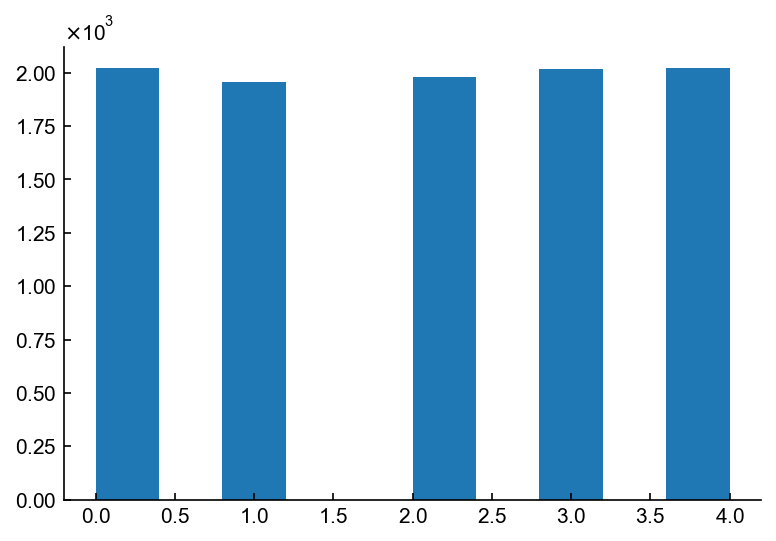

In [80]:
plt.hist(np.floor(np.random.rand(10000)*len(a)))

In [5]:
good_trial = 0
bad_trial = 0
bad_target = 0
bad_nontarget = 0
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        spike_times = ilep.getSpikeTimes(sessionfile,clust=clust)
        for trial in sessionfile.trim[clust].trimmed_trials:
            num_spikes = len(ilep.getTrialSpikes(sessionfile,trial,cachedtimes=spike_times))
            
            if num_spikes >= 2:
                good_trial += 1
            else:
                bad_trial += 1
                if sessionfile.trials.target[trial]:
                    bad_target += 1
                else:
                    bad_nontarget += 1

100%|██████████| 398/398 [00:56<00:00,  6.99it/s]


In [6]:
good_trial

1665587

In [7]:
bad_trial

480961

In [8]:
bad_trial / (good_trial+bad_trial)

0.22406254134545325

In [9]:
bad_target

246431

In [10]:
bad_nontarget

234530

In [15]:
target = []
nontarget = []
conditions = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        spike_times = ilep.getSpikeTimes(sessionfile,clust=clust)
        
        condition = np.nan
        if sessionfile.meta.condition in ['prereversal naive','prereversal expert']:
            condition = 0
        elif sessionfile.meta.condition in ['postreversal naive','postreversal expert']:
            condition = 1
        else:
            continue
        
        good_target = 0
        good_nontarget = 0
        bad_target = 0
        bad_nontarget = 0
        for trial in sessionfile.trim[clust].trimmed_trials:
            num_spikes = len(ilep.getTrialSpikes(sessionfile,trial,cachedtimes=spike_times))
            
            if num_spikes >= 2:
                if sessionfile.trials.target[trial]:
                    good_target += 1
                else:
                    good_nontarget += 1
            else:
                bad_trial += 1
                if sessionfile.trials.target[trial]:
                    bad_target += 1
                else:
                    bad_nontarget += 1
        target.append(bad_target / (good_target+bad_target))
        nontarget.append(bad_nontarget / (good_nontarget+bad_nontarget))
        conditions.append(condition)
target = np.array(target)
nontarget = np.array(nontarget)
conditions = np.array(conditions)

100%|██████████| 398/398 [00:51<00:00,  7.68it/s]


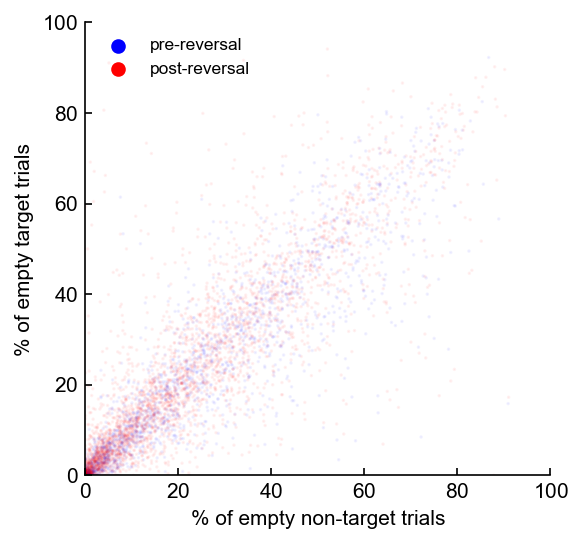

In [49]:
fig,ax = plt.subplots(figsize=(4,4))
ax.scatter(nontarget*100,target*100,c=conditions,s=0.5,cmap='bwr',alpha=0.05)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_xlabel('% of empty non-target trials')
ax.set_ylabel('% of empty target trials')
ax.scatter([np.nan],[np.nan],color='blue',label='pre-reversal')
ax.scatter([np.nan],[np.nan],color='red',label='post-reversal')
ax.legend(frameon=False)
fig.savefig(os.path.join('D:\\\\TempFigures','Empty trials breakdown.png'),transparent=False,facecolor="white")

In [62]:
a = [1,2,3,3,2,3,1,6]
res = np.argwhere(np.equal(a,np.max(a)))

In [63]:
res

array([[7]], dtype=int64)

In [64]:
np.concatenate(res)

array([7], dtype=int64)

In [18]:
sessionIDs = []
clusters = []
accuracies = []
accuracies_std = []
accuracies_sem = []
waccuracies = []
waccuracies_std = []
waccuracies_sem = []
caccuracies = []
caccuracies_std = []
caccuracies_sem = []
pvals = []
repetitions = []

reps = 1000

EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in sessions:
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)
        
#EnumSession = EnumSession[0:24]
#EnumClust = EnumClust[0:24]
        
numfiles = 0
for session,clust in tqdm(zip(EnumSession,EnumClust)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    filename = ilep.generateDateString(sessionfile) + ' cluster ' + str(clust) + ' decoding cached result.pickle'
    filename = os.path.join('D:\\Temp_Cache',filename)
    
    this_res = [np.nan]*10
    try:
        with open(filename, 'rb') as f:
            this_res = pickle.load(f)
            numfiles += 1
    except Exception as e:
        #print(filename + ' failed')
        #print(e)
        pass
    
    accuracies.append(this_res[0])
    accuracies_std.append(this_res[1])
    accuracies_sem.append(this_res[2])
            
    waccuracies.append(this_res[3])
    waccuracies_std.append(this_res[4])
    waccuracies_sem.append(this_res[5])
            
    caccuracies.append(this_res[6])
    caccuracies_std.append(this_res[7])
    caccuracies_sem.append(this_res[8])
    pvals.append(this_res[9])
            
    sessionIDs.append(session)
    clusters.append(clust)
    repetitions.append(reps)

5801it [00:18, 308.69it/s]


In [15]:
print(np.nanmean(np.less_equal(pvals,0.05)))
print(np.nanmean(np.less_equal(pvals, (0.05/np.sum(np.isnan(pvals))) )))

0.9612135838648509
0.9358731253232201


In [13]:
np.sum(np.isfinite(accuracies))

5727

In [14]:
5727/5801

0.9872435786933287

In [19]:
print(numfiles)

5798


In [38]:
FRmod1 = []
FRmod2 = []
for item in tqdm(os.listdir('D:\\Analysis_Cache')):
    sessionfile1 = ilep.loadSessionCached('D:\\Analysis_Cache',item)
    sessionfile2 = ilep.loadSessionCached('D:\\Analysis_Cache_archived_Oct_27_2022',item)
    for clust in sessionfile1.clusters.good:
        mod1 = sessionfile1.responsiveness[clust]['all_trials'].FRmodulation
        mod2 = sessionfile2.responsiveness[clust]['all_trials'].FRmodulation
        
        FRmod1.append(mod1)
        FRmod2.append(mod2)

100%|██████████| 398/398 [00:02<00:00, 148.13it/s]


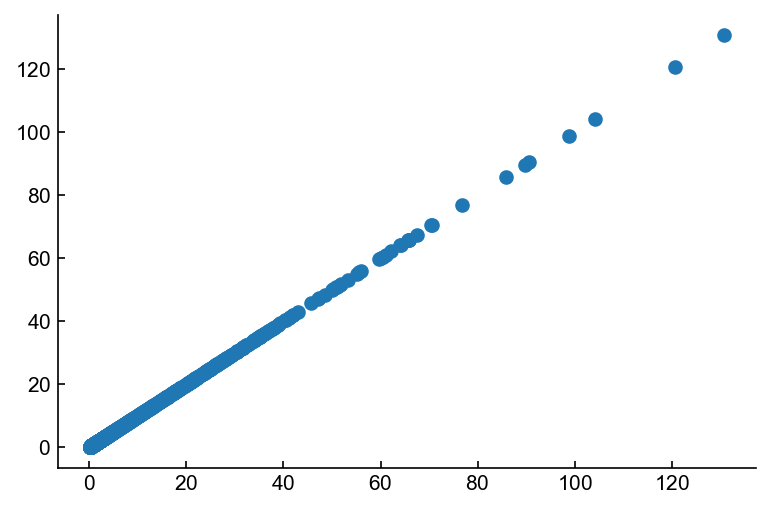

In [39]:
plt.scatter(FRmod1,FRmod2)

In [31]:
FRmodT = []
FRmodNT = []
for item in tqdm(os.listdir('D:\\Analysis_Cache')):
    sessionfile = ilep.loadSessionCached('D:\\Analysis_Cache',item)
    for clust in sessionfile.clusters.good:
        mod1 = sessionfile.responsiveness[clust]['target_tone'].FRmodulation
        mod2 = sessionfile.responsiveness[clust]['nontarget_tone'].FRmodulation
        
        FRmodT.append(mod1)
        FRmodNT.append(mod2)
FRmodT = np.array(FRmodT)
FRmodNT = np.array(FRmodNT)

100%|██████████| 398/398 [00:01<00:00, 299.41it/s]


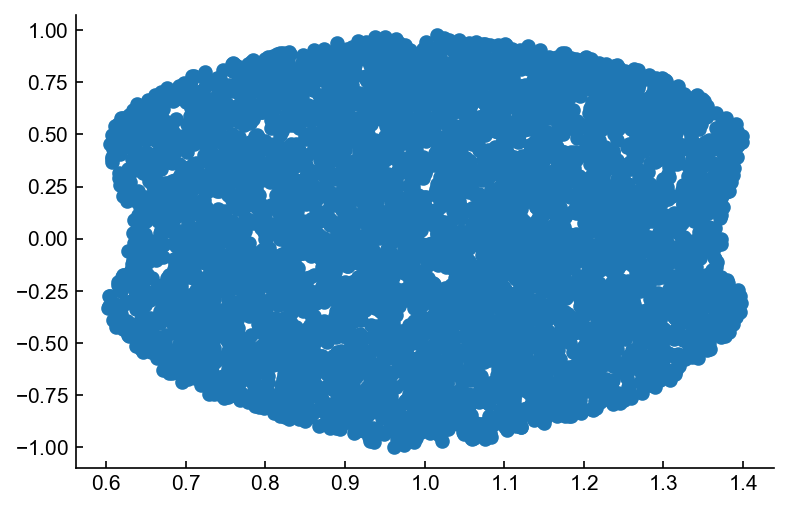

In [34]:
Y = (FRmodT-FRmodNT)/np.maximum(FRmodT,FRmodNT)
X = np.ones_like(Y)

X,Y = ilep.violin(X,Y)
plt.scatter(X,Y)

In [37]:
a=np.array([1,2,3,4,5,6])
b=np.array([10,0,0,10,0,10])
print(np.maximum(a,b))

[10  2  3 10  5 10]


In [33]:
correct = 0
incorrect = 0
indeterminate = 0

for session in os.listdir(ops_directory):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    for idx in range(sessionfile.meta.length_in_trials):
        
        trialstart = sessionfile.trials.starts[idx]
        trialend = sessionfile.trials.ends[idx]
            
        reward_times = sessionfile.behavior.reward_times
        number_of_rewards = np.sum(np.logical_and(     np.greater(reward_times,trialstart-500) , np.less(reward_times,trialend+500)    ))
        
        
        #Hits
        if sessionfile.trials.target[idx] and sessionfile.trials.go[idx]:
            if number_of_rewards == 1:
                correct += 1
            elif number_of_rewards == 0:
                incorrect += 1
                print('Hit')
                print(session)
                print('trial '+str(idx+1))
                print('target: '+str(sessionfile.trials.target[idx]))
                print('go: '+str(sessionfile.trials.go[idx]))
                print()
            else:
                indeterminate += 1
        else:
            if number_of_rewards == 1:
                incorrect += 1
                print('Not Hit')
                print(session)
                print('trial '+str(idx+1))
                print('target: '+str(sessionfile.trials.target[idx]))
                print('go: '+str(sessionfile.trials.go[idx]))
                print()
            elif number_of_rewards == 0:
                correct += 1
            else:
                indeterminate += 1

Not Hit
BS_100_1_opto_AC.pickle
trial 73
target: True
go: False

Hit
BS_100_1_opto_AC.pickle
trial 234
target: True
go: True

Not Hit
BS_103_1_opto_AC.pickle
trial 381
target: True
go: False

Not Hit
BS_103_1_opto_AC.pickle
trial 401
target: True
go: False

Not Hit
BS_103_1_opto_AC.pickle
trial 402
target: True
go: False

Hit
BS_103_3_opto_AC.pickle
trial 20
target: True
go: True

Not Hit
BS_103_9_opto_AC.pickle
trial 310
target: True
go: False

Not Hit
BS_111_10_opto_AC.pickle
trial 226
target: True
go: False

Hit
BS_111_10_opto_AC.pickle
trial 353
target: True
go: True

Not Hit
BS_111_1_opto_AC.pickle
trial 88
target: True
go: False

Not Hit
BS_111_1_opto_AC.pickle
trial 372
target: True
go: False

Not Hit
BS_111_2_opto_AC.pickle
trial 28
target: True
go: False

Hit
BS_111_2_opto_AC.pickle
trial 119
target: True
go: True

Not Hit
BS_111_2_opto_AC.pickle
trial 121
target: True
go: False

Not Hit
BS_111_2_opto_AC.pickle
trial 137
target: True
go: False

Hit
BS_111_2_opto_AC.pickle
tria

In [28]:
correct

25754

In [29]:
incorrect

184

In [30]:
indeterminate

0

In [31]:
correct / (correct+incorrect)

0.9929061608450921

In [77]:
data = np.load('C:\\Users\\insan\\Desktop\\analogData.npy')
trial = 73
trialidx = trial - 1

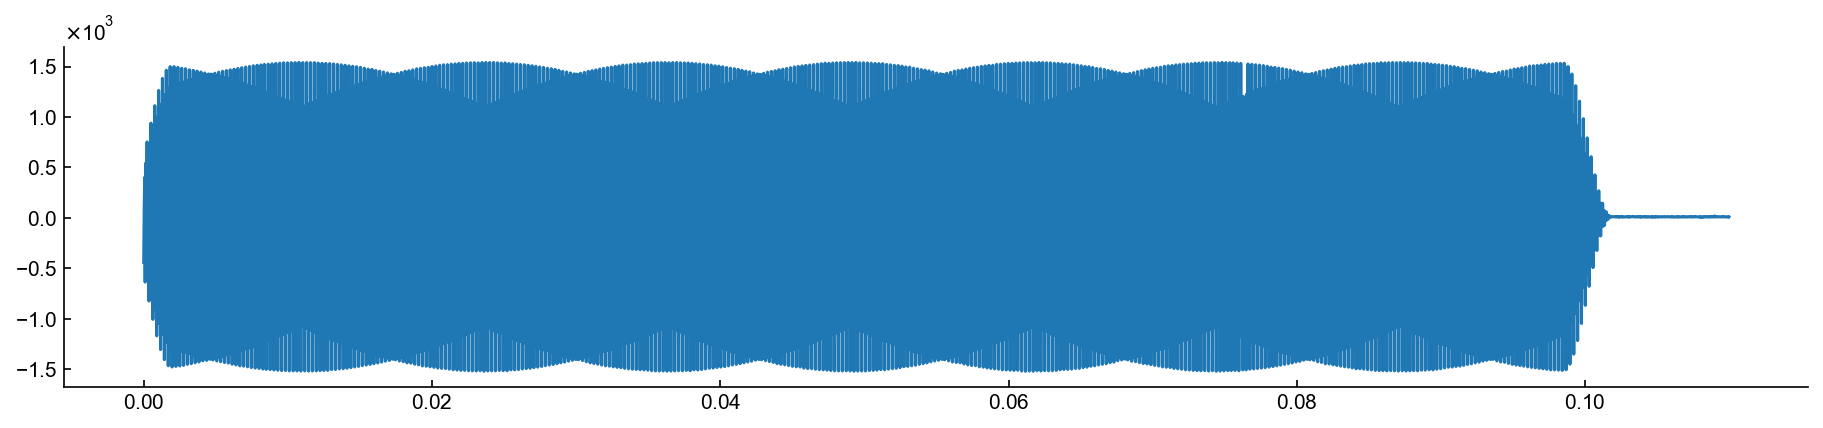

In [82]:
fig,ax = plt.subplots(figsize=(15,3))
sessionfile = ilep.loadSessionCached(ops_directory,'BS_100_1_opto_AC.pickle')
starttime = int(sessionfile.trials.starts[trialidx])
#endtime = int(sessionfile.trials.ends[trialidx])
endtime = int(starttime + 0.11*30000)

tonedata = data[0]
ax.plot(np.array(range(endtime-starttime))/30000,tonedata[starttime:endtime])
#ax.plot(tonedata)

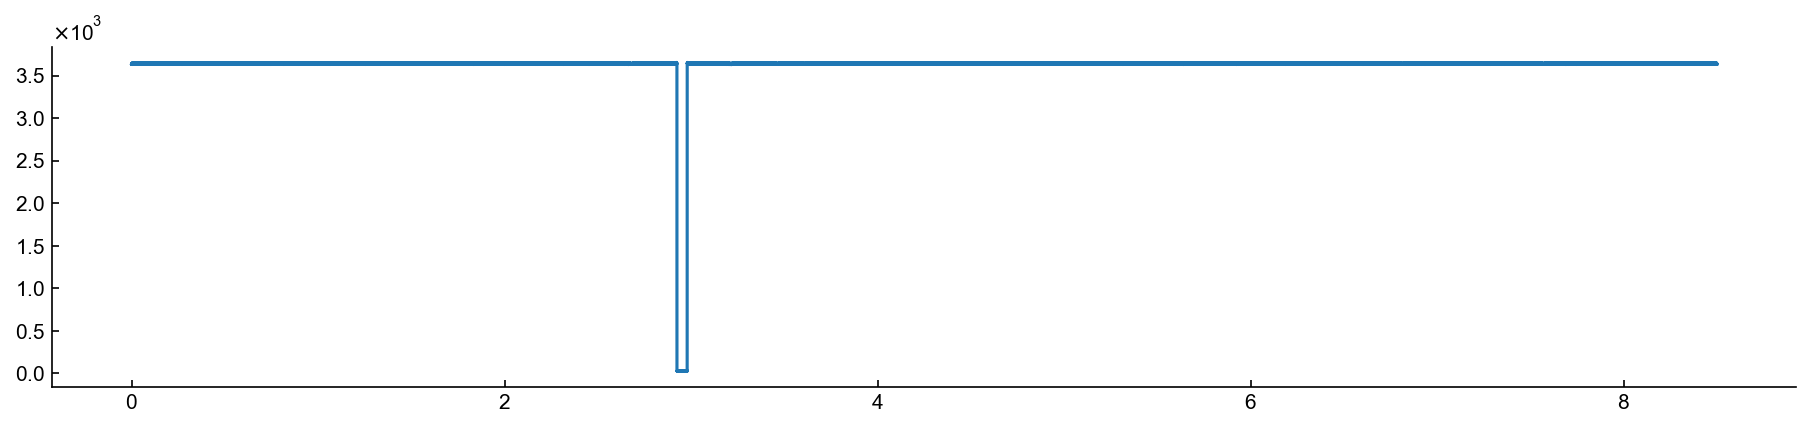

In [86]:
fig,ax = plt.subplots(figsize=(15,3))
sessionfile = ilep.loadSessionCached(ops_directory,'BS_100_1_opto_AC.pickle')
starttime = int(sessionfile.trials.starts[trialidx])-90000
endtime = int(sessionfile.trials.ends[trialidx])+90000
#endtime = int(starttime + 0.11*30000)

tonedata = data[1]
ax.plot(np.array(range(endtime-starttime))/30000,tonedata[starttime:endtime])
#ax.plot(tonedata)

In [52]:
#Choice alignment

In [53]:
#sessionfile

In [12]:
def get_response_times_with_default(sessionfile):
    response_times_in_trial = (sessionfile.trials.response-sessionfile.trials.starts)
    default_response_time = np.nanmedian(response_times_in_trial)

    response_times = sessionfile.trials.response
    nogo_trials = np.isnan(response_times)
    response_times[nogo_trials] = sessionfile.trials.starts[nogo_trials]+default_response_time
    return np.array(response_times)

In [4]:
stim = []
choice = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        stim.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        choice.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulationchoice)

100%|██████████| 398/398 [00:04<00:00, 92.20it/s] 


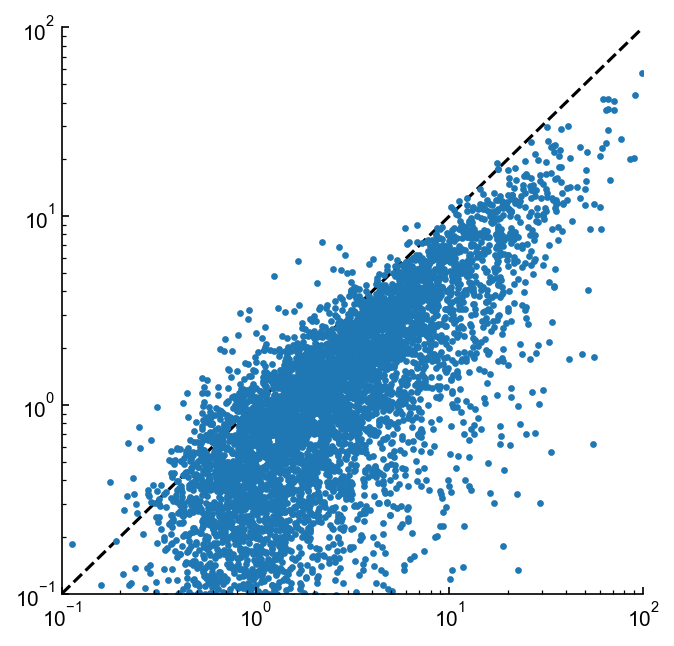

In [9]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(stim,choice,s=5)
ax.plot([0.1,100],[0.1,100],linestyle='--',color='k',zorder=-10)
ax.set_xlim([0.1,100])
ax.set_ylim([0.1,100])
ax.set_xscale('log')
ax.set_yscale('log')

In [25]:
overlap = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    response_times = get_response_times_with_default(sessionfile)
    response_delays = (response_times - sessionfile.trials.starts) / sessionfile.meta.fs * 1000
    
    overlaps = (400 - response_delays)
    overlaps = [np.zeros_like(overlaps), overlaps]
    overlaps = np.max(overlaps,axis=0)
    overlaps = overlaps / 200
    overlap.append(np.mean(overlaps))

100%|██████████| 398/398 [00:02<00:00, 165.52it/s]


(array([ 9., 13., 11., 18., 16., 18., 19., 21., 14., 22., 22., 28., 23.,
        23., 38., 25., 48., 12.,  7., 11.]),
 array([0.01162317, 0.04930771, 0.08699225, 0.12467678, 0.16236132,
        0.20004586, 0.2377304 , 0.27541493, 0.31309947, 0.35078401,
        0.38846854, 0.42615308, 0.46383762, 0.50152216, 0.53920669,
        0.57689123, 0.61457577, 0.6522603 , 0.68994484, 0.72762938,
        0.76531392]),
 <BarContainer object of 20 artists>)

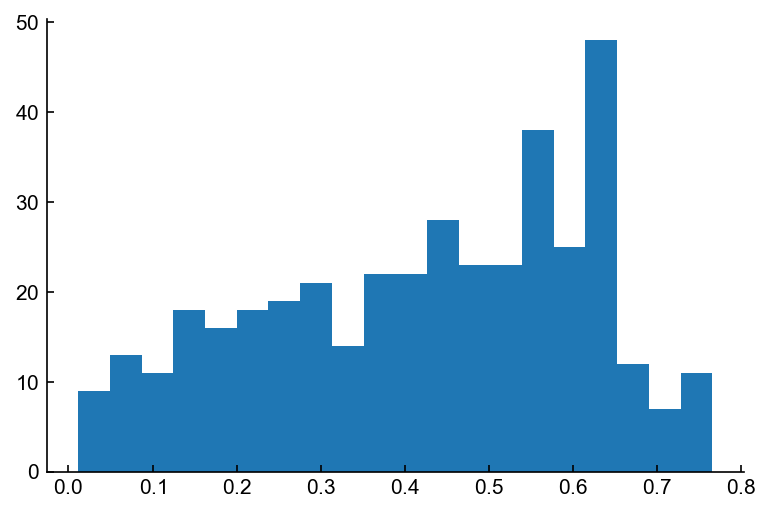

In [28]:
plt.hist(overlap,bins=20)

In [11]:
FRmod_stim = []
FRmod_choice = []
pval_stim = []
pval_choice = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
    
    for clust in sessionfile.clusters.good:
        try:
            pval_stim.append(sessionfile.responsiveness[clust]['all_trials'].FRmodpval)
            pval_choice.append(sessionfile.responsiveness[clust]['all_trials'].FRmodpvalchoice)
            FRmod_stim.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
            FRmod_choice.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulationchoice)
        except:
            pass

  9%|▊         | 34/398 [00:00<00:02, 168.53it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 1814


100%|██████████| 398/398 [00:02<00:00, 136.36it/s]


In [12]:
STIMULUS_COLOR = 'red'
CHOICE_COLOR = 'green'
BOTH_COLOR = 'purple'

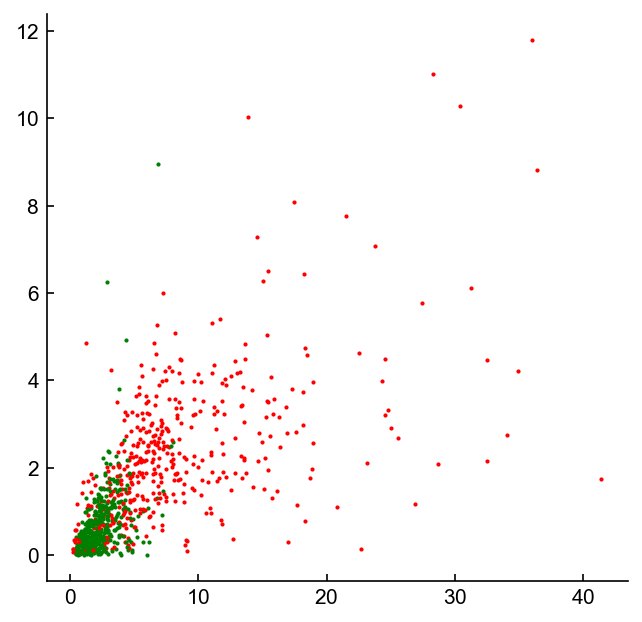

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
for idx in range(len(FRmod_stim)):
    color = 'k'
    if pval_stim[idx] < 0.05 and pval_choice[idx] < 0.05:
        color = BOTH_COLOR
        continue
    elif pval_stim[idx] < 0.05 and pval_choice[idx] > 0.05:
        color = STIMULUS_COLOR
    elif pval_stim[idx] > 0.05 and pval_choice[idx] < 0.05:
        color = CHOICE_COLOR
    else:
        continue
    ax.scatter(FRmod_stim[idx],FRmod_choice[idx],c=color,s=1)
    
#ax.set_xscale('log')
#ax.set_yscale('log')

In [10]:
len(FRmod_stim)

5801

In [14]:
both = 0
stim = 0
choice = 0
none = 0

for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if len(sessionfile.clusters.good) == 0:
        continue
    example_clust = sessionfile.clusters.good[0]
    
    has_stim = False
    has_choice = False
    if hasattr(sessionfile.responsiveness[example_clust]['all_trials'],'FRmodpval'):
        has_stim = True
    if hasattr(sessionfile.responsiveness[example_clust]['all_trials'],'FRmodpvalchoice'):
        has_choice = True
        
    if has_stim and has_choice:
        both += 1
    elif has_stim:
        stim += 1
    elif has_choice:
        choice += 1
    else:
        none += 1
        print(session)

BS_108_2_M2.pickle
BS_108_3_AC.pickle
BS_108_3_M2.pickle
BS_113_1_M2.pickle
BS_113_4_AC.pickle
BS_113_4_M2.pickle
BS_113_6_AC.pickle
BS_33_10_M2.pickle
BS_33_11_M2.pickle
BS_33_13_AC.pickle
BS_33_15_M2.pickle
BS_33_1_M2.pickle
BS_33_2_M2.pickle
BS_33_3_AC.pickle
BS_33_3_M2.pickle
BS_33_4_AC.pickle
BS_33_5_M2.pickle
BS_33_6_AC.pickle
BS_33_6_M2.pickle
BS_33_9_AC.pickle
BS_33_9_M2.pickle
BS_40_10_M2.pickle
BS_40_11_M2.pickle
BS_40_12_AC.pickle
BS_40_14_AC.pickle
BS_40_14_M2.pickle
BS_40_15_AC.pickle
BS_40_16_M2.pickle
BS_40_21_AC.pickle
BS_40_2_AC.pickle
BS_40_3_AC.pickle
BS_40_5_M2.pickle
BS_40_8_AC.pickle
BS_41_1_AC.pickle
BS_41_1_M2.pickle
BS_41_2_AC.pickle
BS_41_2_M2.pickle
BS_41_4_AC.pickle
BS_41_4_M2.pickle
BS_41_5_AC.pickle
BS_41_5_M2.pickle
BS_41_6_AC.pickle
BS_41_6_M2.pickle
BS_41_7_AC.pickle
BS_41_9_AC.pickle
BS_42_10_AC.pickle
BS_42_10_M2.pickle
BS_42_1_AC.pickle
BS_42_1_M2.pickle
BS_42_2_AC.pickle
BS_42_3_AC.pickle
BS_42_5_M2.pickle
BS_42_6_AC.pickle
BS_42_7_AC.pickle
BS_49_1

In [10]:
both

237

In [11]:
stim

0

In [12]:
choice

0

In [13]:
none

138

In [8]:
pvals = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        try:
            pvals.append(sessionfile.responsiveness[clust]['all_trials'].FRmodpval_eLife)
            if sessionfile.responsiveness[clust]['all_trials'].FRmodpval_eLife < 0.05:
                print(ilep.generateDateString(sessionfile) + ' cluster '+str(clust))
        except:
            pass

 20%|█▉        | 78/398 [00:00<00:00, 345.87it/s]

BS_108_2_M2_3-23-2022 cluster 62
BS_108_3_M2_3-24-2022 cluster 25
BS_108_3_M2_3-24-2022 cluster 129
BS_108_5_M2_3-28-2022 cluster 38
BS_108_5_M2_3-28-2022 cluster 89
BS_108_6_M2_3-29-2022 cluster 9
BS_108_6_M2_3-29-2022 cluster 25
BS_108_6_M2_3-29-2022 cluster 64
BS_108_6_M2_3-29-2022 cluster 69
BS_108_6_M2_3-29-2022 cluster 125
BS_108_7_M2_3-30-2022 cluster 31
BS_108_7_M2_3-30-2022 cluster 113
BS_108_7_M2_3-30-2022 cluster 117
BS_108_7_M2_3-30-2022 cluster 216
BS_113_1_AC_4-6-2022 cluster 24
BS_113_1_AC_4-6-2022 cluster 29
BS_113_1_AC_4-6-2022 cluster 44
BS_113_1_AC_4-6-2022 cluster 63
BS_113_1_AC_4-6-2022 cluster 72
BS_113_1_AC_4-6-2022 cluster 74
BS_113_1_AC_4-6-2022 cluster 181


100%|██████████| 398/398 [00:01<00:00, 375.26it/s]


In [6]:
print(pvals)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9964, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996, 1.0, 0.9982, 0.9858, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.1068, 1.0, 0.0004, 1.0, 0.9924, 0.0558, 1.0, 1.0, 1.0, 1.0, 0.9842, 0.9906, 1.0, 1.0, 0.9984, 1.0, 1.0, 0.0988, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.72, 1.0, 0.995, 1.0, 1.0, 0.0984, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3238, 1.0, 0.001, 1.0, 1.0, 1.0, 0.153, 1.0, 0.9008, 1.0, 1.0, 1.0, 0.9262, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.005, 1.0, 0.921, 1.0, 1.0, 0.9976, 1.0, 0.9966, 0.9832, 1.0, 0.9864, 1.0, 0.9996, 0.9992, 0.9778, 1.0, 0.0108, 1.0, 1.0, 0.9744, 0.9366, 1.0, 1.0, 1.0, 0.4576, 0.4088, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9954, 0.9546, 0.2872, 0.9996, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0002, 0.3756, 0.0078, 0.9116, 0.1994, 0.8836, 0.0118, 0.9768, 0.0438, 1.0, 0.822, 0.4688, 0.33

In [7]:
print(np.mean(np.less(pvals,0.05)))

0.08641975308641975


In [7]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal in ['BS_213','BS_214','BS_78']:
        print(sessionfile.meta.animal)

BS_78
BS_78
BS_78
BS_78
BS_78
BS_78
BS_78
BS_78
BS_78
BS_78


In [16]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [4]:
toneIDs = np.load(file_path)

In [ ]:
toneIDs

In [18]:
trim

namespace(prereversal_early=array([ 0.86253369,  3.37825696, 23.2884097 ,  1.59928122,  6.88230009,
                                    2.87511231,  0.64690027,  6.34321653, 10.51212938,  1.86761229,
                                    0.57502246,  1.67115903,  0.99688474,  3.55795148,  1.09613657,
                                    1.27583109,  2.04851752,  3.10871518,  1.92273136,  1.00628931,
                                    0.84456424,  3.62982929,  1.22192273,  0.80862534,  4.76190476,
                                    0.55005501,  0.375     ,  8.10422282,  1.40161725,  1.27481714,
                                    2.24618149,  1.22192273,  2.2821204 ,  1.61725067,  1.91528545,
                                    4.43349754, 12.12938005,  2.65947889,  0.28751123,  4.75877193,
                                   10.97933513,  1.36567835,  1.76100629,  0.98831986,  1.26721763,
                                    0.50314465,  1.76100629,  2.58823529,  1.27583109,  0.63492063,


In [6]:
toneCounts = file_contents

In [10]:
toneDurations = file_contents

In [8]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

In [9]:
with open(file_path, 'rb') as f:
    file_contents = pickle.load(f)

In [23]:
file_contents = np.load(file_path)

In [10]:
print(file_contents)

{'accuracy': 0.5105166666666667, 'accuracy_std': 0.08750971215940676, 'accuracy_sem': 0.003917472735030054, 'weighted_accuracy': 0.5137603770832135, 'weighted_accuracy_std': 0.08767950505528362, 'weighted_accuracy_sem': 0.003925073708953814, 'shuffled_control_accuracy': 0.5052233333333334, 'shuffled_control_accuracy_std': 0.09684007498046572, 'shuffled_control_accuracy_sem': 0.004335157138937758, 'synthetic_control_accuracy': 0.50263, 'synthetic_control_accuracy_std': 0.10308071158078023, 'synthetic_control_accuracy_sem': 0.004614526401248088, 'pval_shuffled_control': 0.3402516878797651, 'pval_synthetic_control': 0.2756875766355972, 'fraction_empty_trials': 0.8065566666666666}


In [9]:
len(file_contents)

1715

In [10]:
file_contents[0]

1675191844.0662107

In [11]:
file_contents[1] - file_contents[0]

0.010970830917358398

In [13]:
np.diff(file_contents)

array([0.01097083, 0.00994563, 0.00997329, ..., 0.00997424, 0.00997233,
       0.00997353])

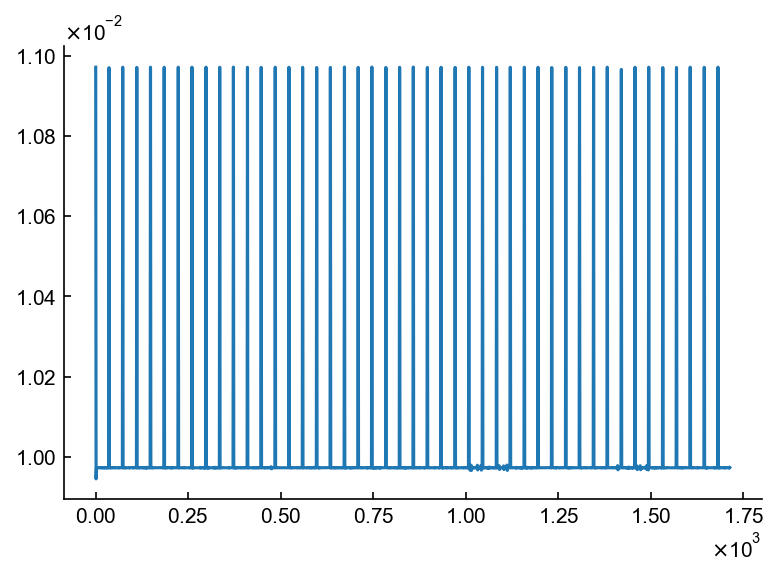

In [14]:
plt.plot(np.diff(file_contents))

In [27]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #print(sessionfile.meta)
    #print(sessionfile.trials)
    #print(sessionfile.clusters)
    #print(sessionfile.spikes)
    
    #Getting FR modulation
    print(sessionfile.responsiveness[2]['all_trials'].FRmodulation)
    
    #Stationary trials
    print(sessionfile.trim[2].trimmed_trials)
    
    break

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 2

In [4]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        
        ISIs = []
        
        trials = sessionfile.trim[clust].trimmed_trials
        for trial in trials:
            
            spikes = ilep.getTrialSpikes(sessionfile,trial,clust=clust)
            
            this_trial_ISIs = np.diff(spikes)
            ISIs = np.concatenate((ISIs,this_trial_ISIs))
            
        #Analyze ISIs...

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-df5dc60d2c0e>", line 10, in <module>
    spikes = ilep.getTrialSpikes(sessionfile,trial,clust=clust)
  File "C:\Users\insan\Desktop\EphysAnalysis\InsanallyLabEphysTools\utility.py", line 93, in getTrialSpikes
    times = np.array(getSpikeTimes(sessionfile,clust=clust,starttime=(trialstart-startbuffer),endtime=(trialend+endbuffer),cachedtimes=cachedtimes),dtype='float')
  File "C:\Users\insan\Desktop\EphysAnalysis\InsanallyLabEphysTools\utility.py", line 60, in getSpikeTimes
    clustidx = np.equal(sessionfile.spikes.clusters,clust)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\IPython\core\interactiveshe

TypeError: object of type 'NoneType' has no len()

In [8]:
sessions = os.listdir(act_directory)
sessions[0]
sessionfile = ilep.loadSessionCached(act_directory,sessions[0])

In [16]:
sessionfile.trim[2].trimmed_trials

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 1

In [29]:
spikecounts = []
for trial in sessionfile.trim[2].trimmed_trials:
    spikes = ilep.getTrialSpikes(sessionfile,trial,clust=2)
    spikecounts.append(len(spikes))

In [33]:
sessionfile.meta

namespace(directory='D:\\DualRecording\\BS_108\\BS_108 1\\AC\\',
          region='AC',
          animal='BS_108',
          probe=6927,
          date='3/22/2022',
          depth=870,
          task='nonreversal',
          day_of_training=5,
          day_of_recording=1,
          length_in_samples=68952017.0,
          files=['March 22 2022 Dual BS_108_1001',
                 'March 22 2022 Dual BS_108_1002',
                 'March 22 2022 Dual BS_108_1003'],
          behavior='expert',
          condition='prereversal expert',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=2298.4005666666667,
          length_in_minutes=38.30667611111111,
          length_in_trials=480)

In [32]:
sessionfile.clusters.good

array([ 2,  8,  9, 14, 34, 35], dtype=int64)

In [49]:
evk = 0
sup = 0

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.task == 'switch':
        continue
        
    for clust in sessionfile.clusters.good:
        
            if sessionfile.responsiveness[clust]['all_trials'].FR > sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
                evk += 1
            elif sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
                sup += 1

100%|██████████| 405/405 [00:01<00:00, 298.87it/s]


In [50]:
evk

1775

In [51]:
sup

852

 15%|█▍        | 63/423 [00:00<00:01, 219.96it/s]

BS_187_1_tuning_AC.pickle 352
349
BS_187_2_tuning_AC.pickle 350
349
BS_187_3_tuning_AC.pickle 350
349
BS_187_4_tuning_AC.pickle 351
349


100%|██████████| 423/423 [00:01<00:00, 323.62it/s]


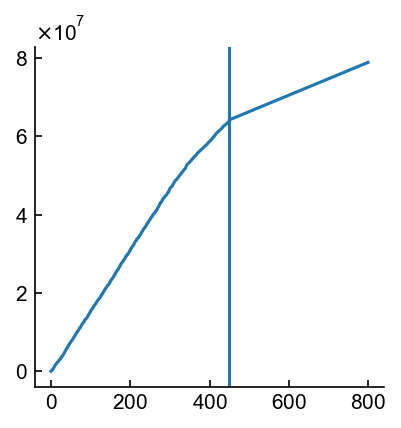

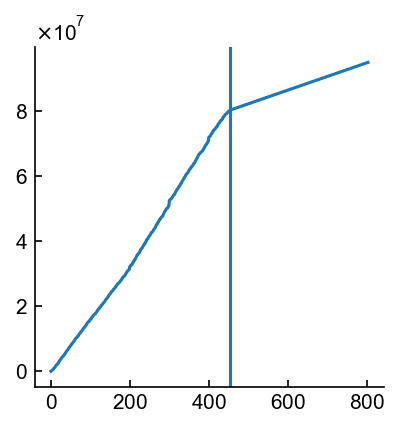

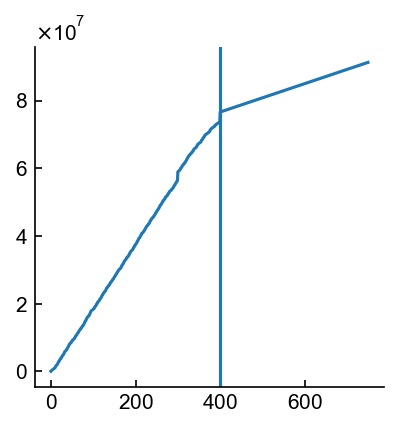

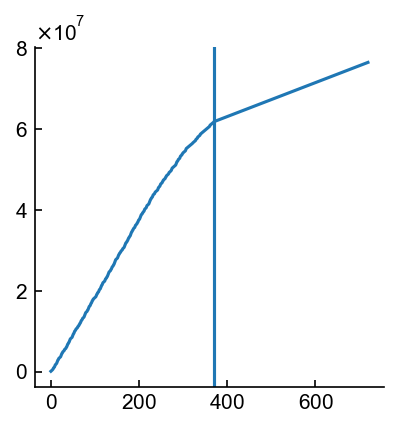

In [4]:
sessionfile = None

for session in tqdm(os.listdir(act_directory)):
    sessionfile_temp = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile_temp.meta.animal == 'BS_187':
        sessionfile = sessionfile_temp
        print(session + ' ' + str(len(sessionfile.tuning.trial_starts)))
        
        #print(sessionfile.meta.first_tuning_trial)
        #print(sessionfile.meta.first_tuning_trial_corrected)
        
        fig,ax = plt.subplots(figsize=(3,3))
        ax.plot(range(len(sessionfile.tuning.all_tone_times)),sessionfile.tuning.all_tone_times)
        ax.axvline(sessionfile.meta.length_in_trials)
        
        diffs = np.diff(sessionfile.tuning.all_tone_times)
        tuning = np.less(np.abs(diffs - 42000),1000)
        #print(tuning)
        print(np.sum(tuning))

In [6]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_187_1_tuning_AC.pickle')

In [3]:
l = 10
t = 5
lc = l - t

In [4]:
print(l)
print(t)
print(lc)

10
5
5


In [6]:
list(range(lc))

[0, 1, 2, 3, 4]

In [13]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_187_3_tuning_AC.pickle')

In [37]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_200','TH_201','TH_203','LA_204','LA_205']:
        continue
        
    freqs = sessionfile.trials.freqs
    for tone in freqs:
        if tone not in [5648,11260]:
            print('ERROR: '+ilep.generateSaveString(sessionfile))
            break
    print(ilep.generateSaveString(sessionfile))
    print(freqs)

LA_204_1_passive_AC
[]
LA_204_2_passive_AC
[11260. 11260. 11260. 11260. 11260.  5648.  5648. 11260.  5648. 11260.
  5648.  5648. 11260.  5648. 11260. 11260.  5648. 11260. 11260.  5648.
 11260.  5648. 11260.  5648. 11260.  5648.  5648.  5648. 11260.  5648.
  5648.  5648. 11260.  5648. 11260. 11260. 11260.  5648.  5648. 11260.
  5648. 11260.  5648.  5648. 11260.  5648. 11260. 11260.  5648. 11260.
 11260.  5648. 11260.  5648. 11260.  5648. 11260.  5648.  5648.  5648.
 11260.  5648.  5648.  5648. 11260.  5648. 11260. 11260. 11260.  5648.
  5648. 11260.  5648. 11260.  5648.  5648. 11260.  5648. 11260. 11260.
  5648. 11260. 11260.  5648. 11260.  5648. 11260.  5648. 11260.  5648.
  5648.  5648. 11260.  5648.  5648.  5648. 11260.  5648. 11260. 11260.
 11260.  5648.  5648. 11260.  5648. 11260.  5648.  5648. 11260.  5648.
 11260. 11260.  5648. 11260. 11260.  5648. 11260.  5648. 11260.  5648.
 11260.  5648.  5648.  5648. 11260.  5648.  5648.  5648. 11260.  5648.
 11260. 11260. 11260.  5648.  5648

In [8]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task not in ['passive no behavior']:
        continue
        
    if sessionfile.responsiveness != {}:
        continue
        
    print(session)
    print(sessionfile.responsiveness)
    #break

LA_204_1_passive_AC.pickle
{}


In [4]:
animals_in_cache = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animals_in_cache.append(sessionfile.meta.animal)
for session in tqdm(os.listdir(ops_directory)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    animals_in_cache.append(sessionfile.meta.animal)
animals_in_cache = np.unique(animals_in_cache)

training_days_recorded = dict()
for animal in animals_in_cache:
    training_days_recorded[animal] = []
    
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.region != 'AC':
        continue
    training_days_recorded[sessionfile.meta.animal].append(sessionfile.meta.day_of_training)
for session in tqdm(os.listdir(ops_directory)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    if sessionfile.meta.region != 'AC':
        continue
    training_days_recorded[sessionfile.meta.animal].append(sessionfile.meta.day_of_training)
    
print(training_days_recorded['BS_59'])

100%|██████████| 101/101 [00:00<00:00, 243.91it/s]

[]


In [5]:
#dualnames = ['BS_108','BS_113','BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_70','BS_72','BS_83','BS_85','BS_87','BS_95']
#animalnames = dualnames

#Animals missing:
#113,50,83,95
#Animals added:
#61,67,15,16,17,19,22

#animalnames = ['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214']
unuseddualanimals = ['BS_78']

animalnames = np.concatenate([dualanimalnames,unuseddualanimals])#,opsinanimalnames,tuninganimalnames])

animals = dict()
for animal in animalnames:
    animals[animal] = SimpleNamespace()
    animals[animal].name = animal
    
#Dual Recording Animals
#animals['BS_33'].reversal = 20
animals['BS_67'].reversal = 7
#animals['BS_73'].reversal = np.nan
animals['BS_78'].reversal = np.nan
animals['BS_108'].reversal = 7
#animals['BS_113'].reversal = 13
animals['BS_40'].reversal = 18
animals['BS_41'].reversal = 6
animals['BS_42'].reversal = 7
animals['BS_49'].reversal = 13
animals['BS_50'].reversal = 12
animals['BS_51'].reversal = 8
#animals['BS_52'].reversal = 15
animals['BS_56'].reversal = 8
animals['BS_59'].reversal = 7
#animals['BS_61'].reversal = 9    ###
animals['BS_70'].reversal = 8
animals['BS_72'].reversal = 6
#animals['BS_83'].reversal = 20
#animals['BS_85'].reversal = 10
animals['BS_87'].reversal = 6
#animals['DS_16'].reversal = 11
#animals['BS_95'].reversal = 8
animals['DS_15'].reversal = 12
animals['DS_19'].reversal = 12

##Opsin Animals
#animals['BS_86'].reversal = 14
#animals['BS_92'].reversal = 9
#animals['BS_100'].reversal = 11
#animals['BS_103'].reversal = 8
#animals['BS_111'].reversal = 8
#animals['BS_119'].reversal = 10
#animals['BS_123'].reversal = 9
#animals['BS_128'].reversal = 6
#animals['BS_131'].reversal = 14
#animals['BS_139'].reversal = 10
#animals['BS_163'].reversal = 13
#animals['BS_165'].reversal = np.Inf
#animals['BS_174'].reversal = 14
#animals['BS_179'].reversal = 16
#animals['BS_191'].reversal = 10
#animals['BS_192'].reversal = 7

##Tuning Animals
#animals['BS_173'].reversal = 15
#animals['BS_175'].reversal = 11
#animals['BS_187'].reversal = 8
#animals['BS_188'].reversal = 8
#animals['BS_213'].reversal = 8
#animals['BS_214'].reversal = np.Inf

print([a for a in animals])

['BS_40', 'BS_41', 'BS_42', 'BS_49', 'BS_50', 'BS_51', 'BS_56', 'BS_59', 'BS_67', 'BS_70', 'BS_72', 'BS_87', 'BS_108', 'DS_15', 'DS_19', 'BS_78']


BS_40
6
BS_41
3
BS_42
3
BS_49
2
BS_50
7
BS_51
6
BS_56
4
BS_59
3
BS_67
4
BS_70
5
BS_72
3
BS_87
4
BS_108
3
DS_15
7
DS_19
4
BS_78
BS_78 has no post-reversal
inf


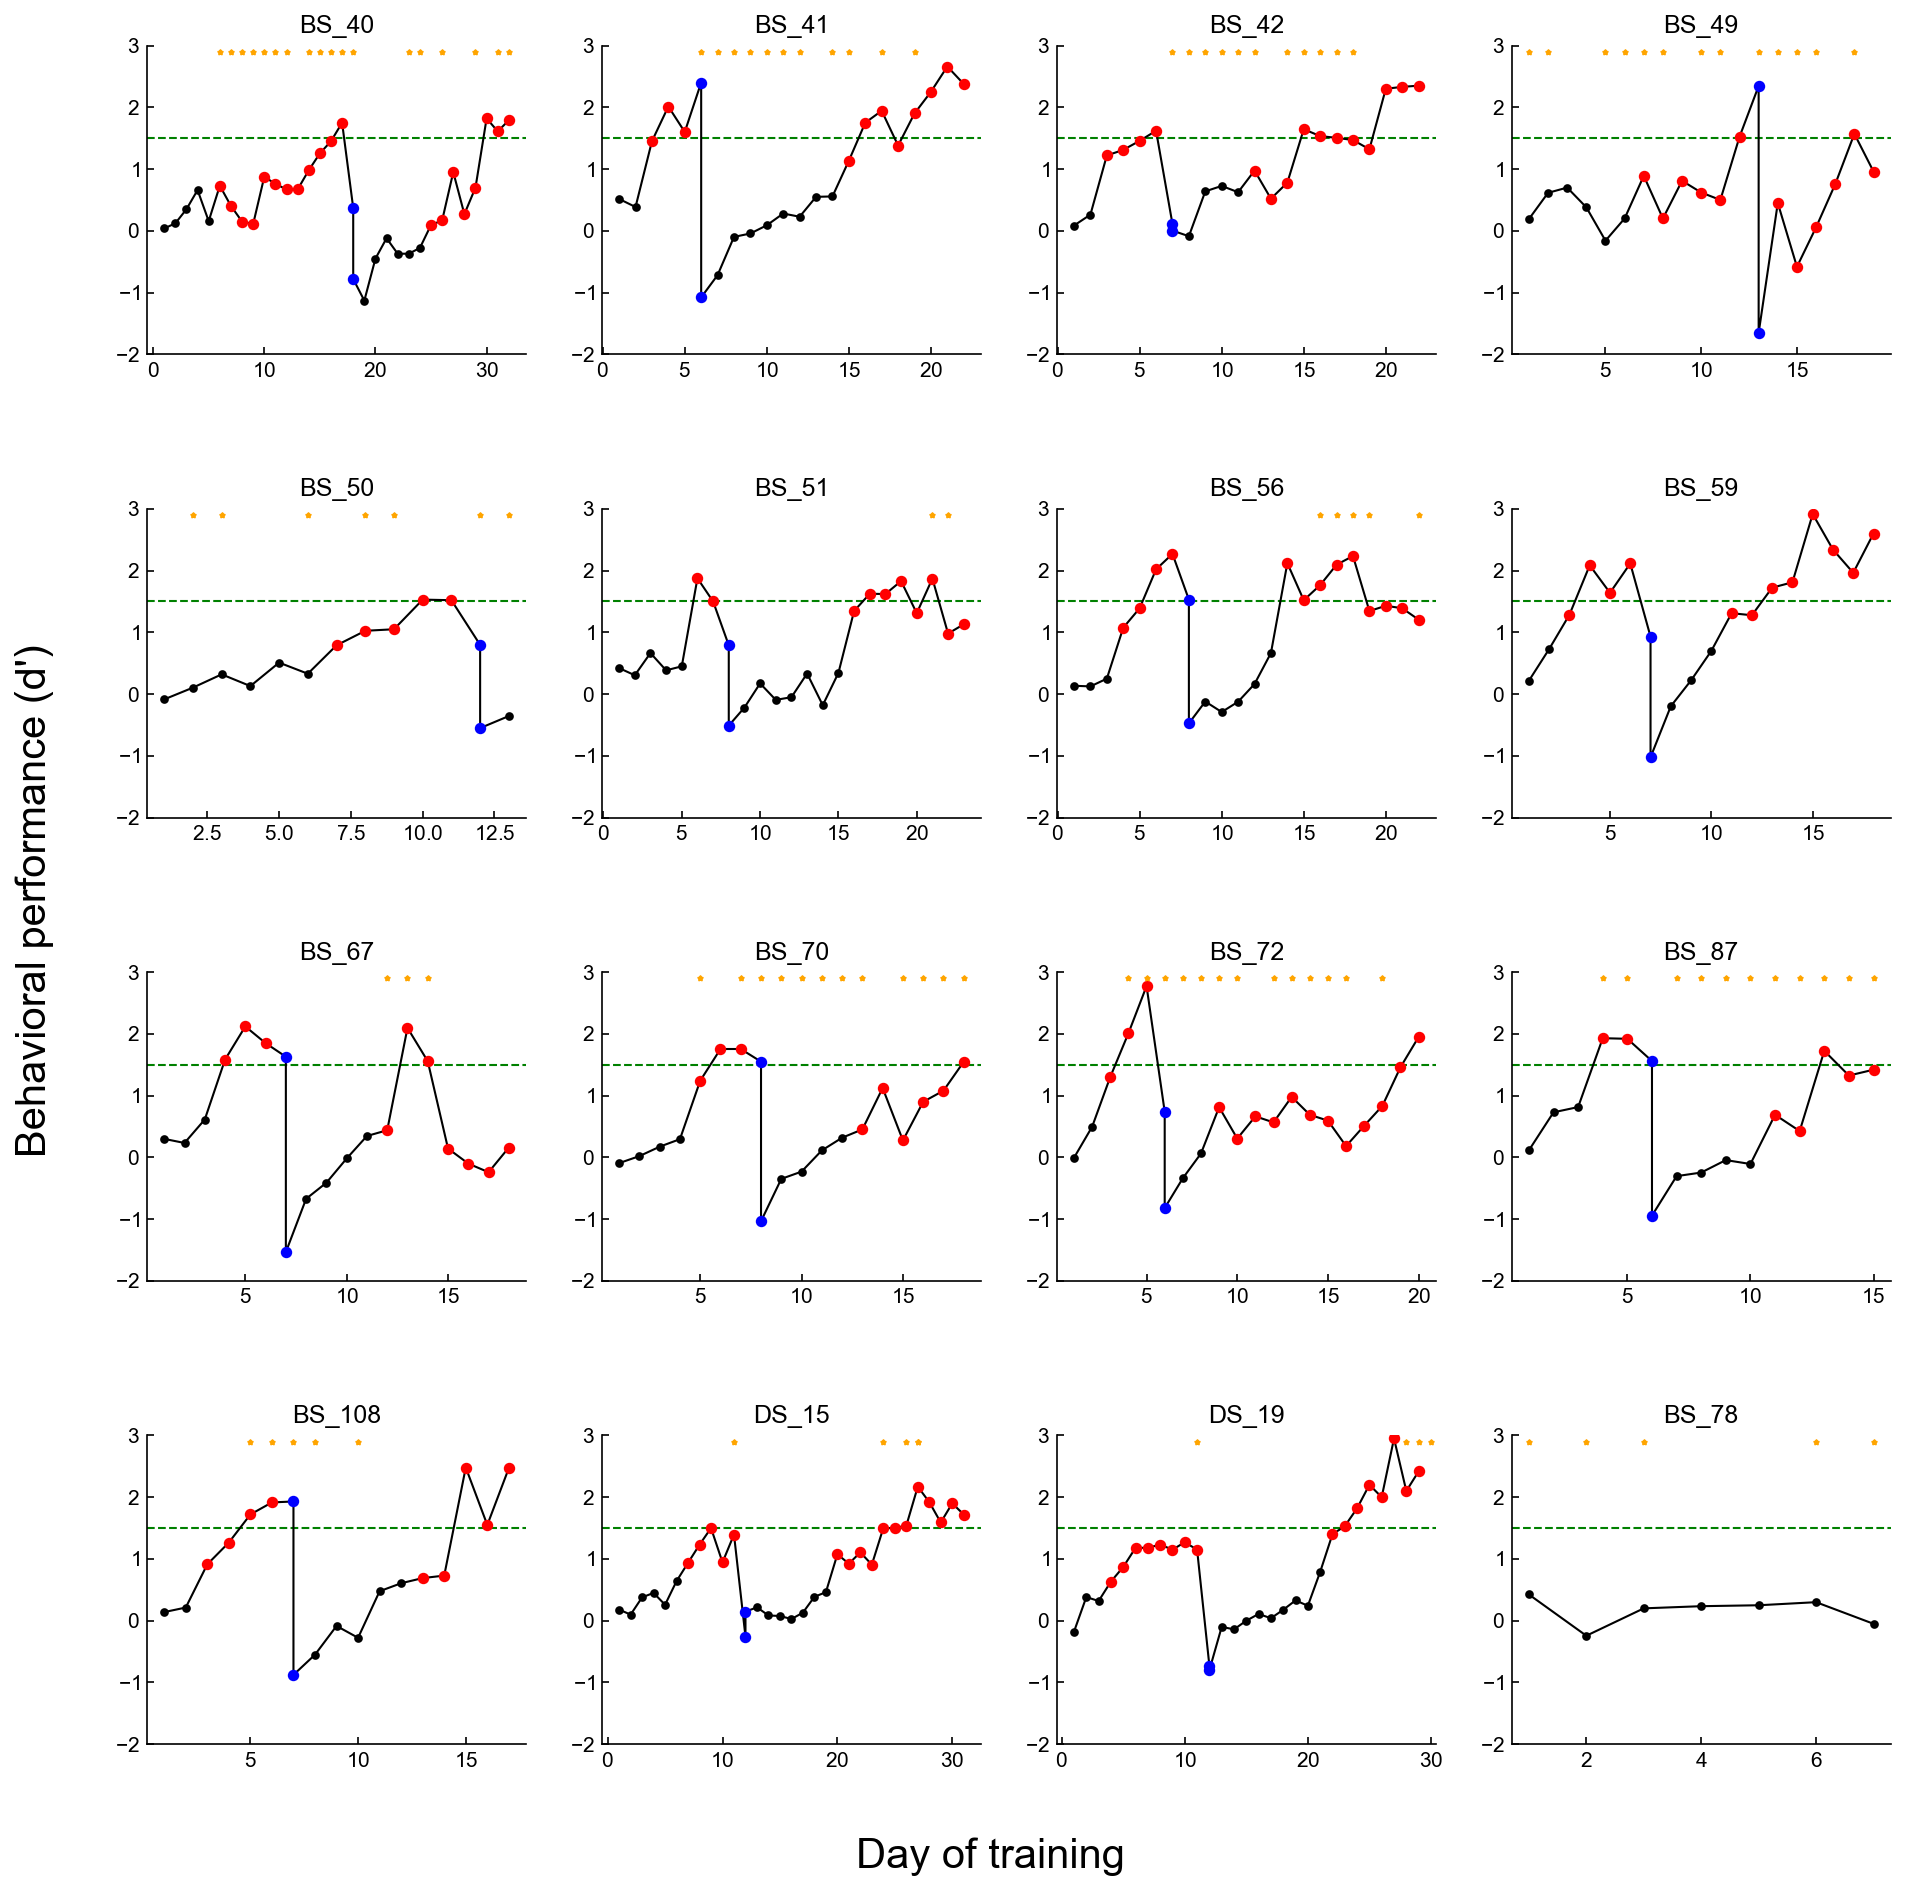

In [6]:
filename = os.path.join('C:\\\\Users','insan','Desktop','DataForJMTTotal.csv')
#filename = os.path.join('C:\\\\Users','4thgr','Desktop','DataForJMT.csv')
csv = pd.read_csv(filename)

postthresholds = dict()

plot=True
if plot:
    fig = plt.figure(figsize=(15,15))
    gs = fig.add_gridspec(4,4,hspace=0.5)
    axs = [plt.subplot(gs[i,j]) for i,j in product(range(4),range(4))]
    #plt.delaxes(axs[14])
    #plt.delaxes(axs[15])

premiddlecutoffs = dict()
postmiddlecutoffs = dict()
PERphases = dict()

for animalidx,animal in enumerate(animals):
    print(animal)
    PERphases[animal] = dict()
    
    condname = 'd\' ' + animal
    pc_condname = 'Percent correct ' + animal
    days = np.array(list(csv['Day']))
    cond = csv[condname]
    cond_pc = csv[pc_condname]
    
    #Correct for double reversal days
    for idx,day in enumerate(days):
        if day > animals[animal].reversal:
            days[idx] = day-1
            
        if day > animals[animal].reversal+1: #  +1 because the csv stores the switch day as two entries
            #Calculate PERphase
            PC = cond_pc[idx]
            if PC <= 47.5:
                PERphases[animal][day-1] = 'perseveration'
            elif PC >= 52.5:
                PERphases[animal][day-1] = 'refinement'
            else:
                PERphases[animal][day-1] = 'exploration'
            
    #days = days - animals[animal].reversal
    
    prereversaldays = []
    prereversaldps = []
    maxreversaldp = -np.Inf
    minreversaldp = np.Inf
    postreversaldays = []
    postreversaldps = []
    for idx,day in enumerate(days):
        if day < animals[animal].reversal or np.isnan(animals[animal].reversal):
            prereversaldays.append(day)
            prereversaldps.append(cond[idx])
        if day == animals[animal].reversal:
            maxreversaldp = max(cond[idx],maxreversaldp)
            minreversaldp = min(cond[idx],minreversaldp)
        if day > animals[animal].reversal and not np.isnan(cond[idx]):
            postreversaldays.append(day)
            postreversaldps.append(cond[idx])
            
    #Prereversal threshold
    maxperf = np.nanmax(np.concatenate((prereversaldps,[1.5])))
    minperf = np.nanmin(prereversaldps)
    prethreshold = minperf + 0.4*(maxperf-minperf)
    #Postreversal threshold
    try:
        maxperf = np.nanmax(np.concatenate((postreversaldps,[1.5])))
        minperf = np.nanmin(postreversaldps)
    except:
        print(animal+' has no post-reversal')
        maxperf = np.nan
        minperf = np.nan
    postthreshold = minperf + 0.4*(maxperf-minperf)
    
    postthresholds[animal] = postthreshold
    
    prereversaldays = np.array(prereversaldays)
    prereversaldps = np.array(prereversaldps)
    postreversaldays = np.array(postreversaldays)
    postreversaldps = np.array(postreversaldps)
    
    premiddlebool = np.greater_equal(prereversaldps,prethreshold)
    for idx,day in enumerate(prereversaldays):
        if premiddlebool[idx]:
            premiddlebool[idx:(len(premiddlebool)-1)].fill(True)
        #if not premiddlebool[idx]:
        #    premiddlebool[0:idx].fill(False)
    if np.any(premiddlebool):
        premiddlefirstday = np.min(prereversaldays[premiddlebool])
    else:
        premiddlefirstday = np.Inf
        
    print(premiddlefirstday)
                     
    postmiddlebool = np.greater_equal(postreversaldps,postthreshold)
    for idx,day in enumerate(postreversaldays):
        if postmiddlebool[idx]:
            postmiddlebool[idx:(len(postmiddlebool)-1)].fill(True)
        #if not postmiddlebool[idx]:
        #    postmiddlebool[0:idx].fill(False)
    if np.any(postmiddlebool):
        postmiddlefirstday = np.min(postreversaldays[postmiddlebool])
    else:
        postmiddlefirstday = np.Inf
    
    if animal == 'BS_95':
        premiddlefirstday = 4
    if animal == 'BS_49':
        premiddlefirstday = 7
    if animal in ['BS_83','BS_50']:
        postmiddlefirstday = np.Inf
    
    premiddlecutoffs[animal] = premiddlefirstday
    postmiddlecutoffs[animal] = postmiddlefirstday
    
    if plot:
        ax = axs[animalidx]    
        #All Days no color
        ax.plot(days,cond,color='k',lw=1)
        ax.scatter(days,cond,color='k',s=10,zorder=9)
        #Pre Middle
        premiddle = np.logical_and( np.greater_equal(days,premiddlefirstday), np.less(days,animals[animal].reversal) )
        ax.scatter(days[premiddle],cond[premiddle],color='r',s=20,zorder=10)
        #Post Middle
        postmiddle = np.greater_equal(days,postmiddlefirstday)
        ax.scatter(days[postmiddle],cond[postmiddle],color='r',s=20,zorder=10)
        #Switch
        switch = np.equal(days,animals[animal].reversal)
        ax.scatter(days[switch],cond[switch],color='b',s=20,zorder=10)

        xlims = ax.get_xlim()
        ax.plot(xlims,[1.5,1.5],c='g',linestyle='--',lw=1,zorder=-10)
        ax.set_xlim(xlims)
        ax.set_ylim([-2,3])
        
        days_recorded = training_days_recorded[animal]
        ax.scatter(days_recorded,np.ones_like(days_recorded)*2.9,s=5,marker='*',color='orange',zorder=11)

        ax.set_title(animal)
        
fig.text(0.075, 0.5, 'Behavioral performance (d\')', ha='center', va='center', rotation='vertical',fontsize=20)
fig.text(0.5,0.075, 'Day of training', ha='center', va='center', rotation='horizontal',fontsize=20)

if plot:
    plt.savefig(os.path.join('D:\\\\TempFigures','EIL Learning Phases for Passive No Behavior Days Cutoffs.pdf'),transparent=False,facecolor="white")
    pass

In [17]:
np.mean([3,7,8,2,7,9,6,2,1,2,3,3])

4.416666666666667

In [18]:
np.std([3,7,8,2,7,9,6,2,1,2,3,3])

2.6601482832520613

In [4]:
num_ramp = 0

for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.task == 'passive no behavior':
        pass
    
    for clust in sessionfile.clusters.good:
        if hasattr(sessionfile.responsiveness[clust]['all_trials'],'rampingMod'):
            num_ramp += 1
            print(f"{sessionfile.responsiveness[clust]['all_trials'].rampingMod}, {sessionfile.responsiveness[clust]['all_trials'].rampingModNorm}, {sessionfile.responsiveness[clust]['all_trials'].rampingBaseline}")
            
print(num_ramp)

0.4269986754966887, 2.9669605551363, 0.14391788079470194
0.24221229050279325, 0.0886850653335406, 2.7311508379888263
-0.04150755555555559, -0.01767681738548456, 2.34813511111111
-0.0801385474860331, -0.014396286880398988, 5.566612290502792
2.046583281733746, 0.4615034041341102, 4.434600619195045
0.2671061452513959, 0.010391853649176802, 25.70341675977653
0.9028335195530728, 0.16571405836566466, 5.448140782122904
-0.40060335195530744, -0.12429763205626719, 3.222936312849161
2.0308871508379887, 0.27019428960808806, 7.516395530726256
0.5408581005586593, 0.7574118928256262, 0.7140871508379886
0.4392223463687148, 0.05303461205124079, 8.281805586592178
1.5180067039106142, 0.1001857980007911, 15.15191508379888
-0.3009608938547488, -0.07484696330175815, 4.021016759776535
0.4281608938547486, 0.13768517420657592, 3.1097094972067034
-0.018654748603351947, -0.008361595955022864, 2.231003351955307
1.295711475409836, 0.5045725686736487, 2.567938797814207
0.7644513966480446, 0.6853257527040051, 1.115

In [17]:
len(ITIbaselines)

9223

In [16]:
ITIbaselines = []
rampbaselines = []
slowgobaselines = []

for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    #if sessionfile.meta.task == 'passive no behavior':
    #    continue
    #if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
    #    continue
    #if sessionfile.meta.region != 'AC':
    #    continue
    
    for clust in sessionfile.clusters.good:
        if hasattr(sessionfile.responsiveness[clust]['all_trials'],'rampingMod'):
            
            ITIbaselines.append(sessionfile.responsiveness[clust]['all_trials'].FRbaseline)
            rampbaselines.append(sessionfile.responsiveness[clust]['go_response'].rampingBaseline)
            slowgobaselines.append(sessionfile.responsiveness[clust]['slow_go_response'].rampingBaseline)

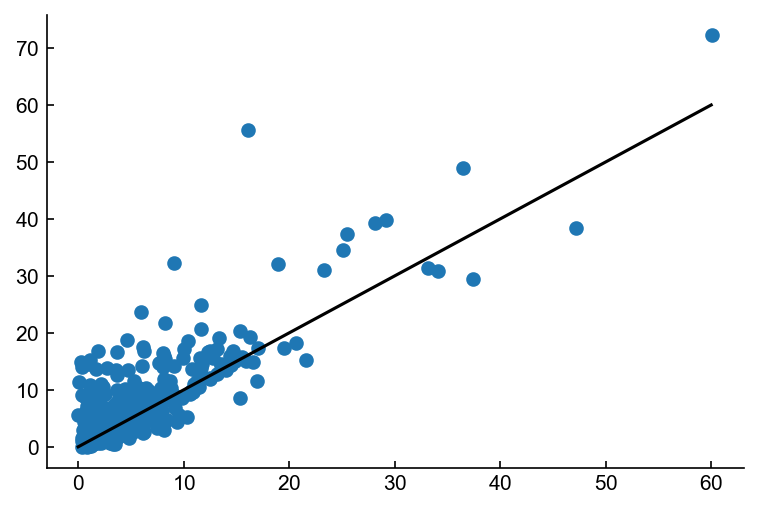

In [16]:
plt.scatter(ITIbaselines,rampbaselines)
plt.plot([0,60],[0,60],'k')

In [4]:
plt.scatter(ITIbaselines,slowgobaselines)
plt.plot([0,60],[0,60],'k')

NameError: name 'ITIbaselines' is not defined

In [10]:
rampbaselines

[0.14391788079470194,
 2.7311508379888263,
 2.34813511111111,
 5.566612290502792,
 4.434600619195045,
 25.70341675977653,
 5.448140782122904,
 3.222936312849161,
 7.516395530726256,
 0.7140871508379886,
 8.281805586592178,
 15.15191508379888,
 4.021016759776535,
 3.1097094972067034,
 2.231003351955307,
 2.567938797814207,
 1.115456983240223,
 37.10329385474859,
 1.319773333333333,
 1.5478413407821225,
 1.3877854748603347,
 17.232531843575416,
 6.237088268156423,
 2.077932960893855,
 2.654925139664804,
 11.991921787709494,
 3.8895977653631277,
 2.268735195530726,
 2.7225229050279323,
 1.2846569105691055,
 0.4203022222222218,
 2.2711128491620105,
 2.1714748603351945,
 1.1364826815642455,
 9.269363128491616,
 2.251434636871508,
 9.35600223463687,
 0.4554987341772151,
 1.7676266666666662,
 8.135090502793295,
 8.711955307262567,
 4.937392178770949,
 5.48503910614525,
 1.4075128491620108,
 1.5093631284916196,
 3.1180326848249016,
 11.052744186046505,
 2.8518030769230758,
 3.3668605042016804,

In [11]:
(350+90)/(400+90)

0.8979591836734694

In [2]:
X,Y = [np.random.normal(size=1000),np.random.normal(size=1000)]

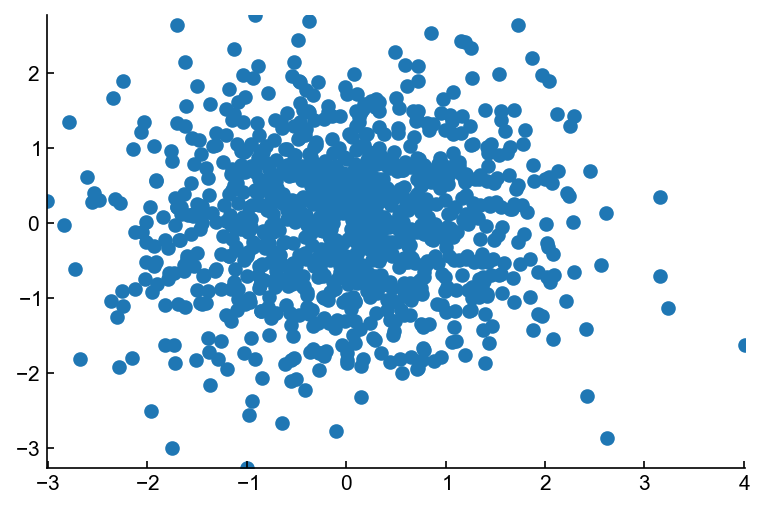

In [12]:
plt.scatter(X,Y)
plt.margins(0)
plt.savefig('D:\\tempfigtest.pdf',pad_inches=10)

In [28]:
num_both = 0
num_1 = 0
num_0 = 0
for session in os.listdir(ops_directory):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    try:
        for clust in sessionfile.clusters.good:

            num = 0

            if np.isfinite(sessionfile.responsiveness[clust]['hit_trials'].FRmodulation):
                num+=1
            else:
                print(session+' No hit')
            if np.isfinite(sessionfile.responsiveness[clust]['miss_trials'].FRmodulation):
                num+=1
            else:
                print(session+' No miss')

            if num == 2:
                num_both += 1
            elif num == 1:
                num_1 += 1
            else:
                num_0 += 1
    except:
        pass

BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_6_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_103_7_opto_AC.pickle No miss
BS_111_4_opto_AC.pickle No miss
BS_111_4_opto_AC.pickle No miss
BS_111_5_opto_AC.pickle No miss
BS_111_5_opto_AC.pickle No miss
BS_111_5_opto_AC.pickle No miss
BS_111_5_opto_AC.pickle No miss
BS_111_8_opto_AC.pickle No miss
BS_111_8_opto_AC.pickle No miss
BS_111_8_opto_AC.pickle No miss
BS_111_8_opto_AC.pickle No miss
BS_139_1_opto_AC.pickle No miss
BS_139_4_opto_AC.pickle No hit
BS_139_4_

In [26]:
print(num_both)
print(num_1)
print(num_0)

1663
105
0


In [27]:
sessionfile = ilep.getRandomSession(act_directory)
print(sessionfile.meta.task)

switch


In [32]:
sessionfile.responsiveness[19]

{'all_trials': namespace(trials=array([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
                          32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
                          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
                          58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
                          71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
                          97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                         110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
                         123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
                         136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
                         149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 1

In [33]:
ilep.getAllConditions(sessionfile,19)

NONE
NONE
NONE
NONE
NONE
target
NONE
NONE
nontarget
NONE
NONE
go
NONE
NONE
nogo
NONE
NONE
hit
NONE
NONE
miss
NONE
NONE
falarm
NONE
NONE
creject
NONE
NONE
slow_go
NONE
NONE
fast_go
NONE
NONE
correct
NONE
NONE
incorrect
pre_switch
NONE
NONE
pre_switch
NONE
target
pre_switch
NONE
nontarget
pre_switch
NONE
go
pre_switch
NONE
nogo
pre_switch
NONE
hit
pre_switch
NONE
miss
pre_switch
NONE
falarm
pre_switch
NONE
creject
pre_switch
NONE
slow_go
pre_switch
NONE
fast_go
pre_switch
NONE
correct
pre_switch
NONE
incorrect
post_switch
NONE
NONE
post_switch
NONE
target
post_switch
NONE
nontarget
post_switch
NONE
go
post_switch
NONE
nogo
post_switch
NONE
hit
post_switch
NONE
miss
post_switch
NONE
falarm
post_switch
NONE
creject
post_switch
NONE
slow_go
post_switch
NONE
fast_go
post_switch
NONE
correct
post_switch
NONE
incorrect


{'all_trials': namespace(trials=array([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
                          32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
                          45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
                          58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
                          71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
                          97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
                         110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
                         123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
                         136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
                         149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 1

In [13]:
sessionfile.meta.task

'reversal'

In [2]:
with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
        trialsPerDayLoaded = pickle.load(f)

In [14]:
sessionfile = ilep.getRandomSession(ops_directory)
print(sessionfile.meta.task)

opto reversal


In [15]:
sessionfile.clusters.good

array([ 3, 18, 19, 20, 27, 30, 37], dtype=int64)

In [16]:
ilep.getAllConditions(sessionfile,,trialsPerDayLoaded=trialsPerDayLoaded)

KeyError: 0

In [12]:
animals = []
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animals.append(sessionfile.meta.animal)
animals = np.unique(animals)
print(animals)

['AE_229' 'AE_231' 'AE_235' 'AE_236' 'BS_108' 'BS_113' 'BS_173' 'BS_175'
 'BS_187' 'BS_188' 'BS_213' 'BS_214' 'BS_33' 'BS_40' 'BS_41' 'BS_42'
 'BS_49' 'BS_50' 'BS_51' 'BS_56' 'BS_59' 'BS_67' 'BS_70' 'BS_72' 'BS_73'
 'BS_78' 'BS_83' 'BS_85' 'BS_87' 'BS_95' 'DS_15' 'DS_16' 'DS_17' 'DS_19'
 'DS_22' 'DS_27' 'DS_28' 'LA_204' 'LA_205' 'TH_200' 'TH_201' 'TH_203'
 'TH_217' 'TH_230' 'TH_233' 'TH_234' 'TH_237']


In [6]:
num_units = []
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal not in ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']:
        continue
    if sessionfile.meta.region == 'M2':
        num_units.append(len(sessionfile.clusters.good))
        
print(np.sum(num_units))

1628


In [4]:
num_units

[84,
 80,
 24,
 22,
 48,
 60,
 36,
 46,
 18,
 19,
 27,
 89,
 56,
 33,
 16,
 37,
 32,
 57,
 37,
 12,
 6,
 4,
 31,
 2,
 22,
 33,
 14,
 11,
 17,
 35,
 11,
 3,
 33,
 20,
 57,
 2,
 49,
 45,
 32,
 49,
 26,
 26,
 26,
 41,
 51,
 41,
 30,
 50,
 22,
 19,
 24,
 53,
 41,
 41,
 47,
 12,
 24,
 34,
 23,
 7,
 74,
 22,
 27,
 21,
 28,
 5,
 7,
 8,
 4,
 6,
 8,
 6,
 1,
 10,
 13,
 6,
 18,
 5,
 4,
 4,
 9,
 5,
 34,
 23,
 16,
 39,
 20,
 2,
 17,
 0,
 19,
 0,
 23,
 12,
 11,
 6,
 13,
 12,
 5,
 55,
 29,
 8,
 4,
 10,
 4,
 8,
 1,
 16,
 38,
 10,
 0,
 29,
 9,
 5,
 16,
 20,
 13,
 9,
 3,
 18,
 39,
 30,
 30,
 13,
 26,
 31,
 2,
 2,
 1,
 6,
 0,
 2,
 0,
 3,
 52,
 31,
 27,
 5,
 2,
 2,
 15,
 0,
 0,
 21,
 12,
 0,
 0,
 6,
 4,
 0,
 10,
 1,
 8,
 2,
 2,
 7,
 11,
 1,
 9,
 9,
 5,
 3,
 27,
 0,
 2,
 4,
 14,
 8,
 15,
 16,
 7,
 0,
 2,
 4,
 19,
 12,
 12,
 25,
 15,
 23,
 8,
 10,
 3,
 5,
 22,
 7,
 1,
 13,
 1,
 6,
 13,
 7,
 5,
 10,
 7,
 1,
 8,
 8,
 0,
 4,
 12,
 10,
 13,
 20,
 14,
 12,
 25,
 50,
 19,
 28,
 19,
 10,
 8,
 9,
 1,
 29,
 26,
 18,

In [93]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='D:\\BS_72\\BS_72 2\\AC\\',
          region='AC',
          animal='BS_72',
          probe=6927,
          date='11/24/2021',
          depth=801,
          task='nonreversal',
          day_of_training=5,
          day_of_recording=2,
          length_in_samples=55495518.0,
          files=['November 24 2021 Dual BS_72_2001',
                 'November 24 2021 Dual BS_72_2002'],
          behavior='expert',
          condition='prereversal expert',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=1849.8506,
          length_in_minutes=30.830843333333334,
          length_in_trials=400)

In [94]:
clust = sessionfile.clusters.good[0]
clust

0

In [95]:
def calculateRampingClusterInternal(sessionfile,clust,bootstrap_iterations=5000,minrampingwindow=100,maxrampingwindow=500,binsize=50,verbose=False):#Window in ms
    if not hasattr(sessionfile,'trim'):
        if verbose:
            print(sessionfile.meta.animal+' '+str(sessionfile.meta.date).replace('/','-')+' '+sessionfile.meta.region+' not trimmed')
        return None
    
    responsiveness = dict()
    all_conditions = ilep.getAllConditions(sessionfile,clust)                       ############################################################################
    for cond in all_conditions:
        responsiveness[cond] = all_conditions[cond]
        
    #Calculate average lick delay
    go_trials = np.where(sessionfile.trials.go)[0]
    go_responses = np.array(sessionfile.trials.response)[go_trials]
    go_starts = np.array(sessionfile.trials.starts)[go_trials]
    avgLickDelay = np.nanmean(go_responses - go_starts)

    #Calculate response time of each trial
    response_times = np.zeros_like(sessionfile.trials.starts)
    window_lengths = np.zeros_like(sessionfile.trials.starts)
    for trial_idx in range(len(response_times)):
        if sessionfile.trials.go[trial_idx]:
            response_times[trial_idx] = sessionfile.trials.response[trial_idx] - sessionfile.trials.starts[trial_idx]
        else:
            response_times[trial_idx] = avgLickDelay
        
        window_lengths[trial_idx] = (response_times[trial_idx]) - 0.2*sessionfile.meta.fs
        
    #print(f"Available window lengths in sec are {np.array(window_lengths) / sessionfile.meta.fs}")

    if verbose:
        print(f"response times in samples are {response_times}")

    for cond in responsiveness:            
        #calculate bins
        
        #Remove trials with no valid ramping window from analysis
        trimmed_cond_trials = []
        for trial_idx,trial in enumerate(responsiveness[cond].trials):
            if window_lengths[trial] >= minrampingwindow / 1000 * sessionfile.meta.fs:
                trimmed_cond_trials.append(trial)
        responsiveness[cond].trials = list(trimmed_cond_trials)
        
        #print(f"Trimmed_cond_trials is {trimmed_cond_trials}")
        
        #Calculate size of ramping window to use -- nearest whole bin
        binsize_ms = binsize #50 by default
        binsize_sec = binsize_ms / 1000
        binsize_samples = binsize_ms * sessionfile.meta.fs / 1000
        num_bins = np.zeros_like(trimmed_cond_trials)
        #print(f"there are {len(trimmed_cond_trials)} trials in trimmed_cond_trials")
        #print(f"there are {len(window_lengths)} trials in window_lengths")
        max_num_bins = int(np.floor(maxrampingwindow / binsize_ms))
        for trial_idx,trial in enumerate(trimmed_cond_trials):
            #print(f"trial is {trial}, trial_idx is {trial_idx}")
            num_bins[trial_idx] = np.floor(window_lengths[trial] / binsize_samples)
            num_bins[trial_idx] = min(num_bins[trial_idx],max_num_bins)
        
        #print(f"num_bins is {num_bins}")
        
        #window_length_ms = 250
        baseline_window_length_ms = 150
        baseline_window_length_sec = baseline_window_length_ms / 1000
        #num_bins = int(window_length_ms/binsize_ms)
        spiking_bins = np.full( (len(trimmed_cond_trials) , max_num_bins), np.nan)
        baseline_FRs = np.full(len(trimmed_cond_trials), np.nan)
        #print(f"max_num_bins is {max_num_bins}")
        #print(f"spiking_bins_shape is {spiking_bins.shape}")
        for trial_idx,trial in enumerate(trimmed_cond_trials):
            for bin_idx in range(num_bins[trial_idx]):
                
                #Make sure that these bins are aligned properly
                this_trial_response_time_samples = sessionfile.trials.starts[trial] + response_times[trial]
                windowstart_samples = this_trial_response_time_samples - binsize_samples * num_bins[trial_idx]
                binstart = windowstart_samples + bin_idx * binsize_samples
                binend = windowstart_samples + (bin_idx+1) * binsize_samples

                this_bin_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=binstart,endtime=binend)                       ############################################################################
                spiking_bins[trial_idx,bin_idx] = len(this_bin_spikes) / binsize_sec
        #No need for type conversion, already ndarray

        #Bootstrapped calculation
        baselines = []
        slopes = []
        for iteration in range(bootstrap_iterations):
            
            #print(f"Iteration {iteration}")

            trial_idx_list = list(range(len(trimmed_cond_trials)))
            trial_idx_list_permuted = np.random.permutation(trial_idx_list)
            trial_idx_sampled_list = trial_idx_list_permuted[0:int(0.9*len(trial_idx_list_permuted))]
            #print(f"trials used will be {trial_idx_sampled_list}")
            if len(trial_idx_sampled_list) <= 10:
                baselines.append(np.nan)
                slopes.append(np.nan)
                #print(f"Skipping iteration {iteration}")
                continue
                

            avg_across_bins = np.nanmean(spiking_bins[trial_idx_sampled_list,:],axis=0)    #Is this the order that I want to do this in? I think so? Also I think this is actually across trials
            #Ensure that all bins used have at least 10 valid trials
            num_valid_bins_this_fold = np.sum(np.isfinite(spiking_bins),axis=0)
            avg_across_bins = avg_across_bins[np.greater_equal(num_valid_bins_this_fold,10)]
            
            #print(f"avg_across_bins is {avg_across_bins}")

            num_bins_this_fold = len(avg_across_bins)
            X = np.matrix([np.ones(num_bins_this_fold) , np.linspace(0,num_bins_this_fold,num=num_bins_this_fold)]).T
            Y = np.matrix(avg_across_bins).T
            LSE = np.array(np.linalg.inv(X.T@X) @ (X.T@Y))
            
            #print(f"LSE is {LSE}")

            baselines.append(LSE[0][0])
            slopes.append(LSE[1][0])           #Slope is currently per bin

        responsiveness[cond].rampingSlopePerBin = np.mean(slopes)
        responsiveness[cond].rampingMod = np.mean(slopes)*max_num_bins
        responsiveness[cond].rampingModNorm = np.mean(slopes)*max_num_bins/np.mean(baselines)
        responsiveness[cond].rampingBaseline = np.mean(baselines)

    return responsiveness

In [96]:
calculateRampingClusterInternal(sessionfile,clust,bootstrap_iterations=1,minrampingwindow=100,maxrampingwindow=500,verbose=False)

{'all_trials': namespace(trials=[231,
                   232,
                   235,
                   236,
                   237,
                   240,
                   242,
                   244,
                   245,
                   247,
                   252,
                   253,
                   254,
                   255,
                   256,
                   257,
                   259,
                   261,
                   262,
                   266,
                   269,
                   270,
                   271,
                   274,
                   276,
                   277,
                   280,
                   281,
                   282,
                   286,
                   288,
                   290,
                   292,
                   293,
                   294,
                   298,
                   300,
                   302,
                   304,
                   306,
                   307,
  

In [10]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.task == 'switch' and sessionfile.meta.region == 'AC':
        print(sessionfile.meta.files)
        print(len(sessionfile.clusters.good))
        print()

['April 18 2023 AC Second Reversal AE_240_2001', 'April 18 2023 AC Second Reversal AE_240_2002']
56

['March 24 2022 Dual BS_108_3001', 'March 24 2022 Dual BS_108_3002', 'March 24 2022 Dual BS_108_3003', 'March 24 2022 Dual BS_108_3004']
31

['April 12 2022 Dual BS_113_4001', 'April 12 2022 Dual BS_113_4002', 'April 12 2022 Dual BS_113_4003', 'April 12 2022 Dual BS_113_4004']
17

['July 28 2021 Dual BS_33_1001', 'July 28 2021 Dual BS_33_001002', 'July 28 2021 Dual BS_33_001003', 'July 28 2021 Dual BS_33_001004', 'July 28 2021 Dual BS_33_001005', 'July 28 2021 Dual BS_33_001006', 'July 28 2021 Dual BS_33_001007']
9

['August 23 Dual BS_40_14001', 'August 23 Dual BS_40_14002', 'August 23 Dual BS_40_14003', 'August 23 Dual BS_40_14004', 'August 23 Dual BS_40_14005', 'August 23 Dual BS_40_14006']
23

['August 5 2021 Dual BS_41_1001', 'August 5 2021 Dual BS_41_1002', 'August 5 2021 Dual BS_41_1003', 'August 5 2021 Dual BS_41_1004', 'August 5 2021 Dual BS_41_1005']
38

['August 6 2021 Dual B

In [15]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.region == 'AC' and sessionfile.meta.files == ['August 6 2021 Dual BS_42_1001', 'August 6 2021 Dual BS_42_1002', 'August 6 2021 Dual BS_42_1003', 'August 6 2021 Dual BS_42_1004']:
        print(sessionfile.trials.starts[200]/30000)
        for clust in sessionfile.clusters.good:
            conds = ilep.getAllConditions(sessionfile,clust)
            print(conds['all_trials'].trials)

791.6154
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]
[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

In [16]:
200*2.2/60

7.333333333333334

In [6]:
for session in os.listdir(act_directory):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.region == 'AC':
        for clust in sessionfile.clusters.good:
            try:
                Zscore = sessionfile.responsiveness[clust]['all_trials'].z_score
                print(f"session {ilep.generateDateString(sessionfile)} works")
            except Exception as e:
                print(f"session {ilep.generateDateString(sessionfile)} fails: {e}")

session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'
session AE_229_ERROR_AC_02-10-2023 fails: 'types.SimpleNamespace' object has no attribute 'z_score'


In [6]:
sessionfile.clusters.good

array([18, 25, 36, 74, 79, 94], dtype=int64)

In [5]:
sessionfile = ilep.loadSessionCached(act_directory,session)

In [2]:
session = 'TH_200_2_passive_AC.pickle'
clust = 18

In [3]:
CACHE_DIRECTORY = act_directory
OUTPUT_DIRECTORY = 'D:\\'
REPETITIONS = 500
CATEGORIES = 'stimulus'

trialsPerDayLoaded = 'NO_TRIM'

trainInterval = ilep.TrialInterval(-0.2*30000,2.5*30000,False,False)
testInterval = ilep.TrialInterval(0,2.5*30000,False,False)

In [4]:
ilep.calculateDecodingForSingleNeuron(session,clust,trialsPerDayLoaded,CACHE_DIRECTORY,OUTPUT_DIRECTORY,trainInterval,testInterval,REPETITIONS,CATEGORIES)


Starting calculation for D:\TH_200_ERROR_AC_12-14-2022 cluster 18 decoding cached result.pickle
D:\TH_200_ERROR_AC_12-14-2022 cluster 18 decoding cached result.pickle not cached. Running from scratch


../..\InsanallyLabEphysTools\decoding.py:222: RuntimeWarning: Mean of empty slice
  self._averageLickDelay = np.nanmean(go_responses - go_starts)


['target', 'nontarget']
0.4723618090452261
2
0.5276381909547738
2
fold accuracy is 0.475. w = 0.46120820668693013
fold accuracy is 0.5. w = 0.49044326241134745
fold accuracy is 0.5. w = 0.48212639311043554
fold accuracy is 0.6. w = 0.5879774569402227
fold accuracy is 0.5. w = 0.48767097264437675
fold accuracy is 0.525. w = 0.5058168693009117
fold accuracy is 0.575. w = 0.5698315602836878
fold accuracy is 0.35. w = 0.3427558257345492
fold accuracy is 0.46153846153846156. w = 0.44589275972254694
fold accuracy is 0.5641025641025641. w = 0.5487712051541838
fold accuracy is 0.45. w = 0.4402900202634245
fold accuracy is 0.475. w = 0.46675278622087124
fold accuracy is 0.575. w = 0.5642869807497466
fold accuracy is 0.325. w = 0.3246099290780141
fold accuracy is 0.575. w = 0.561514690982776
fold accuracy is 0.5. w = 0.49044326241134745
fold accuracy is 0.475. w = 0.46398049645390066
fold accuracy is 0.45. w = 0.43474544072948323
fold accuracy is 0.41025641025641024. w = 0.4200439040864573
fold 

{'accuracy': 0.4825025641025641,
 'accuracy_std': 0.06529640978518633,
 'accuracy_sem': 0.0029230687510759966,
 'weighted_accuracy': 0.47232125009742026,
 'weighted_accuracy_std': 0.06350818796937363,
 'weighted_accuracy_sem': 0.0028430169484272645,
 'synthetic_control_accuracy': 0.4934705128205128,
 'synthetic_control_accuracy_std': 0.07832779210540677,
 'synthetic_control_accuracy_sem': 0.003506433542017418,
 'synthetic_control_weighted_accuracy': 0.4932893377367312,
 'synthetic_control_weighted_accuracy_std': 0.0785384040494853,
 'synthetic_control_weighted_accuracy_sem': 0.0035158618274984204,
 'pval_synthetic_control': 0.01243044569160446,
 'pval_weighted_synthetic_control': 3.4414580360650757e-06,
 'fraction_empty_trials': 0.42212564102564104}

In [7]:
ilep.getAllConditions(sessionfile,clust,trialsPerDayLoaded='NO_TRIM')

{'all_trials': namespace(trials=array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
                          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
                          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
                          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
                          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
                          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
                          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
                         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
                         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
                         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 1

In [8]:
sessionfile.trials.freqs

array([11260., 11260., 11260., 11260., 11260.,  5648.,  5648., 11260.,
        5648., 11260.,  5648.,  5648., 11260.,  5648., 11260., 11260.,
        5648., 11260., 11260.,  5648., 11260.,  5648., 11260.,  5648.,
       11260.,  5648.,  5648.,  5648., 11260.,  5648.,  5648.,  5648.,
       11260.,  5648., 11260., 11260., 11260.,  5648.,  5648., 11260.,
        5648., 11260.,  5648.,  5648., 11260.,  5648., 11260., 11260.,
        5648., 11260., 11260.,  5648., 11260.,  5648., 11260.,  5648.,
       11260.,  5648.,  5648.,  5648., 11260.,  5648.,  5648.,  5648.,
       11260.,  5648., 11260., 11260., 11260.,  5648.,  5648., 11260.,
        5648., 11260.,  5648.,  5648., 11260.,  5648., 11260., 11260.,
        5648., 11260., 11260.,  5648., 11260.,  5648., 11260.,  5648.,
       11260.,  5648.,  5648.,  5648., 11260.,  5648.,  5648.,  5648.,
       11260.,  5648., 11260., 11260., 11260.,  5648.,  5648., 11260.,
        5648., 11260.,  5648.,  5648., 11260.,  5648., 11260., 11260.,
      

In [15]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='D:\\BS_41\\BS_41 13\\M2\\',
          region='M2',
          animal='BS_41',
          probe=7375,
          date='8/23/2021',
          depth=1300,
          task='reversal',
          day_of_training=18,
          day_of_recording=12,
          day_of_reversal=12,
          length_in_samples=83835360.0,
          files=['August 23 Dual BS_41_13001',
                 'August 23 Dual BS_41_13002',
                 'August 23 Dual BS_41_13003',
                 'August 23 Dual BS_41_13004'],
          behavior='expert',
          condition='postreversal expert',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=2794.512,
          length_in_minutes=46.5752,
          length_in_trials=499)

In [16]:
clust = sessionfile.clusters.good[0]

In [17]:
res = ilep.calculateRampingClusterInternal(sessionfile,clust,True,bootstrap_iterations=50,minrampingwindow=100,maxrampingwindow=500,mintrials=1,binsize=50,verbose=False)

In [18]:
res

{'all_trials': namespace(trials=[310,
                   312,
                   315,
                   319,
                   320,
                   322,
                   324,
                   325,
                   326,
                   329,
                   331,
                   336,
                   337,
                   338,
                   339,
                   342,
                   344,
                   346,
                   351,
                   353,
                   354,
                   355,
                   359,
                   362,
                   363,
                   365,
                   367,
                   368,
                   370,
                   371,
                   373,
                   374,
                   375,
                   377,
                   378,
                   379,
                   380,
                   381,
                   383,
                   385,
                   386,
  

In [4]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal not in ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']:
        continue
    
    for clust in sessionfile.clusters.good:
        res = ilep.calculateRampingClusterInternal(sessionfile,clust,True,bootstrap_iterations=1,minrampingwindow=100,maxrampingwindow=500,mintrials=1,binsize=50,verbose=False)
        
        print(f"Testing session {session} cluster {clust}. Slope is {res['all_trials'].rampingSlopePerSec}")

 11%|█         | 80/723 [00:00<00:05, 112.17it/s]

Testing session BS_108_1_AC.pickle cluster 2. Slope is 10.526315789473681
Testing session BS_108_1_AC.pickle cluster 8. Slope is -30.0
Testing session BS_108_1_AC.pickle cluster 9. Slope is 75.0
Testing session BS_108_1_AC.pickle cluster 14. Slope is -15.789473684210526
Testing session BS_108_1_AC.pickle cluster 34. Slope is 35.0
Testing session BS_108_1_AC.pickle cluster 35. Slope is -25.0
Testing session BS_108_1_M2.pickle cluster 19. Slope is 10.0
Testing session BS_108_1_M2.pickle cluster 29. Slope is 0.0
Testing session BS_108_1_M2.pickle cluster 45. Slope is nan
Testing session BS_108_1_M2.pickle cluster 61. Slope is 9.523809523809526
Testing session BS_108_1_M2.pickle cluster 64. Slope is 55.55555555555555
Testing session BS_108_1_M2.pickle cluster 68. Slope is nan
Testing session BS_108_1_M2.pickle cluster 69. Slope is nan
Testing session BS_108_1_M2.pickle cluster 70. Slope is 0.0
Testing session BS_108_1_M2.pickle cluster 71. Slope is -10.0
Testing session BS_108_1_M2.pickle 

 13%|█▎        | 92/723 [00:06<01:41,  6.20it/s] 

Testing session BS_108_2_AC.pickle cluster 7. Slope is -2.752208471433506
Testing session BS_108_2_AC.pickle cluster 26. Slope is 0.28391468949794274
Testing session BS_108_2_M2.pickle cluster 7. Slope is 6.0371711442398945
Testing session BS_108_2_M2.pickle cluster 11. Slope is 3.8299305246673665
Testing session BS_108_2_M2.pickle cluster 18. Slope is 2.6836611664197996
Testing session BS_108_2_M2.pickle cluster 45. Slope is 1.1686938379010703
Testing session BS_108_2_M2.pickle cluster 57. Slope is 3.2880661236502284
Testing session BS_108_2_M2.pickle cluster 62. Slope is 4.181238832693657
Testing session BS_108_2_M2.pickle cluster 69. Slope is 10.262359262359269
Testing session BS_108_2_M2.pickle cluster 77. Slope is 5.2232464789435795
Testing session BS_108_2_M2.pickle cluster 104. Slope is 7.7715376184371365
Testing session BS_108_2_M2.pickle cluster 108. Slope is -2.9027865986297874
Testing session BS_108_2_M2.pickle cluster 121. Slope is 7.122261522261519
Testing session BS_108_2

 13%|█▎        | 92/723 [00:21<01:41,  6.20it/s]

Testing session BS_108_2_M2.pickle cluster 161. Slope is 5.015744116222587
Testing session BS_108_2_M2.pickle cluster 166. Slope is 4.333928201826014


 13%|█▎        | 93/723 [00:24<08:06,  1.29it/s]

Testing session BS_108_2_M2.pickle cluster 167. Slope is 0.25826330822623866
Testing session BS_108_3_AC.pickle cluster 19. Slope is 0.028427588217906086
Testing session BS_108_3_AC.pickle cluster 35. Slope is 1.2048144769328673
Testing session BS_108_3_AC.pickle cluster 44. Slope is -5.729587644091447
Testing session BS_108_3_AC.pickle cluster 46. Slope is -2.7826086956521743
Testing session BS_108_3_AC.pickle cluster 62. Slope is -0.6670285302111267
Testing session BS_108_3_AC.pickle cluster 81. Slope is -0.9331918362229041
Testing session BS_108_3_AC.pickle cluster 88. Slope is -4.271956330022988
Testing session BS_108_3_AC.pickle cluster 107. Slope is 1.0959252427713961
Testing session BS_108_3_AC.pickle cluster 131. Slope is 3.4782858028255426
Testing session BS_108_3_AC.pickle cluster 144. Slope is -3.760623607106579
Testing session BS_108_3_AC.pickle cluster 155. Slope is 9.95508311350247
Testing session BS_108_3_AC.pickle cluster 164. Slope is -9.260409811782031
Testing session

 13%|█▎        | 94/723 [03:17<1:33:47,  8.95s/it]

Testing session BS_108_3_AC.pickle cluster 364. Slope is -4.502304554452463
Testing session BS_108_3_M2.pickle cluster 9. Slope is 12.468459092014239
Testing session BS_108_3_M2.pickle cluster 23. Slope is 6.021576985646302
Testing session BS_108_3_M2.pickle cluster 24. Slope is -9.71978849318905
Testing session BS_108_3_M2.pickle cluster 25. Slope is -0.6106708847699927
Testing session BS_108_3_M2.pickle cluster 26. Slope is -2.3481998168111007
Testing session BS_108_3_M2.pickle cluster 29. Slope is -3.249464181334023
Testing session BS_108_3_M2.pickle cluster 47. Slope is 7.492647300384192
Testing session BS_108_3_M2.pickle cluster 49. Slope is 9.636097333396672
Testing session BS_108_3_M2.pickle cluster 58. Slope is 10.945989434271723
Testing session BS_108_3_M2.pickle cluster 62. Slope is -12.850720145818174
Testing session BS_108_3_M2.pickle cluster 64. Slope is 24.017094883836396
Testing session BS_108_3_M2.pickle cluster 70. Slope is 3.2822732437065305
Testing session BS_108_3_M

 13%|█▎        | 95/723 [05:02<2:37:26, 15.04s/it]

Testing session BS_108_3_M2.pickle cluster 160. Slope is -3.1902439024390183
Testing session BS_108_4_AC.pickle cluster 26. Slope is -4.9893798430967085


 13%|█▎        | 96/723 [05:04<2:26:06, 13.98s/it]

Testing session BS_108_4_AC.pickle cluster 93. Slope is 3.439797250008305
Testing session BS_108_4_M2.pickle cluster 4. Slope is -2.775262695451559
Testing session BS_108_4_M2.pickle cluster 16. Slope is 0.09768534285036878
Testing session BS_108_4_M2.pickle cluster 21. Slope is 1.4594979105453998
Testing session BS_108_4_M2.pickle cluster 29. Slope is 4.7975689357218965
Testing session BS_108_4_M2.pickle cluster 107. Slope is 0.38118427116960785
Testing session BS_108_5_M2.pickle cluster 16. Slope is 24.444444444444454
Testing session BS_108_5_M2.pickle cluster 18. Slope is 28.392156862745104
Testing session BS_108_5_M2.pickle cluster 25. Slope is 0.0
Testing session BS_108_5_M2.pickle cluster 29. Slope is -10.256410256410273
Testing session BS_108_5_M2.pickle cluster 32. Slope is -15.15151515151515
Testing session BS_108_5_M2.pickle cluster 33. Slope is 10.101010101010086
Testing session BS_108_5_M2.pickle cluster 38. Slope is 17.254901960784306
Testing session BS_108_5_M2.pickle clu

 13%|█▎        | 96/723 [05:22<2:26:06, 13.98s/it]

Testing session BS_108_6_AC.pickle cluster 35. Slope is -1.6461132313060767
Testing session BS_108_6_AC.pickle cluster 38. Slope is 1.5062482971573932
Testing session BS_108_6_AC.pickle cluster 39. Slope is 1.0457516339869288
Testing session BS_108_6_AC.pickle cluster 47. Slope is -2.543919716646983
Testing session BS_108_6_AC.pickle cluster 48. Slope is -5.026661573720395
Testing session BS_108_6_AC.pickle cluster 49. Slope is -5.324145748603812
Testing session BS_108_6_AC.pickle cluster 50. Slope is -2.9351776569457066
Testing session BS_108_6_AC.pickle cluster 72. Slope is 4.175393281078623
Testing session BS_108_6_AC.pickle cluster 73. Slope is -3.3776570741389156
Testing session BS_108_6_AC.pickle cluster 76. Slope is -0.7634824786808991
Testing session BS_108_6_AC.pickle cluster 78. Slope is 0.08345280440085645
Testing session BS_108_6_AC.pickle cluster 79. Slope is 4.906848884548065
Testing session BS_108_6_AC.pickle cluster 82. Slope is 1.8400383387828168
Testing session BS_108

 14%|█▎        | 99/723 [05:38<2:18:26, 13.31s/it]

Testing session BS_108_6_AC.pickle cluster 133. Slope is -3.992916174734349
Testing session BS_108_6_M2.pickle cluster 9. Slope is -1.963729571863544
Testing session BS_108_6_M2.pickle cluster 16. Slope is -0.5714694921136676
Testing session BS_108_6_M2.pickle cluster 25. Slope is 3.607618950146385
Testing session BS_108_6_M2.pickle cluster 26. Slope is 3.5916563650253552
Testing session BS_108_6_M2.pickle cluster 28. Slope is 68.42594019508797
Testing session BS_108_6_M2.pickle cluster 62. Slope is 0.42883865106086994
Testing session BS_108_6_M2.pickle cluster 64. Slope is 3.076227122160138
Testing session BS_108_6_M2.pickle cluster 67. Slope is 0.8012361012168334
Testing session BS_108_6_M2.pickle cluster 69. Slope is 10.034353881412708
Testing session BS_108_6_M2.pickle cluster 70. Slope is 3.253211511106251
Testing session BS_108_6_M2.pickle cluster 72. Slope is 1.9321906268148936
Testing session BS_108_6_M2.pickle cluster 76. Slope is 11.684734488702953
Testing session BS_108_6_M2

 14%|█▍        | 100/723 [05:58<2:25:09, 13.98s/it]

Testing session BS_108_6_M2.pickle cluster 130. Slope is 11.804048892284182
Testing session BS_108_7_M2.pickle cluster 13. Slope is -10.971428571428572
Testing session BS_108_7_M2.pickle cluster 15. Slope is 2.4604980881241323
Testing session BS_108_7_M2.pickle cluster 16. Slope is -22.32534461152884
Testing session BS_108_7_M2.pickle cluster 20. Slope is -0.6645408163265465
Testing session BS_108_7_M2.pickle cluster 27. Slope is 0.5751633986928084
Testing session BS_108_7_M2.pickle cluster 28. Slope is 7.244405008380168
Testing session BS_108_7_M2.pickle cluster 31. Slope is -12.435300207039344
Testing session BS_108_7_M2.pickle cluster 32. Slope is 12.327686788204675
Testing session BS_108_7_M2.pickle cluster 36. Slope is 6.156877276602302
Testing session BS_108_7_M2.pickle cluster 44. Slope is -12.662511100011127
Testing session BS_108_7_M2.pickle cluster 48. Slope is -25.417734677603132
Testing session BS_108_7_M2.pickle cluster 67. Slope is -5.155187074829941
Testing session BS_10

 17%|█▋        | 120/723 [06:21<32:33,  3.24s/it]  

Testing session BS_108_7_M2.pickle cluster 217. Slope is 18.743431990714576


 26%|██▌       | 185/723 [06:22<02:45,  3.26it/s]

Testing session BS_40_10_AC.pickle cluster 0. Slope is 0.5896259896259914
Testing session BS_40_10_AC.pickle cluster 2. Slope is -15.464406960562558
Testing session BS_40_10_AC.pickle cluster 3. Slope is -4.210519796306911


 26%|██▌       | 185/723 [06:42<02:45,  3.26it/s]

Testing session BS_40_10_AC.pickle cluster 5. Slope is -16.321787755091712
Testing session BS_40_10_AC.pickle cluster 9. Slope is -18.403610714379397
Testing session BS_40_10_AC.pickle cluster 12. Slope is -4.173796671482211
Testing session BS_40_10_AC.pickle cluster 20. Slope is 6.730159972850371
Testing session BS_40_10_AC.pickle cluster 22. Slope is 1.073550077698684
Testing session BS_40_10_AC.pickle cluster 23. Slope is 5.204739224472794
Testing session BS_40_10_AC.pickle cluster 24. Slope is 7.758869465319522
Testing session BS_40_10_AC.pickle cluster 25. Slope is 4.747378041890928
Testing session BS_40_10_AC.pickle cluster 44. Slope is 3.6846759066245838
Testing session BS_40_10_AC.pickle cluster 50. Slope is -1.7944905238427844
Testing session BS_40_10_AC.pickle cluster 53. Slope is 0.563133466473883
Testing session BS_40_10_AC.pickle cluster 55. Slope is 1.8304421937512139
Testing session BS_40_10_AC.pickle cluster 58. Slope is -0.4331434438411552


 26%|██▋       | 191/723 [08:26<32:13,  3.63s/it]

Testing session BS_40_10_AC.pickle cluster 73. Slope is 1.3444235798538706
Testing session BS_40_10_M2.pickle cluster 13. Slope is 1.5227677560674246
Testing session BS_40_10_M2.pickle cluster 82. Slope is -2.843551636340418
Testing session BS_40_10_M2.pickle cluster 83. Slope is -3.0159293560056977
Testing session BS_40_10_M2.pickle cluster 85. Slope is 13.986293316497518
Testing session BS_40_10_M2.pickle cluster 88. Slope is -1.8582807014923386
Testing session BS_40_10_M2.pickle cluster 94. Slope is 2.521183320527216
Testing session BS_40_10_M2.pickle cluster 96. Slope is -2.0825066256147684
Testing session BS_40_10_M2.pickle cluster 97. Slope is 6.426948215277353
Testing session BS_40_10_M2.pickle cluster 110. Slope is -1.4775563083870025
Testing session BS_40_10_M2.pickle cluster 112. Slope is 5.539240744657996
Testing session BS_40_10_M2.pickle cluster 113. Slope is 4.58128708043541
Testing session BS_40_10_M2.pickle cluster 120. Slope is 3.959187138625744
Testing session BS_40_1

 27%|██▋       | 192/723 [10:39<1:15:19,  8.51s/it]

Testing session BS_40_10_M2.pickle cluster 254. Slope is 8.986343326060755
Testing session BS_40_11_M2.pickle cluster 0. Slope is -2.8341804039429324
Testing session BS_40_11_M2.pickle cluster 1. Slope is 3.552244528368571
Testing session BS_40_11_M2.pickle cluster 2. Slope is 3.0954310677090957
Testing session BS_40_11_M2.pickle cluster 3. Slope is 5.481938639575024
Testing session BS_40_11_M2.pickle cluster 5. Slope is -1.4636858743919867
Testing session BS_40_11_M2.pickle cluster 9. Slope is 11.707611971543823
Testing session BS_40_11_M2.pickle cluster 10. Slope is 1.8435465383623972
Testing session BS_40_11_M2.pickle cluster 12. Slope is 1.2299596018362102
Testing session BS_40_11_M2.pickle cluster 13. Slope is 6.681839118234105
Testing session BS_40_11_M2.pickle cluster 16. Slope is 16.115662225691825
Testing session BS_40_11_M2.pickle cluster 18. Slope is 1.284342807735408
Testing session BS_40_11_M2.pickle cluster 19. Slope is 0.3142166470422869
Testing session BS_40_11_M2.pickl

 27%|██▋       | 193/723 [12:15<33:39,  3.81s/it]  


KeyboardInterrupt: 

In [3]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

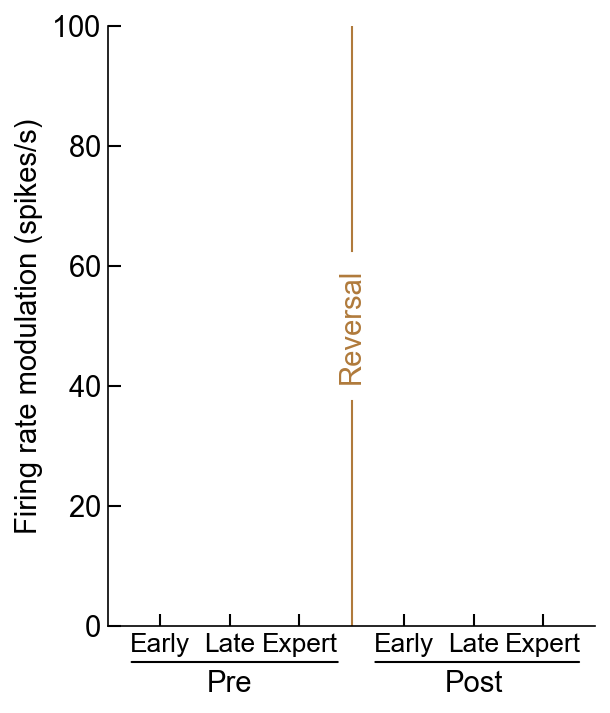

In [11]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0.25

################################################################################################################

#Plot figure

################################################################################################################

labels = ['Early','Late','Expert','Early','Late','Expert']

ax.set_ylim([0,100])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.04, -stdyfrac), xycoords='axes fraction', xytext=(0.48, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.54, -stdyfrac), xycoords='axes fraction', xytext=(0.975, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
Y = np.mean(ax.get_ylim())
t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
fig.savefig(os.path.join('D:\\\\TEMP4.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [19]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal == 'DS_19' and sessionfile.meta.region == 'AC':
        print(sessionfile.meta.day_of_training)

 80%|████████  | 579/723 [00:06<00:01, 88.34it/s] 

20
21
22
24
25
26
28
29
11
30
12
13
14
15
16
17


 83%|████████▎ | 600/723 [00:06<00:01, 82.27it/s]

18
19


100%|██████████| 723/723 [00:07<00:00, 90.53it/s] 


In [ ]:
# BS_41 cut off at day 19

In [2]:
sessionfile = ilep.getRandomSession(act_directory)

In [3]:
sessionfile.meta

namespace(directory='D:\\BS_56\\BS_56 3\\AC\\',
          region='AC',
          animal='BS_56',
          probe=7372,
          date='10/25/2021',
          depth=805,
          task='reversal',
          day_of_training=18,
          day_of_recording=3,
          day_of_reversal=10,
          length_in_samples=69121788.0,
          files=['October 25 2021 Dual BS_56_3001',
                 'October 25 2021 Dual BS_56_3002',
                 'October 25 2021 Dual BS_56_3003'],
          behavior='expert',
          condition='postreversal expert',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=2304.0596,
          length_in_minutes=38.40099333333333,
          length_in_trials=457)

In [4]:
sessionfile.clusters.good

array([ 2,  7, 10, 13, 20, 30, 31, 35], dtype=int64)

In [7]:
rates = flatten_rates(sessionfile,sessionfile.clusters.good,'all_trials')

54
(8, 21600)


In [59]:
target = np.r_[np.zeros(200),np.sin(np.linspace(0,np.pi,100))]
CR = target*0.25 - 0.2
NCR = target*0.25 + 0.2

In [62]:
err_CR = CR-target
err_NCR = NCR-target

err_CR_norm = err_CR - np.mean(err_CR[range(100)])
err_NCR_norm = err_NCR - np.mean(err_NCR[range(100)])

Text(0.5, 0, 'Time (ms)')

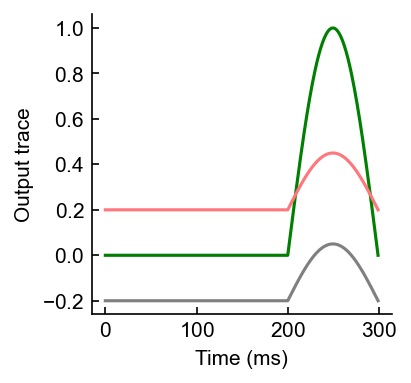

In [57]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2,2, left=.3, bottom=.3, right=0, top=0)

ax.plot(target,c='green')
ax.plot(CR,c=CR_COLOR)
ax.plot(NCR,c=NCR_COLOR)
ax.set_ylabel('Output trace')
ax.set_xlabel('Time (ms)')

Text(0.5, 0, 'Time (ms)')

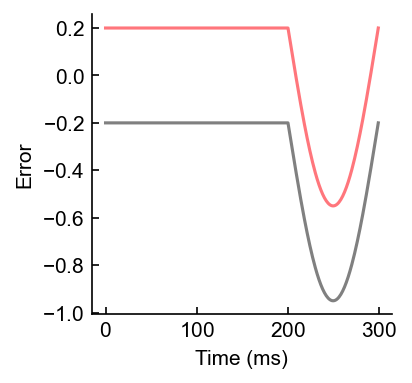

In [61]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2,2, left=.3, bottom=.3, right=0, top=0)

ax.plot(err_CR,c=CR_COLOR)
ax.plot(err_NCR,c=NCR_COLOR)
ax.set_ylabel('Error')
ax.set_xlabel('Time (ms)')

Text(0.5, 0, 'Time (ms)')

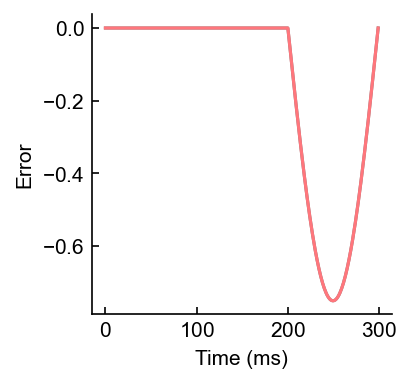

In [63]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2,2, left=.3, bottom=.3, right=0, top=0)

ax.plot(err_CR_norm,c=CR_COLOR)
ax.plot(err_NCR_norm,c=NCR_COLOR)
ax.set_ylabel('Error')
ax.set_xlabel('Time (ms)')

In [5]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='D:\\DualRecording\\BS_49\\BS_49 15\\AC\\',
          region='AC',
          animal='BS_49',
          probe=6927,
          date='9/21/2021',
          depth=1300,
          task='reversal',
          day_of_training=15,
          day_of_recording=14,
          day_of_reversal=1,
          length_in_samples=77951602.0,
          files=['September 21 2021 Dual BS_49_15001',
                 'September 21 2021 Dual BS_49_15002',
                 'September 21 2021 Dual BS_49_15003',
                 'September 21 2021 Dual BS_49_15004'],
          behavior='naive',
          condition='postreversal naive',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0.2,
          lickdelayrelativetotone=0.1,
          fs=30000,
          length_in_seconds=2598.3867333333333,
          length_in_minutes=43.306445555555555,
          length_in_trials=464)

In [8]:
get_response_times_with_default(sessionfile)

array([7.36720000e+04, 1.74625000e+05, 2.76209000e+05, 3.75707000e+05,
       4.78968000e+05, 5.79562000e+05, 8.58854000e+05, 1.15928100e+06,
       1.26248900e+06, 1.36393600e+06, 1.65413400e+06, 1.74417100e+06,
       2.02833100e+06, 2.31052200e+06, 2.40906500e+06, 2.68679900e+06,
       2.78882800e+06, 2.89380000e+06, 3.17248400e+06, 3.27241500e+06,
       3.55260000e+06, 3.84765600e+06, 4.11483100e+06, 4.21722200e+06,
       4.31772700e+06, 4.60071800e+06, 4.88232600e+06, 4.98279600e+06,
       5.08338700e+06, 5.36637500e+06, 5.46191600e+06, 5.56952100e+06,
       5.84729600e+06, 5.94990900e+06, 6.22896800e+06, 6.33103100e+06,
       6.43406400e+06, 6.71575800e+06, 6.99986700e+06, 7.28076100e+06,
       7.38146600e+06, 7.48775400e+06, 7.58632300e+06, 7.86724500e+06,
       8.15052300e+06, 8.29958800e+06, 8.53061200e+06, 8.63303800e+06,
       8.91609600e+06, 9.19806900e+06, 9.29324500e+06, 9.57412000e+06,
       9.67591900e+06, 9.95822900e+06, 1.00570140e+07, 1.03657250e+07,
      

In [42]:
def get_response_times_with_default(sessionfile,relative=False):
    allConds = ilep.getAllConditions(sessionfile,None,trialsPerDayLoaded='NO_TRIM')

    avg_response_time = np.mean(sessionfile.trials.response[allConds['go'].trials] - sessionfile.trials.starts[allConds['go'].trials])
    #avg_response_time = 1.5*sessionfile.meta.fs
    
    start_times = np.array(sessionfile.trials.starts)
    response_times = np.array(sessionfile.trials.response)
    response_times[allConds['nogo'].trials] = start_times[allConds['nogo'].trials]+avg_response_time
    
    if relative:
        return response_times - start_times
    else:
        return response_times

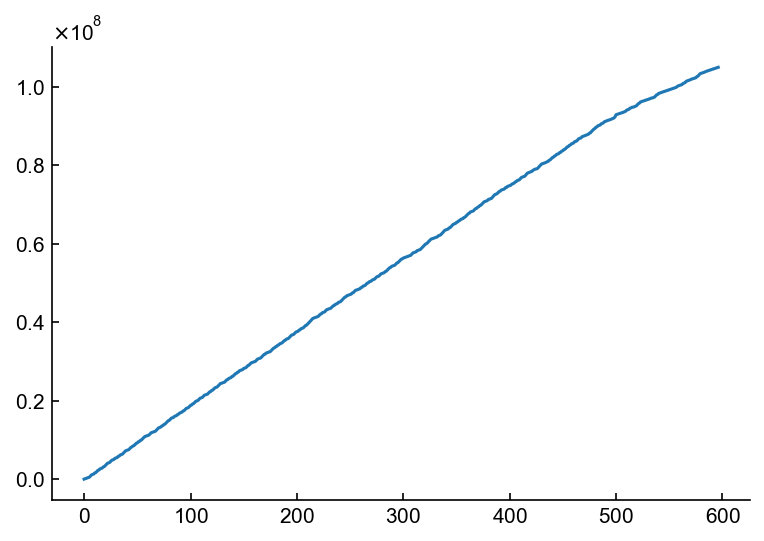

In [41]:
plt.plot(np.sort(get_response_times_with_default_2(sessionfile)))

In [10]:
sessions = os.listdir(act_directory)

In [19]:
bl_FR = []
bin_FR = []
for idx,session in tqdm(enumerate(sessions)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    for clust in sessionfile.clusters.good:
        
        for trial in ilep.getAllConditions(sessionfile,clust,trialsPerDayLoaded='NO_TRIM')['all_trials'].trials:
        
            baseline_start = sessionfile.trials.starts[trial] - 0.3*sessionfile.meta.fs
            baseline_end = sessionfile.trials.starts[trial] - 0.15*sessionfile.meta.fs
            
            bin_start = sessionfile.trials.starts[trial] - 0.45*sessionfile.meta.fs
            bin_end = sessionfile.trials.starts[trial] - 0.4*sessionfile.meta.fs
            
            FR_bl = len(ilep.getSpikeTimes(sessionfile,clust=clust,starttime=baseline_start,endtime=baseline_end))/0.150
            FR_bin = len(ilep.getSpikeTimes(sessionfile,clust=clust,starttime=bin_start,endtime=bin_end))/0.050
            
            bl_FR.append(FR_bl)
            bin_FR.append(FR_bin)
        
    if idx >= 10:
        break

10it [03:51, 23.12s/it]


In [22]:
np.mean(bl_FR)

3.8966289019615727

In [23]:
np.mean(bin_FR)

3.910625767200381

In [49]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_40_22_AC.pickle')
clust = 7
sessionfile.responsiveness[clust]['nogo']

namespace(trials=array([324, 325, 331, 353, 358, 359, 370, 373, 378, 380, 382, 386, 395,
                        397, 398, 403, 404, 410, 412, 416, 417, 421, 422, 430, 435, 436,
                        437, 443, 444, 450, 458, 459, 460, 461, 462, 463]),
          label='nogo',
          FRmodulation150=2.2222222222222223,
          offset_response=True,
          FRbaseline=11.481481481481481,
          FR=19.444444444444443,
          FRmodulation=7.962962962962962,
          FRmodulationpertrial=array([ 25.        , 105.83333333, -20.        , -20.        ,
                                       75.        , -14.16666667,  37.5       ,  25.        ,
                                      -33.33333333,   0.        , -26.66666667,  24.16666667,
                                       61.66666667,  75.        ,  18.33333333, -20.        ,
                                       25.        ,  -6.66666667,   0.        ,  -6.66666667,
                                       -7.5       , -13.33

In [24]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_40_22_AC.pickle')
clust = 7

In [31]:
sessionfile.responsiveness[clust]['nogo']

namespace(trials=array([324, 325, 331, 353, 358, 359, 370, 373, 378, 380, 382, 386, 395,
                        397, 398, 403, 404, 410, 412, 416, 417, 421, 422, 430, 435, 436,
                        437, 443, 444, 450, 458, 459, 460, 461, 462, 463]),
          label='nogo',
          FRmodulation150=2.2222222222222223,
          offset_response=True,
          FRbaseline=11.481481481481481,
          FR=20.0,
          FRmodulation=8.51851851851852,
          FRmodulationpertrial=array([ 20.        , 193.33333333, -20.        , -20.        ,
                                      100.        , -26.66666667,  20.        ,  40.        ,
                                      -33.33333333,   0.        , -26.66666667, -13.33333333,
                                       26.66666667, 120.        ,  13.33333333, -20.        ,
                                        0.        ,  -6.66666667,   0.        ,  -6.66666667,
                                       20.        , -13.33333333, -46.666

In [26]:
240/37

6.486486486486487

In [32]:
240*.05

12.0

In [34]:
50/12

4.166666666666667

In [38]:
np.mean([  0.        ,  53.33333333,  40.        ,  20.        ,
   0.        ,  -6.66666667,   0.        ,  20.        ,
 -13.33333333, 120.        , -26.66666667,  46.66666667,
 -13.33333333,   0.        ,  -6.66666667,  60.        ,
   0.        ,  -6.66666667,   0.        ,  33.33333333,
 20.        , -13.33333333, 113.33333333, 100.        ,
   6.66666667,   0.        ,  20.        ,   0.        ,
 -26.66666667, -40.        ,  -6.66666667,   0.        ,
  60.        ,  60.        ,   6.66666667, -13.33333333])

16.85185185166667

In [2]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_49_4_AC.pickle')

In [3]:
sessionfile.trials

namespace(starts=array([   57202.,   159597.,   250873.,   342144.,   433305.,   524655.,
                          615883.,   737884.,   829344.,   920505.,  1012017.,  1103410.,
                         1194764.,  1286162.,  1377593.,  1468948.,  1560547.,  1651846.,
                         1743164.,  1834355.,  1925884.,  2017345.,  2108562.,  2199958.,
                         2363061.,  2454350.,  2545764.,  2636974.,  2728344.,  2819859.,
                         2911084.,  3002337.,  3093621.,  3184995.,  3276325.,  3367547.,
                         3587945.,  3679377.,  3770652.,  3861914.,  4086473.,  4178064.,
                         4269162.,  4360320.,  4451512.,  4543001.,  4634422.,  4725791.,
                         4817197.,  4908680.,  5000138.,  5091590.,  5182941.,  5274119.,
                         5365691.,  5497931.,  5589449.,  5680712.,  5772008.,  5863576.,
                         5954952.,  6046295.,  6137674.,  6229047.,  6320575.,  6411680.,
          

In [7]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal == 'LA_204':
        print(sessionfile.meta.day_of_training)

 95%|█████████▌| 689/723 [00:07<00:00, 129.01it/s]

8
9
10
11
12
13
14


100%|██████████| 723/723 [00:07<00:00, 91.27it/s] 


In [8]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal == 'LA_205':
        print(sessionfile.meta.day_of_training)

 96%|█████████▌| 692/723 [00:07<00:00, 132.09it/s]

8
10
11
12


100%|██████████| 723/723 [00:07<00:00, 92.79it/s] 


In [4]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal == 'TH_230':
        print(sessionfile.meta.day_of_training)

 99%|█████████▉| 719/723 [00:07<00:00, 106.11it/s]

15
16
17
18
19
20
21


100%|██████████| 723/723 [00:07<00:00, 90.79it/s] 


In [5]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal == 'TH_233':
        print(sessionfile.meta.day_of_training)

 99%|█████████▉| 719/723 [00:07<00:00, 112.72it/s]

5
6
7
8


100%|██████████| 723/723 [00:07<00:00, 91.36it/s] 


In [6]:
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.animal == 'TH_234':
        print(sessionfile.meta.day_of_training)

100%|██████████| 723/723 [00:07<00:00, 92.18it/s] 

5
6
7
8


In [9]:
GP = [12,11.25,8,9,11.25,9,6,12,12,11.25,9,12,4]
Weights = [3,3,2,3,3,3,2,3,3,3,3,3,1]

In [10]:
np.array(GP)/np.array(Weights)

array([4.  , 3.75, 4.  , 3.  , 3.75, 3.  , 3.  , 4.  , 4.  , 3.75, 3.  ,
       4.  , 4.  ])

In [11]:
np.sum(GP)/np.sum(Weights)

3.6214285714285714

In [18]:
GP = [11.25,12,15,12,12,12,12,12,12,11.25,11.25,9,9,12,9.75,12,4,12,11.25,12,12]
Weights = [3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,3]

In [19]:
np.array(GP)/np.array(Weights)

array([3.75, 4.  , 3.75, 4.  , 4.  , 4.  , 4.  , 4.  , 4.  , 3.75, 3.75,
       3.  , 3.  , 4.  , 3.25, 4.  , 4.  , 4.  , 3.75, 4.  , 4.  ])

In [20]:
np.sum(GP)/np.sum(Weights)

3.8024193548387095

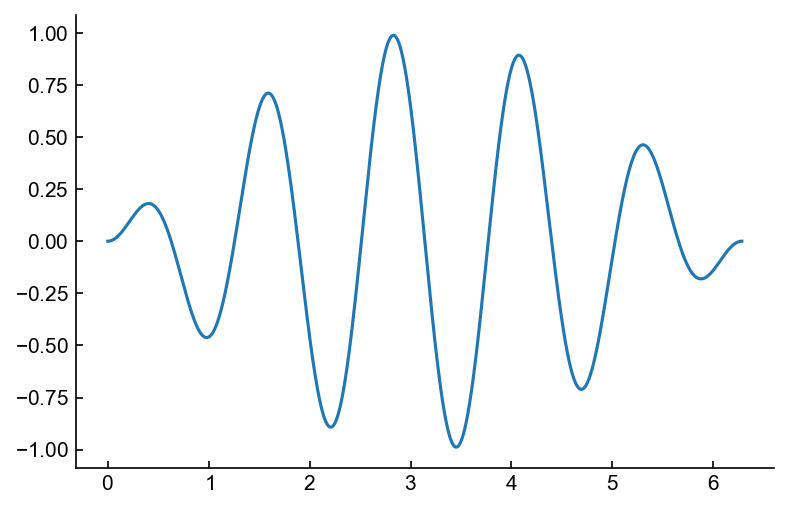

In [18]:
X1 = np.linspace(0,np.pi,1000)
X2 = np.linspace(0,10*np.pi,1000)
Y = np.sin(X1)*np.sin(X2)
plt.plot(X,Y)
plt.savefig('D:\\Slow.pdf')

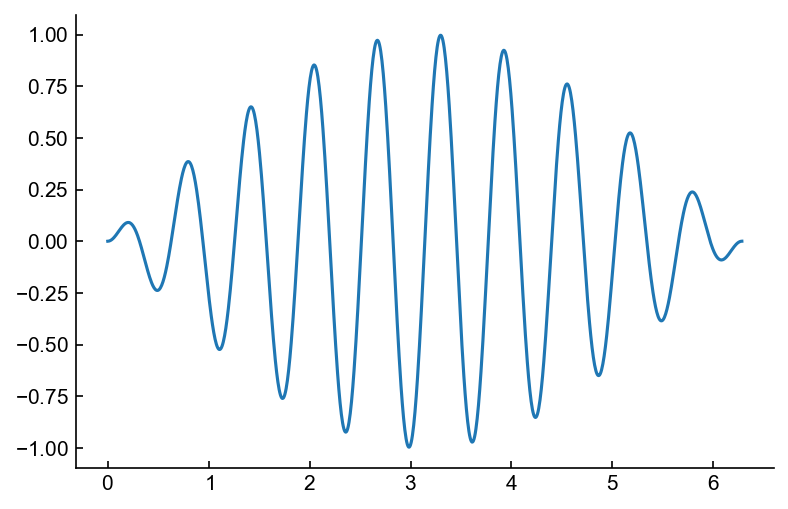

In [19]:
X1 = np.linspace(0,np.pi,1000)
X2 = np.linspace(0,20*np.pi,1000)
Y = np.sin(X1)*np.sin(X2)
plt.plot(X,Y)
plt.savefig('D:\\Fast.pdf')

# Peak Latency Code

In [7]:
sessionfile.clusters.good

array([ 7,  9, 37, 46, 57, 70, 74], dtype=int64)

In [55]:
def calculate_latency(sessionfile,clust,cond='all_trials',startTime=0,endTime=300):
    all_conditions = ilep.getAllConditions(sessionfile,clust)
    trials = all_conditions[cond].trials
    
    trialSpikes = []
#     clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    for trial in trials:
        starttime = sessionfile.trials.starts[trial]+(startTime-250)/1000*sessionfile.meta.fs #0.25
        endtime = sessionfile.trials.starts[trial]+(endTime+250)/1000*sessionfile.meta.fs #1.5
        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - sessionfile.trials.starts[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs
        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')
    
    #Plot PSTH
    xrange = np.linspace(startTime,endTime,num=(endTime-startTime))
    PSTHspikes = np.concatenate(trialSpikes)
    assert len(PSTHspikes)>0
    bw = len(PSTHspikes)**(-1./5) / 3#(bw_scott_factor) Same as rasters
    KDE = gaussian_kde(PSTHspikes,bw_method=bw)
    FR = KDE.evaluate(xrange)
    FR = FR * len(PSTHspikes) / len(trials) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    diff_from_baseline = np.abs(FR - sessionfile.responsiveness[clust][cond].FRbaseline)
    
    peak = np.max(diff_from_baseline) #len=1000
    peak_idx = np.argmax(diff_from_baseline) #ms
    peak_time = xrange[peak_idx]

    plt.plot(xrange,FR)
    plt.axvline(peak_time)
    plt.axhline(sessionfile.responsiveness[clust][cond].FRbaseline)
    return peak_time

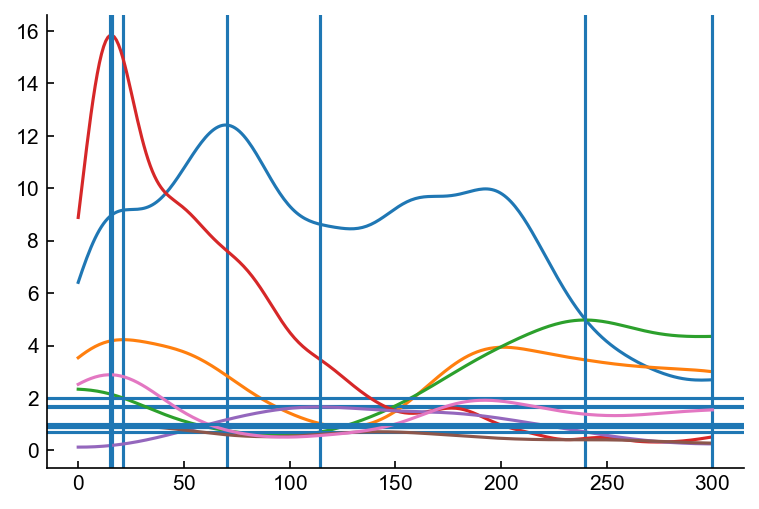

In [57]:
for clust in sessionfile.clusters.good:
    calculate_latency(sessionfile,clust)

# Behavior Trimming - Last Day Late Test

In [11]:
ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
animals = ephys_animals

In [12]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

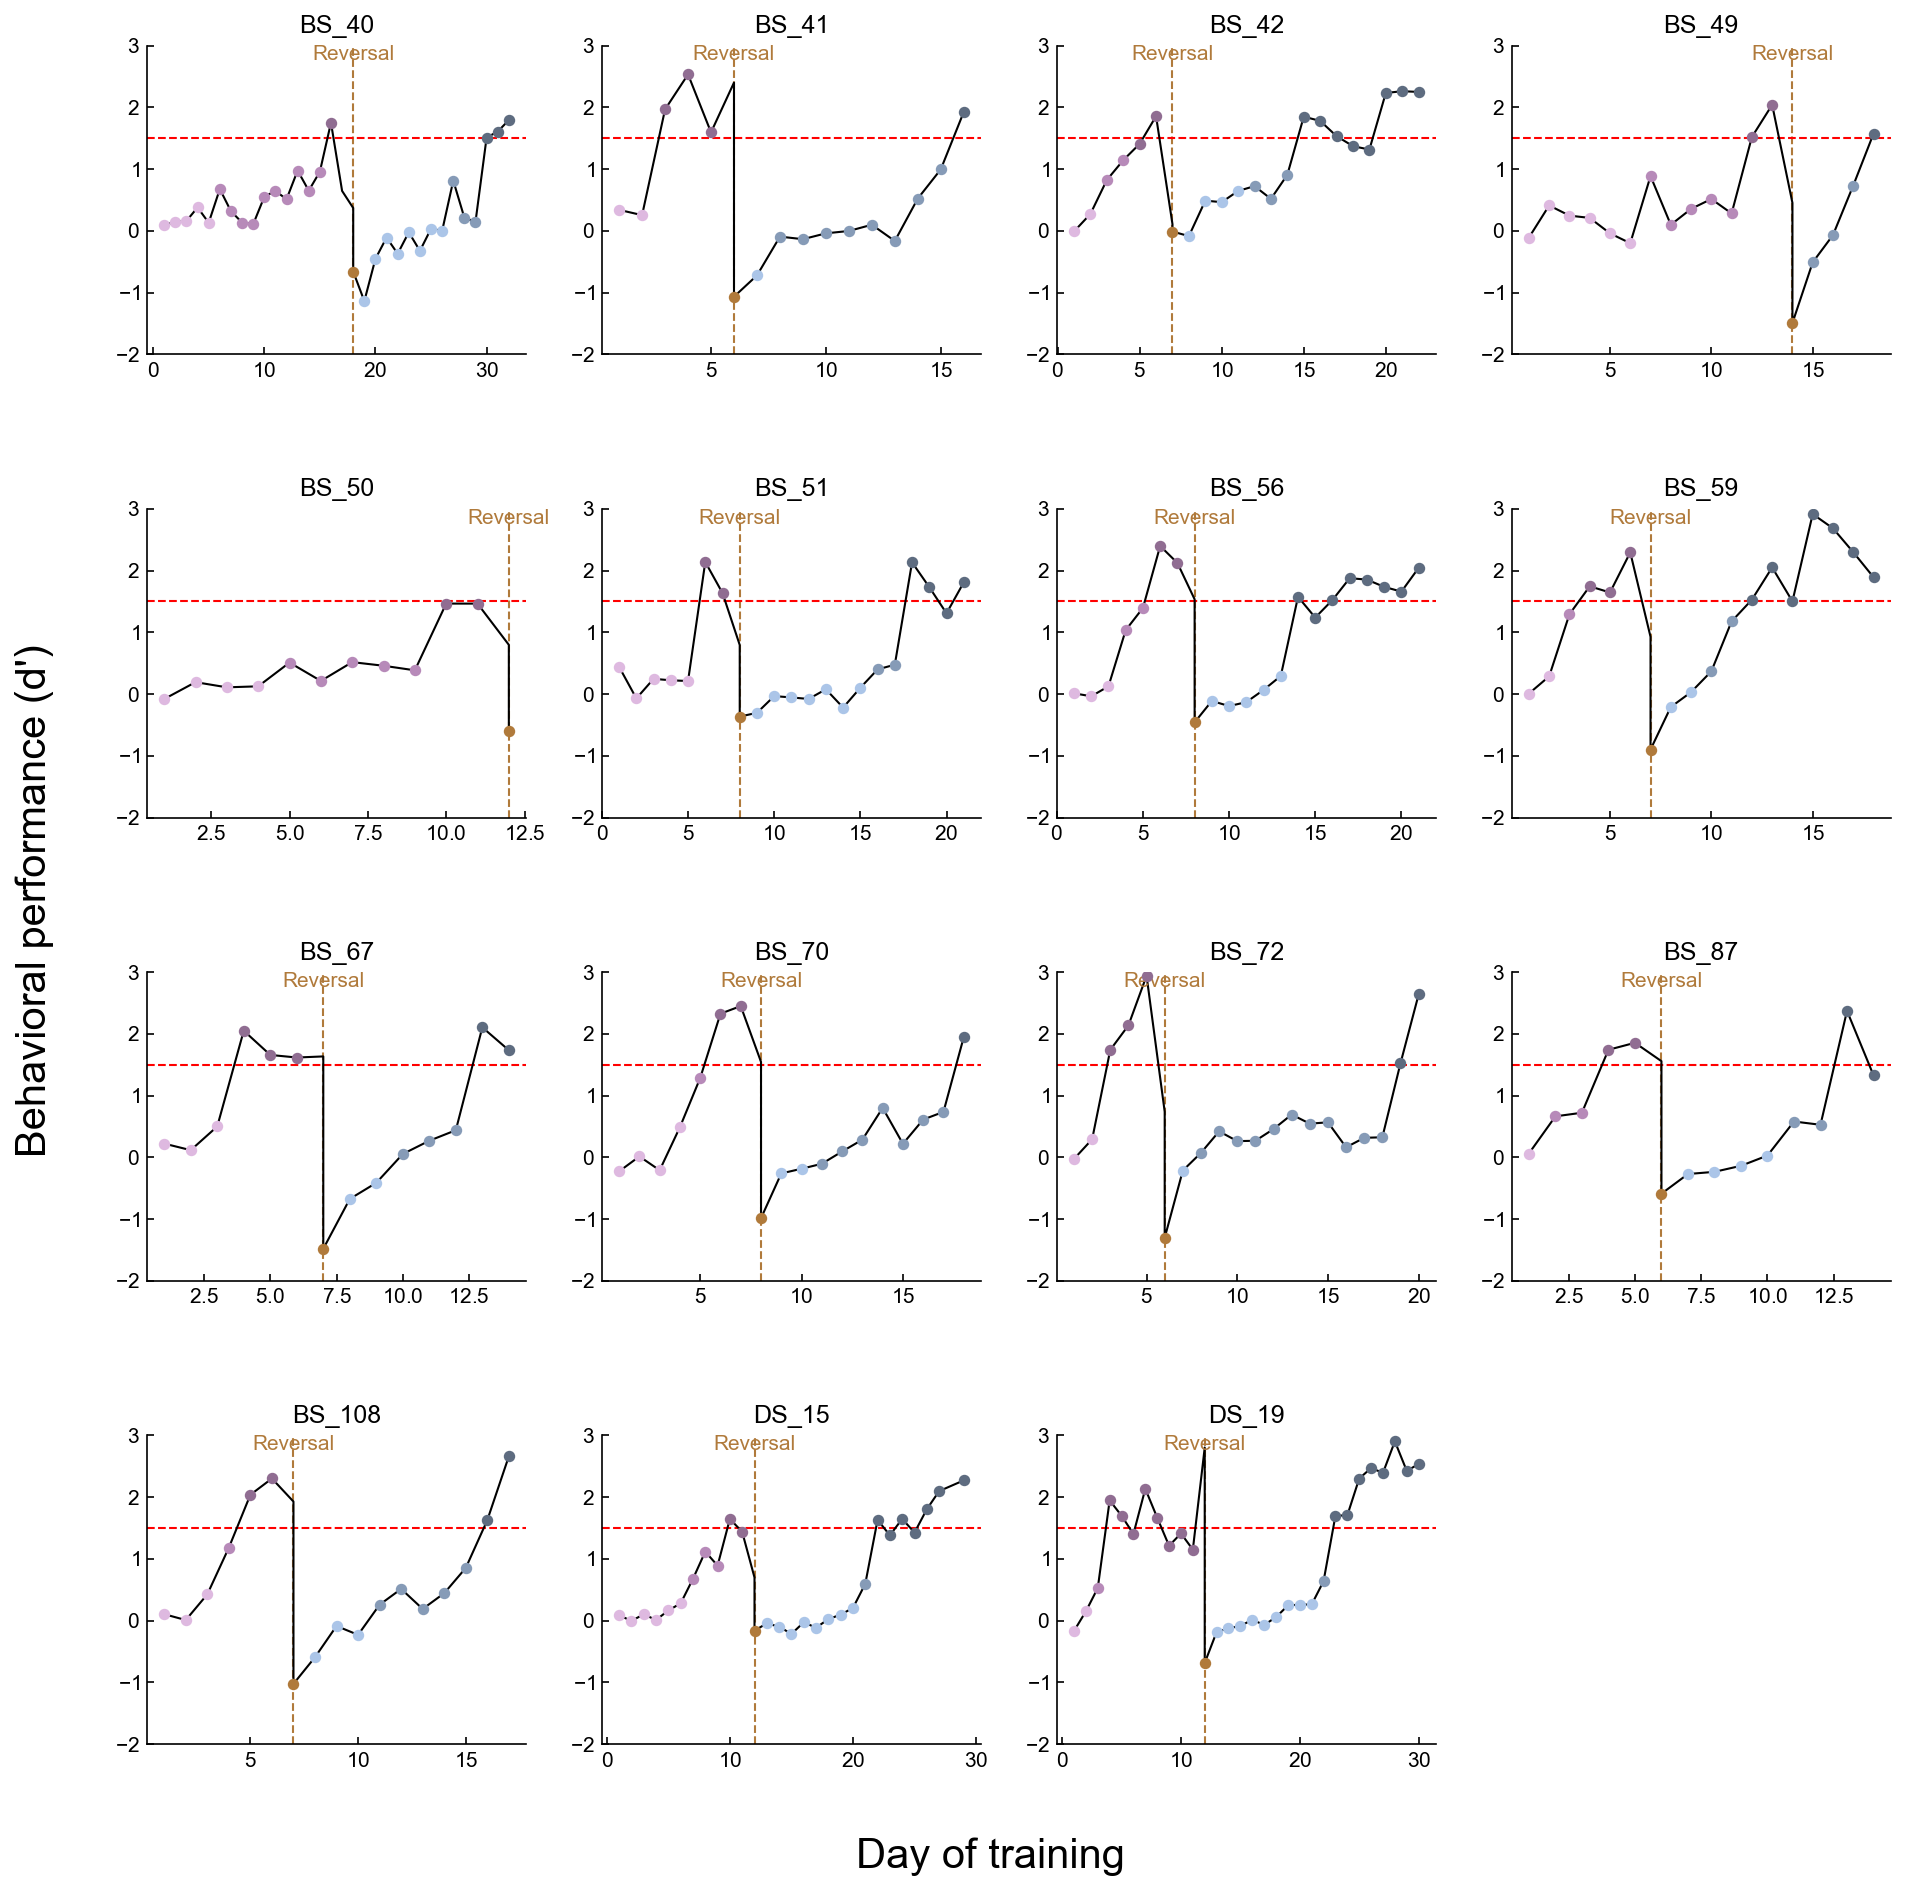

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
plt.savefig(os.path.join('D:\\\\TempFigures','Learning curves last late untrimmed.pdf'),transparent=False,facecolor="white")

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


BS_40: adding day [15, 29]
BS_41: adding day [15]


../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:359: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


BS_42: adding day [4, 14]
BS_49: adding day [11, 17]
BS_50: adding day [9]


../..\InsanallyLabEphysTools\behavior.py:359: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


BS_51: adding day [17]
BS_56: adding day [5]


../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


BS_59: adding day [3, 11]
BS_67: adding day [12]


../..\InsanallyLabEphysTools\behavior.py:359: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


BS_70: adding day [5, 17]
BS_72: adding day [18]
BS_87: adding day [3, 12]
BS_108: adding day [4, 15]
DS_15: adding day [9, 21]


../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:359: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


DS_19: adding day [3, 22]


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

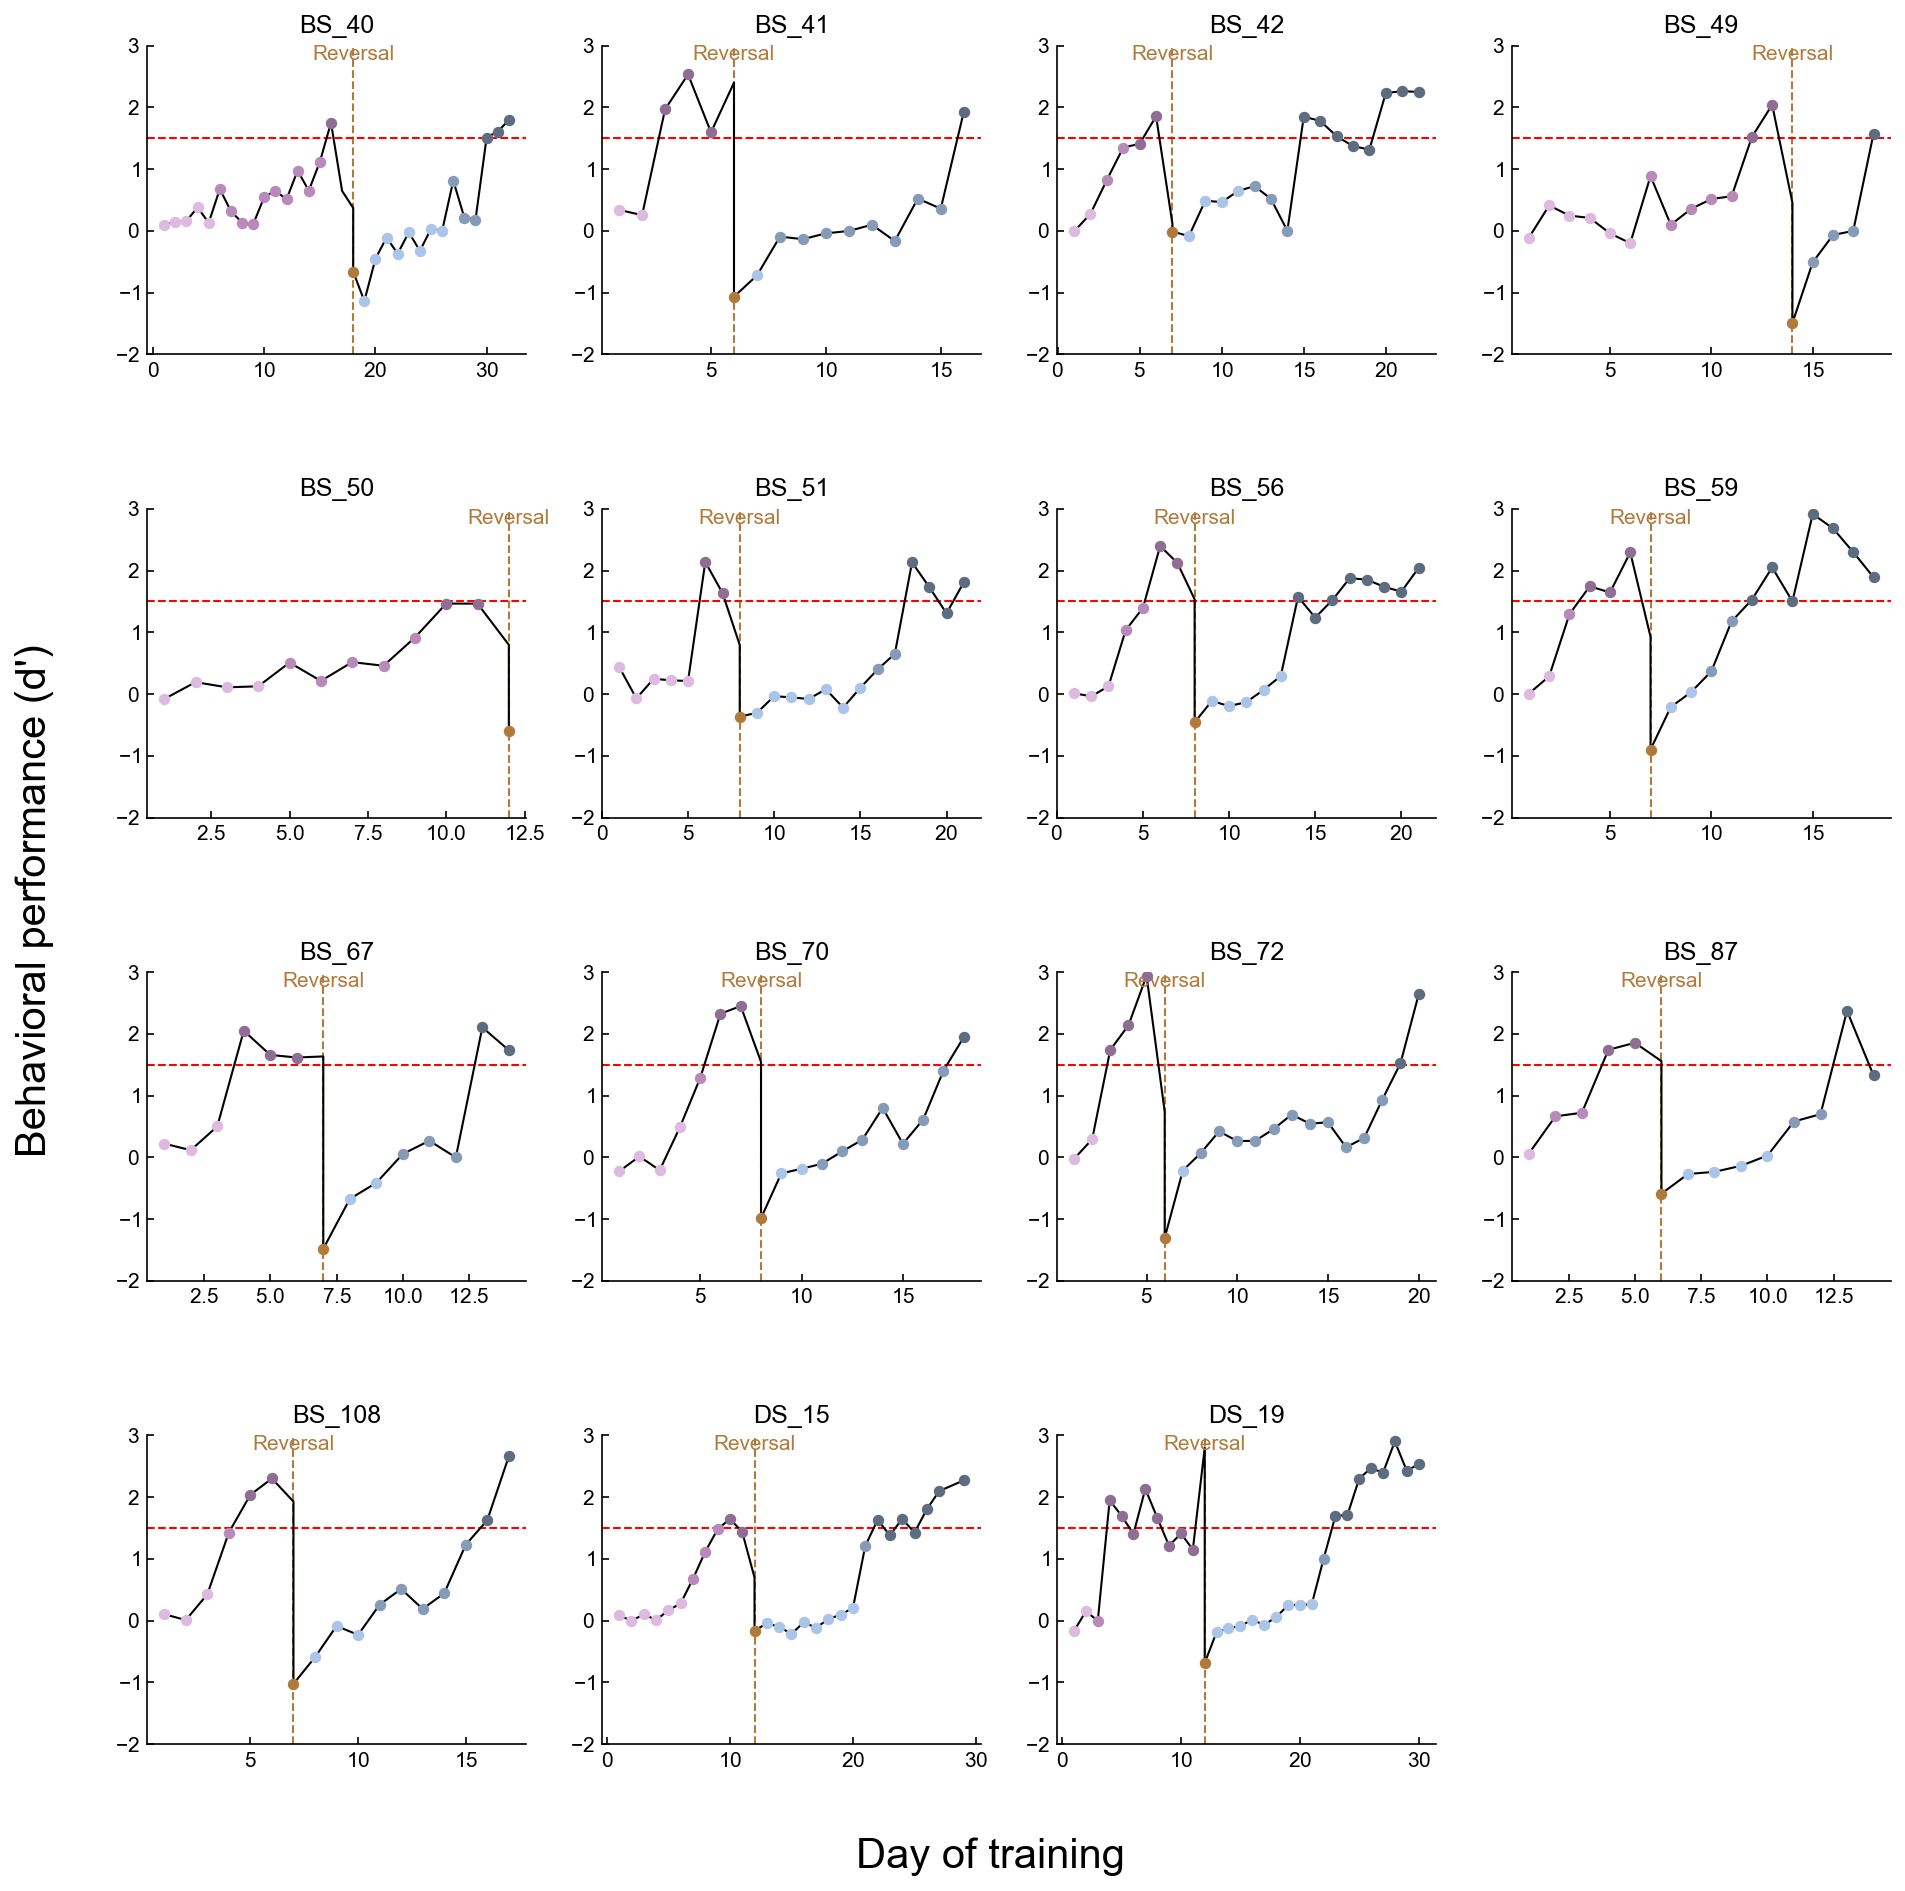

In [71]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True,trimLastDayLate=True)
plt.savefig(os.path.join('D:\\\\TempFigures','Learning curves last late trimmed.pdf'),transparent=False,facecolor="white")

In [53]:
sessionfile = ilep.getRandomSession(act_directory)
sessionfile.meta

namespace(directory='D:\\DualRecording\\BS_42\\BS_42 6\\M2\\',
          region='M2',
          animal='BS_42',
          probe=6927,
          date='8/13/2021',
          depth=1300,
          task='reversal',
          day_of_training=12,
          day_of_recording=6,
          day_of_reversal=5,
          length_in_samples=101325795.0,
          files=['August 13 Dual BS_42_6001',
                 'August 13 Dual BS_42_6002',
                 'August 13 Dual BS_42_6003',
                 'August 13 Dual BS_42_6004'],
          behavior='naive',
          condition='postreversal naive',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0,
          lickdelayrelativetotone=-0.1,
          fs=30000,
          length_in_seconds=3377.5265,
          length_in_minutes=56.29210833333333,
          length_in_trials=600)

In [57]:
resp_times = sessionfile.trials.response - sessionfile.trials.starts
beh_times = animalBehaviors[sessionfile.meta.animal].sessions[sessionfile.meta.day_of_training].response_time * sessionfile.meta.fs

print(len(resp_times))
print(len(beh_times))

600
600


600
600


Text(0, 0.5, 'Response time - from behavior.txt (s)')

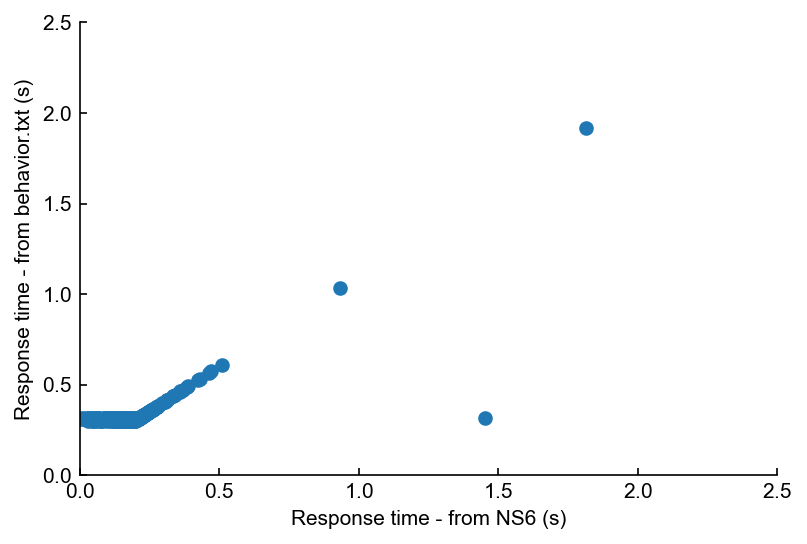

In [63]:
resp_times = (sessionfile.trials.response - sessionfile.trials.starts) / sessionfile.meta.fs
beh_times = animalBehaviors[sessionfile.meta.animal].sessions[sessionfile.meta.day_of_training].response_time

print(len(resp_times))
print(len(beh_times))

plt.scatter(resp_times,beh_times)
plt.xlim([0,2.5])
plt.ylim([0,2.5])

plt.xlabel('Response time - from NS6 (s)')
plt.ylabel('Response time - from behavior.txt (s)')

In [56]:
resp_times

array([6.02870000e+04, 1.59910000e+05, 2.62846000e+05, 3.63280000e+05,
       4.61794000e+05, 5.65488000e+05, 6.65761000e+05, 7.69187000e+05,
       8.71295000e+05, 9.66492000e+05, 1.25331500e+06, 1.53494800e+06,
       1.81539400e+06, 2.09599600e+06, 2.19579200e+06, 2.29613700e+06,
       2.57904400e+06, 2.85893600e+06, 2.96093200e+06, 3.06022800e+06,
       3.16111200e+06, 3.44136600e+06, 3.54374300e+06, 3.82586500e+06,
       3.92831800e+06, 4.20781800e+06, 4.48807900e+06, 4.58918200e+06,
       4.69020100e+06, 4.97073300e+06, 5.07636900e+06, 5.35571900e+06,
       5.45621900e+06, 5.73743200e+06, 6.01821600e+06, 6.29980300e+06,
       6.40054300e+06, 6.68251100e+06, 6.78233900e+06, 6.88263000e+06,
       6.98425800e+06, 7.08439200e+06, 7.36543100e+06, 7.46662800e+06,
       7.56552500e+06, 7.84836000e+06, 8.12962400e+06, 8.22953300e+06,
       8.51302300e+06, 8.79298400e+06, 8.89455200e+06, 8.99639600e+06,
       9.09832600e+06, 9.37845300e+06, 9.47597800e+06, 9.57906700e+06,
      

In [66]:
a = [1,2,3,4,5]
a[0:3]

[1, 2, 3]

In [72]:
learning_phases['DS_19']

namespace(second_early_days=[],
          second_late_days=[],
          second_expert_days=[],
          post_early_days=array([13, 14, 15, 16, 17, 18, 19, 20, 21]),
          post_late_days=array([22]),
          post_expert_days=array([23, 24, 25, 26, 27, 28, 29, 30]),
          pre_early_days=array([1, 2]),
          pre_late_days=array([3]),
          pre_expert_days=array([ 4,  5,  6,  7,  8,  9, 10, 11]))

In [69]:
animalBehaviors['AE_312'].sessions[5]

namespace(animal='AE_312',
          session=5,
          files=array(['AE_312_5v1.txt', 'AE_312_5v1_reversal.txt',
                       'AE_312_5v2_reversal.txt'], dtype='<U23'),
          blocknumbers=array([1, 1, 2]),
          type='switch',
          trials_per_session=array([200.,  14., 173.]),
          outcomes=0      1
                   1      1
                   2      1
                   3      1
                   4      1
                         ..
                   168    2
                   169    4
                   170    2
                   171    4
                   172    4
                   Name: outcome, Length: 387, dtype: int64,
          response_time=0      0.30245
                        1      0.30278
                        2      0.30834
                        3      0.31289
                        4      0.31032
                                ...   
                        168    2.50030
                        169    2.50030
               

In [ ]:
BS_108_2_AC.pickle cluster 6 in phase pre expert has nan
BS_40_12_AC.pickle cluster 82 in phase pre expert has nan
BS_40_12_AC.pickle cluster 86 in phase pre expert has nan
BS_40_12_AC.pickle cluster 90 in phase pre expert has nan
BS_40_12_AC.pickle cluster 110 in phase pre expert has nan
BS_40_12_AC.pickle cluster 119 in phase pre expert has nan
BS_40_21_AC.pickle cluster 8 in phase post expert has nan
BS_40_21_AC.pickle cluster 26 in phase post expert has nan
BS_40_21_AC.pickle cluster 27 in phase post expert has nan
BS_40_22_AC.pickle cluster 0 in phase post expert has nan
BS_42_10_AC.pickle cluster 41 in phase post expert has nan
BS_56_1_AC.pickle cluster 25 in phase post expert has nan
BS_67_2_AC.pickle cluster 3 in phase post expert has nan
BS_67_2_AC.pickle cluster 11 in phase post expert has nan
BS_67_2_AC.pickle cluster 22 in phase post expert has nan
BS_67_2_AC.pickle cluster 33 in phase post expert has nan
BS_67_2_AC.pickle cluster 40 in phase post expert has nan
BS_70_1_AC.pickle cluster 117 in phase pre late has nan
BS_72_1_AC.pickle cluster 59 in phase pre expert has nan
BS_72_1_AC.pickle cluster 67 in phase pre expert has nan
BS_72_2_AC.pickle cluster 36 in phase pre expert has nan
BS_87_11_AC.pickle cluster 31 in phase post expert has nan
DS_15_14_AC.pickle cluster 21 in phase post expert has nan
DS_15_15_AC.pickle cluster 122 in phase post expert has nan
DS_15_1_AC.pickle cluster 10 in phase pre expert has nan
DS_15_1_AC.pickle cluster 12 in phase pre expert has nan
DS_15_1_AC.pickle cluster 35 in phase pre expert has nan
DS_15_1_AC.pickle cluster 44 in phase pre expert has nan
DS_15_1_AC.pickle cluster 51 in phase pre expert has nan
DS_15_1_AC.pickle cluster 53 in phase pre expert has nan
DS_15_1_AC.pickle cluster 54 in phase pre expert has nan
DS_15_1_AC.pickle cluster 56 in phase pre expert has nan
DS_15_1_AC.pickle cluster 68 in phase pre expert has nan
DS_15_1_AC.pickle cluster 72 in phase pre expert has nan
DS_15_1_AC.pickle cluster 83 in phase pre expert has nan
DS_19_14_AC.pickle cluster 46 in phase post expert has nan

In [15]:
ilep.calculateResponsivenessBySession(['BS_67','BS_67 2','AC'],'S:\\Sorts\DualRecording','D:\\Analysis_Cache')

test
['BS_67', 'BS_67 2', 'AC']
S:\Sorts\DualRecording
D:\Analysis_Cache
Recording does not contain raw audio data. Use saveTrials.m to generate
S:\Sorts\DualRecording\BS_67\BS_67 2\AC\session_metadata.json complete


In [16]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_67_2_AC.pickle')

In [17]:
sessionfile.clusters.good

array([ 1,  3,  5,  8, 11, 22, 33, 40, 43, 47, 49], dtype=int64)

In [20]:
sessionfile.responsiveness[11]['all_trials'].FRbaseline

nan

In [2]:
ilep.calculateResponsivenessBySession(['BS_108','BS_108 2','AC'],'S:\\Sorts\DualRecording','D:\\Analysis_Cache')

test
['BS_108', 'BS_108 2', 'AC']
S:\Sorts\DualRecording
D:\Analysis_Cache
Recording does not contain raw audio data. Use saveTrials.m to generate


../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:229: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score_choice = (FR_choice - np.mean(baselineFR)) / np.std(baselineFR)#(FR_choice[maxmodidx_choice] - np.mean(baselineFR)) / np.std(baselineFR)
../..\InsanallyLabEphysTools\responsiveness.py:219: RuntimeWarning: invalid value encountered in double_scalars
  responsiveness[cond].z_score = (FR[maxmodidx] - np.mean(baselineFR)) / np.std(baselineFR)


S:\Sorts\DualRecording\BS_108\BS_108 2\AC\session_metadata.json complete


In [2]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_108_2_AC.pickle')

In [4]:
sessionfile.clusters.good

array([ 2,  6,  7, 26], dtype=int64)

In [11]:
sessionfile.responsiveness[6]['all_trials'].FRbaseline

nan

In [14]:
np.sum(sessionfile.spikes.clusters == 6)

846

In [25]:
animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

In [26]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
#     EnumSession.append(session)
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 740/740 [00:07<00:00, 93.92it/s] 


In [29]:
cellstouseFR = 'all cells'
# cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
#     if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
#         continue
    
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRbl = sessionfile.responsiveness[clust]['all_trials'].FRbaseline
    
    if np.isfinite(FRmod) and np.isnan(FRbl):
        print(f"session {session} cluster {clust} A")
        
    if np.isnan(FRmod) and np.isfinite(FRbl):
        print(f"session {session} cluster {clust} B")

1829it [00:27, 65.63it/s] 


# Dimensionality Testing

In [2]:
animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

In [3]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    EnumSession.append(session)
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 740/740 [00:08<00:00, 84.68it/s] 


In [19]:
with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
    # with open('Z:\\JMT Data Cache\\trialsToUsePerDay','rb') as f:
    trialsPerDayLoaded = pickle.load(f)
            
            
for idx,session in enumerate(EnumSession):

    sessionfile = ilep.loadSessionCached(act_directory,session)
#     ensembles = ilep.getPossibleCombinationsAZ(sessionfile,trialsPerDayLoaded,minClust=6,MaxClust=6,MaxSample=len(sessionfile.clusters.good)*10,MaxIter=100)
    
    dimm = ilep.calculateDimensionalityParallel(session,act_directory,'C:\\Users\\insan\\Documents\\TempWorkspace',ensembles[0],trialsPerDayLoaded,50)
    print(dimm)
    
    break

output_dir is: ->C:\Users\insan\Documents\TempWorkspace<-
ensemble_txt is: ->2-8-9-14-34-35<-
{'d_var': 5.025283817146302, 'd_covar': 5.662997715451721, 'd_GT': 4.7430284626659995, 'FRmods': [9.972451790633608, 21.7741935483871, 15.806451612903228, 10.964187327823693, 16.989247311827963, 13.064516129032258], 'NCR_ratio': 0.0, 'indiv': array([0.26751141, 0.52497954, 0.5277045 , 0.36564824, 0.42105484,
       0.57030306])}


In [31]:
with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
    # with open('Z:\\JMT Data Cache\\trialsToUsePerDay','rb') as f:
    trialsPerDayLoaded = pickle.load(f)
            
            
for idx,session in enumerate(EnumSession):

    sessionfile = ilep.loadSessionCached(act_directory,session)
#     ensembles = ilep.getPossibleCombinationsAZ(sessionfile,trialsPerDayLoaded,minClust=6,MaxClust=6,MaxSample=len(sessionfile.clusters.good)*10,MaxIter=100)
    
    dimm = ilep.calculateDimensionalityParallel(session,act_directory,'C:\\Users\\insan\\Documents\\TempWorkspace',ensembles[0],trialsPerDayLoaded,50)
    print(dimm)
    
    break

output_dir is: ->C:\Users\insan\Documents\TempWorkspace<-
ensemble_txt is: ->2-8-9-14-34-35<-
{'d_var': 5.025283817146302, 'd_covar': 5.662997715451721, 'd_GT': 4.7430284626659995, 'FRmods': [9.972451790633608, 21.7741935483871, 15.806451612903228, 10.964187327823693, 16.989247311827963, 13.064516129032258], 'NCR_ratio': 0.0, 'indiv': array([0.26751141, 0.52497954, 0.5277045 , 0.36564824, 0.42105484,
       0.57030306])}


In [18]:
session

'BS_108_1_AC.pickle'

In [3]:
np.sum([0.26751141, 0.52497954, 0.5277045 , 0.36564824, 0.42105484, 0.57030306])

2.67720159

In [2]:
FRa = [[1,2,3,4,5,6,7],[1,2,3,4],[4,5,6,7,8],[3,4,5,6],[8,7,6,5,4]]
FRb = [[1,2,6,8,2,6,7],[4,8,2,5],[3,1,6,7,8],[3,4,5,6],[5,1,4,2,1,4,3,2,8,7,6,5,4]]

In [9]:
ilep.bootstrap_pc_NCR_test(FRa,FRb,B=1000,CR_NCR_thresh=[3])

0.242

In [28]:
sessionfile = ilep.loadSessionCached(act_directory,'BS_108_2_AC.pickle')
all_conds = ilep.getAllConditions(sessionfile,None)

In [29]:
sessionfile.meta

namespace(directory='D:\\DualRecording\\BS_108\\BS_108 2\\AC\\',
          region='AC',
          animal='BS_108',
          probe=6927,
          date='3/23/2022',
          depth=1000,
          task='nonreversal',
          day_of_training=6,
          day_of_recording=2,
          length_in_samples=53483815.0,
          files=['March 23 2022 Dual BS_108_2001',
                 'March 23 2022 Dual BS_108_2002'],
          behavior='expert',
          condition='prereversal expert',
          arraystart=0,
          tonelength=0.1,
          triallength=2.5,
          lickdelayrelativetostart=0,
          lickdelayrelativetotone=-0.1,
          fs=30000,
          length_in_seconds=1782.7938333333334,
          length_in_minutes=29.71323055555556,
          length_in_trials=375)

In [34]:
X = ilep.K_fold_strat_MATCHED_CHOICE(sessionfile,all_conds['all_trials'].trials,4)

ymin = 31
idx_new =  [ 39 110  59  87   1  13  62  41   6   7  29  22  74 101   2 109  49  54
  53  17   5  83  69  40  75  11   0  56 105  66  31  24  88 100  96  36
  43  46 112  77  52 102  15 106  90  51  42  97 115 111  64  23  57  35
  16  78  27  14  89  12  86  80]
y_new = [3. 3. 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1. 3. 3. 1. 1. 3.
 1. 3. 1. 3. 1. 3. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [35]:
# print(X)
i = 0
# print(sessionfile.trials.go[X[i][0]])
print()
print(np.sum(sessionfile.trials.go[X[i][0]]))
print(np.sum(np.logical_not(sessionfile.trials.go[X[i][0]])))
print()
print(np.sum(sessionfile.trials.go[X[i][1]]))
print(np.sum(np.logical_not(sessionfile.trials.go[X[i][1]])))


23
23

8
8


In [22]:
X

[(array([267, 277, 334, 337, 317, 278, 320, 336, 314, 288, 266, 307, 286,
         251, 303, 305, 233, 301, 342, 326, 304, 272, 299, 321, 257, 284,
         330, 345, 275, 323, 290, 335, 344, 322, 297, 310, 285, 268, 339,
         249, 256, 348, 245, 276, 247, 269]),
  array([289, 261, 287, 252, 241, 274, 250, 300, 329, 248, 319, 313, 333,
         279, 260, 311])),
 (array([267, 289, 334, 337, 320, 336, 266, 307, 286, 261, 305, 287, 252,
         233, 241, 301, 342, 274, 304, 250, 300, 272, 299, 329, 248, 257,
         284, 330, 319, 345, 275, 313, 333, 279, 290, 335, 344, 322, 297,
         310, 285, 249, 260, 256, 247, 311]),
  array([277, 317, 278, 314, 288, 251, 303, 326, 321, 323, 268, 339, 348,
         245, 276, 269])),
 (array([267, 277, 289, 317, 278, 320, 336, 314, 288, 307, 286, 251, 303,
         261, 305, 287, 252, 241, 342, 326, 274, 250, 300, 321, 329, 248,
         257, 319, 345, 275, 313, 333, 279, 323, 290, 335, 344, 268, 339,
         249, 260, 256, 348, 245, 276, 3